In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score,cross_val_predict, train_test_split, cross_validate
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold,RandomizedSearchCV,cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import ElasticNetCV,LassoCV,LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

from yellowbrick.regressor import PredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.features import RadViz

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
import numpy as np
import os
from skimage import io
import nibabel as nib




In [2]:
#Import data correspond to brain mask atrophic without ventricles
input_file = "BrainRxmics_matchNAbrain_116nocoord.csv"
df = pd.read_csv(input_file)
df_num = df._get_numeric_data().set_index('ID').dropna()

# import site data
site_name_file = "ID_site_name.csv"
df_site_name = pd.read_csv(site_name_file).set_index('ID')

df_num=df_num.join(df_site_name)

print("Number of rows in data =",df_num.shape[0])
print("Number of columns in data =",df_num.shape[1])
print("\n")
print("**Sample data:**")
df_num.head()

FileNotFoundError: [Errno 2] No such file or directory: 'BrainRxmics_matchNAbrain_116nocoord.csv'

In [4]:
#Import data
input_CCS = "master_clean.csv"
df_CCS = pd.read_csv(input_CCS).set_index('ID').dropna()

df_CCS=df_CCS.filter(['CCS5item','NIHSS'],axis=1)

print("Number of rows in data =",df_CCS.shape[0])
print("Number of columns in data =",df_CCS.shape[1])
print("\n")
print("**Sample data:**")
df_CCS.head()

Number of rows in data = 2327
Number of columns in data = 1


**Sample data:**


,CCS5item
ID,
100000001,OTHER
100000003,UNDETERMINED
100000005,LAA
100000006,SAO
100000007,LAA


In [ ]:
clinical_list = [
'Age',
'Female_sex',
'HTN',
'DM',
'AF',
'CAD',
'Smoking_ever',
'Prior_stroke',
'WMH_volume',
'Brain_volume',
'WMH_Bvadj',
'No_csf_brain_vol',
'Ventricle_volume',
'Label',
    'Site_name'
]

In [ ]:
to_drop_mics = [  
'Age',
'Female_sex',
'HTN',
'DM',
'AF',
'CAD',
'Smoking_ever',
'Prior_stroke',
'WMH_volume',
'Brain_volume',
'WMH_Bvadj',
'No_csf_brain_vol',
'Ventricle_volume',
'Label',
    
]

In [7]:
df_clinical = df_num.filter(clinical_list,axis=1)
df_radiomics = df_num.drop(to_drop_mics,axis=1)
df_clinical.to_csv('df_clinical.csv')

In [8]:
df_clinical.sort_values(by='WMH_volume',ascending=True)

,Age,Female_sex,HTN,DM,AF,CAD,Smoking_ever,Prior_stroke,WMH_volume,Brain_volume,WMH_Bvadj,No_csf_brain_vol,Ventricle_volume,Label,Site_name
ID,,,,,,,,,,,,,,,
1800000387,40.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001984,1400.087830,0.000142,1293.675345,3.166886,1.0,GRAZ
1600000119,53.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.002153,1491.235040,0.000144,1334.705048,31.626779,1.0,BRAINS
3900000148,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003047,1495.946237,0.000204,1398.584935,10.508537,1.0,SIFAP
3900000612,49.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.003148,1495.438992,0.000211,1369.942380,5.181675,1.0,SIFAP
3900000676,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003552,1699.439944,0.000209,1566.324671,44.949502,1.0,SIFAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100000929,73.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,71.324751,1554.339577,4.588750,1350.003457,31.347625,1.0,ISGS
1300003115,70.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,75.129842,1466.243290,5.123968,1122.655498,52.122860,1.0,BASICMAR
100000876,75.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,75.208472,1334.743585,5.634676,1136.659628,37.813608,1.0,ISGS


In [9]:
# Import outcome data
#Import data
input_prognosis = "MRIGENIE_VRF_NIHSS_triMRS_3m_6m.csv"
df_prognosis = pd.read_csv(input_prognosis).set_index('ID').drop('Unnamed: 0',axis=1)
df_prognosis=df_prognosis.filter(['Good_outcome','NIHSS'],axis=1)



print("Number of rows in data =",df_prognosis.shape[0])
print("Number of columns in data =",df_prognosis.shape[1])
print("\n")
print("**Sample data:**")
df_prognosis.head()

Number of rows in data = 2579
Number of columns in data = 2


**Sample data:**


,Good_outcome,NIHSS
ID,,
2500000005,0,5
400001877,1,0
400001878,0,4
400001879,1,3
400001881,0,5


In [10]:
external_test_df = df_prognosis

In [11]:
# external test on patients with prognosis outcome available

df_radiomics_test = df_radiomics.join(df_prognosis,how='inner').drop('Site_name',axis=1)
df_clinical_test = df_clinical[df_clinical.index.isin(external_test_df.index)]

df_radiomics_train= df_radiomics[~df_radiomics.index.isin(external_test_df.index)].drop('Site_name',axis=1)
df_clinical_train = df_clinical[df_clinical.index.isin(df_radiomics_train.index)]

print(df_radiomics_test.shape)
print(df_clinical_test.shape)
print(df_radiomics_train.shape)
print(df_clinical_train.shape)

df_clinical_test.to_csv('clinical_test.csv')
df_clinical_train.to_csv('clinical_training.csv')

(1871, 1854)
(1871, 15)
(2292, 1852)
(2292, 15)


# include site based on %outcome available > 50% patients
include_site=[
    'GOTEBURG',
    "BASICMAR",
     'GCNKSS',
 'LEUVEN',
 'LUND',
    'GEISINGER'
    
]

exclude_site=[
'GEOS',
'WASHU',
'MIAMIR',
'MGH',
'GRAZ',
'BRAINS',
'ISGS',
'SWISS',
'UNICAMP',
'SPS3',
'HELSINKI',
'ASGC',
'SIFAP',
'USC',
]


# include site based on %outcome available > 1% patients
include_site=[
    'GOTEBURG',
    "BASICMAR",
     'GCNKSS',
 'LEUVEN',
 'LUND',
    'GEISINGER',
    'MGH',
    'HELSINKI',


    
]

exclude_site=[
'GEOS',
'WASHU',
'MIAMIR',
'GRAZ',
'BRAINS',
'ISGS',
'SWISS',
'UNICAMP',
'SPS3',
'ASGC',
'SIFAP',
'USC',
]


df_radiomics_test = df_radiomics[df_radiomics.Site_name.isin(include_site)].drop('Site_name',axis=1)
df_clinical_test = df_clinical[df_clinical.Site_name.isin(include_site)]

df_radiomics_train = df_radiomics[df_radiomics.Site_name.isin(exclude_site)].drop('Site_name',axis=1)
df_clinical_train = df_clinical[df_clinical.Site_name.isin(exclude_site)]

print(df_radiomics_test.shape)
print(df_clinical_test.shape)
print(df_radiomics_train.shape)
print(df_clinical_train.shape)

In [12]:
#internal training test cross validation

In [13]:
X=df_radiomics_train
y=df_clinical_train.Age

X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)

#X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
#X = X.drop(X.filter(regex='log-sigma').columns, axis=1)

X = X.drop(X.filter(regex='squareroot').columns, axis=1)

In [14]:
X_features=X.columns
X_index = X.index


X_np = X.to_numpy()
y_np=y.to_numpy()
df_clinical_np = df_clinical.to_numpy()

inner_CV = KFold(n_splits=3, shuffle=True, random_state=42)
outer_CV = KFold(n_splits=5, shuffle=True, random_state=42)

Age_pred = list()
True_age = list()
test_index_list= list()
R2_list = list()
features_list = list()
folds_c = 0
all_clinical_test_df = pd.DataFrame()
i=0

coefs_both=pd.DataFrame(index=X_features)

regressor = ElasticNetCV(l1_ratio=0.5, 
                         eps=0.001, 
                         n_alphas=100, 
                         alphas=None,
                         fit_intercept=True, 
                         normalize=False, 
                         precompute='auto', 
                         max_iter=100000, 
                         tol=0.0001, 
                         cv=inner_CV, 
                         copy_X=True, 
                         verbose=1, 
                         n_jobs=8, 
                         positive=False,
                         random_state=0,
                         selection='cyclic')

selector = LassoCV(eps=0.001,
                               n_alphas=100,
                               alphas=None,
                               fit_intercept=True,
                               normalize=False, 
                               precompute='auto', 
                               max_iter=100000,
                               tol=0.0001,
                               copy_X=True, 
                               cv=inner_CV, 
                               verbose=0, 
                               n_jobs=8, 
                               positive=False, 
                               random_state=0, 
                               selection='cyclic')

for train_ix, test_ix in outer_CV.split(X_np,y_np):
    # split data
    X_train, X_test, X_train_index, X_test_index = X_np[train_ix, :], X_np[test_ix, :],X_index[train_ix], X_index[test_ix]
    y_train, y_test = y_np[train_ix], y_np[test_ix]
    test_index_list.append(X_test_index)
    infold_train_clinical, infold_test_clinical = df_clinical_np[train_ix, :], df_clinical_np[test_ix, :]
    infold_test_clinical=pd.DataFrame(infold_test_clinical,columns=df_clinical.columns)
    all_clinical_test_df=all_clinical_test_df.append(infold_test_clinical)

    print('fold {}'.format(folds_c))
    print('fitting feature selector')
    pipe = make_pipeline(StandardScaler(),SelectFromModel(regressor)).fit(X_train,y_train)
                         
    X_train = pd.DataFrame(pipe.transform(X_train),columns=X_features[pipe.named_steps.selectfrommodel.get_support()],index=X_train_index)
    X_test = pd.DataFrame(pipe.transform(X_test),columns=X_features[pipe.named_steps.selectfrommodel.get_support()],index=X_test_index)
    
    features_list.append(X_train.columns)
    print('fitting ElasticNet regressor')
    regressor_fitted = regressor.fit(X_train,y_train)
    
    Age_pred_infold = regressor_fitted.predict(X_test)
    Age_pred.append(Age_pred_infold)
    True_age.append(y_test)
    R2_infold = regressor_fitted.score(X_test,y_test)
    R2_list.append(R2_infold)
    
    #prepare coefs
    counter=[i]
    coef_infold=pd.DataFrame(regressor_fitted.coef_,index=X_train.columns,columns=counter)
    coefs_both=coefs_both.join(coef_infold)
    i=i+1
    print('{} features selected'.format(X_train.columns.shape[0]))
    
    print('in fold R2: {}'.format(R2_infold))
    folds_c=folds_c+1



fold 0
fitting feature selector


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   30.9s finished


fitting ElasticNet regressor


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.6s finished


194 features selected
in fold R2: 0.670281903175495
fold 1
fitting feature selector


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   35.0s finished


fitting ElasticNet regressor


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.0s finished


178 features selected
in fold R2: 0.6134579127547204
fold 2
fitting feature selector


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   27.2s finished


fitting ElasticNet regressor


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    1.5s finished


186 features selected
in fold R2: 0.6181362793165063
fold 3
fitting feature selector


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   27.8s finished


fitting ElasticNet regressor


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.7s finished


217 features selected
in fold R2: 0.6544952228804926
fold 4
fitting feature selector


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:   23.9s finished


fitting ElasticNet regressor


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    2.6s finished


225 features selected
in fold R2: 0.6531996154907631


In [19]:
R2_list_np = np.array(R2_list)
print('predictions : {}+/-{}'.format(round(R2_list_np.mean(),2),round(R2_list_np.std(),2)))

predictions : 0.64+/-0.02


In [16]:
coefs_both.to_csv('coef_both.csv')

In [21]:
coefs_both_nona=coefs_both.dropna(how='any').T

coefs_radiomics_sorted = coefs_both_nona.describe().T.sort_values(by='std')
coefs_radiomics_sorted_index = coefs_radiomics_sorted.index
coefs_radiomics_sorted_columns = coefs_radiomics_sorted.columns
coefs_radiomics_sorted_abs = abs(coefs_radiomics_sorted.values)

coef_var_index=['coef_variation']
coefs_radiomics_describe = coefs_both_nona.describe().T.sort_values(by='mean')

coefs_radiomics_sorted_coef_var = pd.DataFrame(abs(coefs_radiomics_describe[["std"]].values/coefs_radiomics_describe[["mean"]].values),index=coefs_radiomics_sorted.T.columns.to_list(),columns=coef_var_index).join(coefs_radiomics_sorted)
coefs_radiomics_sorted_coef_var['abs_mean']=np.abs(coefs_radiomics_sorted_coef_var['mean'])
coefs_radiomics_sorted_coef_var = coefs_radiomics_sorted_coef_var.sort_values(by='abs_mean',ascending=True)

coefs_radiomics_sorted_coef_var.to_csv('coef_variation_radiomicsign.csv')
coefs_radiomics_sorted_coef_var

,coef_variation,count,mean,std,min,25%,50%,75%,max,abs_mean
diagnostics_Image-interpolated_Minimum,0.153733,5.0,0.380672,0.129914,0.229317,0.305859,0.342630,0.476343,0.549212,0.380672
diagnostics_Mask-original_VolumeNum,0.137338,5.0,-0.480085,0.108304,-0.620639,-0.561703,-0.438754,-0.424611,-0.354719,0.480085
wavelet-HH_gldm_LargeDependenceLowGrayLevelEmphasis,0.152350,5.0,0.494550,0.111582,0.352299,0.439422,0.480447,0.555753,0.644827,0.494550
log-sigma-2-0-mm-3D_gldm_DependenceNonUniformityNormalized,0.092452,5.0,-0.502789,0.226188,-0.771891,-0.609107,-0.595916,-0.303765,-0.233267,0.502789
wavelet-HH_firstorder_Mean,0.147580,5.0,-0.508703,0.199303,-0.718823,-0.672944,-0.545788,-0.332486,-0.273472,0.508703
...,...,...,...,...,...,...,...,...,...,...
diagnostics_Image-interpolated_Mean,0.166006,5.0,-2.723433,0.200874,-3.035157,-2.770159,-2.713397,-2.574213,-2.524237,2.723433
log-sigma-2-0-mm-3D_firstorder_Median,0.207944,5.0,-3.035852,0.662459,-4.048358,-3.131763,-3.074369,-2.638205,-2.286564,3.035852
wavelet-LH_firstorder_Median,0.244429,5.0,3.036361,0.600165,2.466709,2.504300,2.921768,3.444057,3.844973,3.036361
log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized,0.276102,5.0,-3.612372,0.550344,-4.033170,-3.956947,-3.797364,-3.600813,-2.673566,3.612372


In [24]:
True_age_copy = True_age
Age_pred_copy=Age_pred
test_index_list_copy = test_index_list
results_df=[]

True_age_copy = pd.DataFrame([item for items in True_age_copy for item in items],columns=['True'])
Age_pred_copy = pd.DataFrame([item for items in Age_pred_copy for item in items],columns=['Predicted'])
Test_index_list_ID = pd.DataFrame([item for items in test_index_list_copy for item in items],columns=['ID'])

True_age_copy.index=Test_index_list_ID.ID
Age_pred_copy.index=Test_index_list_ID.ID
results_df=Age_pred_copy.join(True_age_copy)
results_df=results_df.join(df_clinical_train).dropna()
results_df['residual']=(results_df['Predicted']-results_df['True'])


In [25]:
results_df.isna().sum()

Predicted           0
True                0
Age                 0
Female_sex          0
HTN                 0
DM                  0
AF                  0
CAD                 0
Smoking_ever        0
Prior_stroke        0
WMH_volume          0
Brain_volume        0
WMH_Bvadj           0
No_csf_brain_vol    0
Ventricle_volume    0
Label               0
Site_name           0
residual            0
dtype: int64

In [26]:
stats.pearsonr(results_df.Predicted,results_df.Age)

(0.8023108974131913, 0.0)

In [27]:
r2_score(results_df.Age,results_df.Predicted)

0.6433751052086396

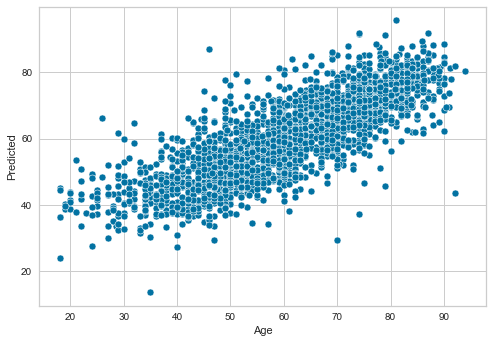

In [28]:
sns.scatterplot(data=results_df,x='Age',y="Predicted")

In [29]:
results_crossval_training=results_df

In [30]:
round(0.8023108974131913,2)

0.8

In [31]:
0.8023108974131913*0.8023108974131913

0.6437027761079603

In [32]:
# MAE

In [33]:
results_df.Predicted.mean()

60.02681843175251

In [34]:

results_df['absolute_error']=abs(results_df.residual)
print(results_df.absolute_error.mean())

7.083742025863926


In [35]:
results_df_healthy = results_df[(results_df['HTN']==0) 
                               &(results_df['DM']==0)
                                &(results_df['AF']==0)
                                  &(results_df['Prior_stroke']==0)
                                &(results_df['Smoking_ever']==0)
                               ]
results_df_patho = results_df[(results_df['HTN']==1) 
                               &(results_df['DM']==1)
                                &(results_df['AF']==1)
                                  &(results_df['Prior_stroke']==1)
                                &(results_df['Smoking_ever']==1)
                               ]

In [36]:
print(results_df_healthy.absolute_error.mean())
print(results_df_patho.absolute_error.mean())


7.743470773259525
nan


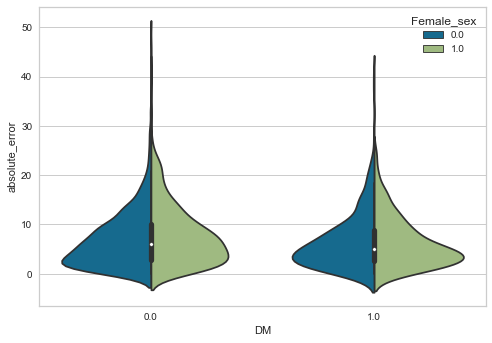

In [37]:
sns.violinplot(data=results_df,x='DM',y='absolute_error',split=True,hue='Female_sex')

In [38]:
#regression dilution bias correction as in : Association of relative brain age with tobacco smoking, alcohol consumption, and genetic variants
#Kaida Ning, Lu Zhao, Will Matloff, Fengzhu Sun & Arthur W. Toga https://www.nature.com/articles/s41598-019-56089-4



X_reg=np.array(results_df[['Age']])
y_reg=np.array(results_df.Predicted)
linreg = LinearRegression()
linreg.fit(X_reg,y_reg)
PredictedAge_adjusted = linreg.predict(X_reg)
results_df['PredictedAge_adjusted']=PredictedAge_adjusted
results_df['Age_adjusted_residual'] = results_df.Predicted - results_df.PredictedAge_adjusted
## method from 

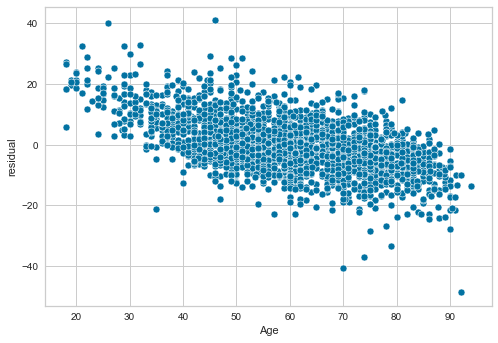

In [39]:
scaler = StandardScaler()
results_df_std = pd.DataFrame(scaler.fit_transform(results_df.drop('Site_name',axis=1)),columns=results_df.drop('Site_name',axis=1).columns,index=results_df.index)
sns.scatterplot(x='Age',y='residual',data=results_df)

In [40]:
results_df['pos_RBA'] = results_df['Age_adjusted_residual'].apply(lambda x: 1 if x<0 else 0)

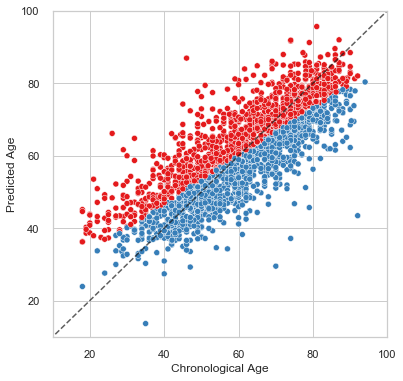

In [41]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette('Set1')   
sns.set_style('whitegrid')

fig1=sns.scatterplot(x='Age',y='Predicted',data=results_df,hue='pos_RBA')
fig1.legend([],[], frameon=False)
fig1.set(xticks=[20,40,60,80,100])
fig1.set(yticks=[20,40,60,80,100])

fig1.plot([0, 100], [0,100],'--k',alpha=0.7)

fig1.set(xlim=(10,100))
fig1.set(ylim=(10,100))

fig1.set_xlabel("Chronological Age")
fig1.set_ylabel("Predicted Age") 

plt.savefig("Predicted_age_train.tiff", dpi=300)

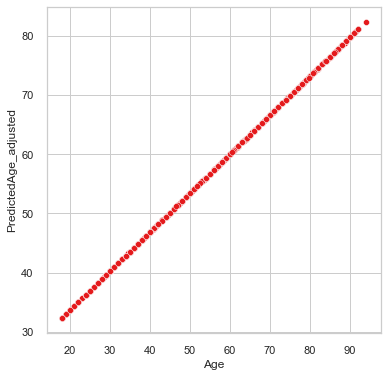

In [42]:
sns.scatterplot(x='Age',y='PredictedAge_adjusted',data=results_df)

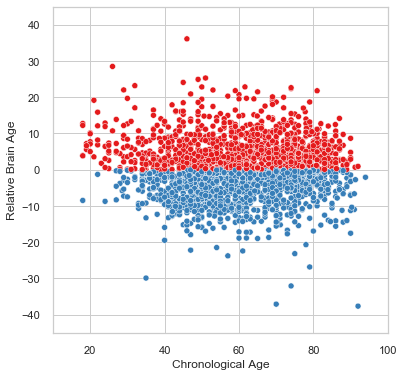

In [43]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig1=sns.scatterplot(x='Age',y='Age_adjusted_residual',data=results_df,hue='pos_RBA')
fig1.legend([],[], frameon=False)
fig1.set(xticks=[20,40,60,80,100])
#fig1.set(yticks=[20,40,60,80,100])

fig1.set(xlim=(10,100))
fig1.set(ylim=(-45,45))

fig1.set_xlabel("Chronological Age")
fig1.set_ylabel("Relative Brain Age") 
plt.savefig("RBA_scatter.tiff", dpi=300)

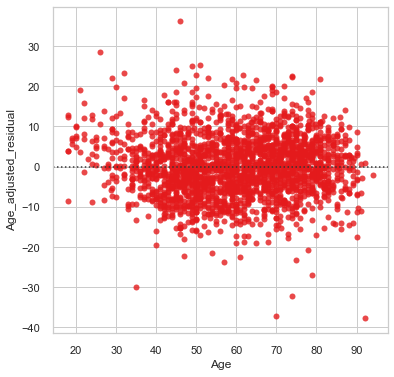

In [44]:
sns.residplot(x='Age',y='Age_adjusted_residual',data=results_df)

In [45]:
results_df['adjusted_RBA']=abs(results_df.Age_adjusted_residual)

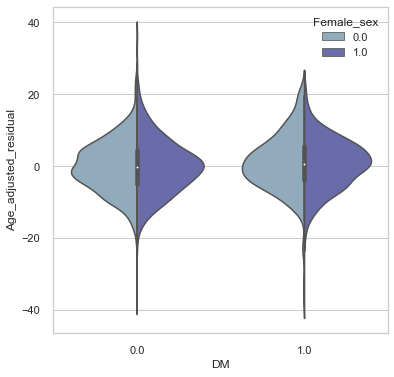

In [46]:
sns.set_palette("twilight")

sns.violinplot(data=results_df,x='DM',y='Age_adjusted_residual',split=True,hue='Female_sex')

In [47]:
clinical_var = [
 'Female_sex',
 'HTN',
 'DM',
 'AF',
 'CAD',
 'Smoking_ever',
 'Prior_stroke',]

In [48]:
results_df.shape

(2292, 23)

In [49]:
for var in clinical_var:
    pos_df = results_df[results_df[var]==1]['Age_adjusted_residual']
    neg_df = results_df[results_df[var]==0]['Age_adjusted_residual']
    print('mean relative brain age if {}=0 :{}+/-{} // if {}=1 :{}+/-{}'.format(var,round(neg_df.mean(),2),round(neg_df.std(),2),var,round(pos_df.mean(),2),round(pos_df.std(),2)))
    statistic,p = stats.ttest_ind(pos_df,neg_df)
    print('ttest = {},p={}'.format(round(statistic,3),round(p,4)))
    pos_df = results_df[results_df[var]==1]
    neg_df = results_df[results_df[var]==0]
    pos_rho,pos_p = stats.pearsonr(pos_df.Predicted,pos_df.Age)
    neg_rho,neg_p = stats.pearsonr(neg_df.Predicted,neg_df.Age)
    print('Person correlation predited age/age rho in {}=1: rho={},p-value={}'.format(var,round(pos_rho,2),round(pos_p,6)))
    print('Person correlation predited age/age rho in {}=0: rho={},p-value={}'.format(var,round(neg_rho,2),round(neg_p,6)))

    print('-'*50)
    

mean relative brain age if Female_sex=0 :-0.0+/-7.53 // if Female_sex=1 :0.01+/-7.48
ttest = 0.028,p=0.9775
Person correlation predited age/age rho in Female_sex=1: rho=0.82,p-value=0.0
Person correlation predited age/age rho in Female_sex=0: rho=0.79,p-value=0.0
--------------------------------------------------
mean relative brain age if HTN=0 :-0.32+/-7.66 // if HTN=1 :0.17+/-7.42
ttest = 1.49,p=0.1364
Person correlation predited age/age rho in HTN=1: rho=0.77,p-value=0.0
Person correlation predited age/age rho in HTN=0: rho=0.8,p-value=0.0
--------------------------------------------------
mean relative brain age if DM=0 :-0.2+/-7.47 // if DM=1 :0.74+/-7.61
ttest = 2.435,p=0.015
Person correlation predited age/age rho in DM=1: rho=0.75,p-value=0.0
Person correlation predited age/age rho in DM=0: rho=0.81,p-value=0.0
--------------------------------------------------
mean relative brain age if AF=0 :-0.15+/-7.46 // if AF=1 :1.11+/-7.75
ttest = 2.583,p=0.0099
Person correlation predi

In [50]:
test_var='Brain_volume'
test_rho,test_p = stats.pearsonr(results_df[test_var],results_df.Age_adjusted_residual)
print('Person correlation RBA/{} rho={},p-value={}'.format(test_var,round(test_rho,2),round(test_p,6)))


Person correlation RBA/Brain_volume rho=-0.19,p-value=0.0


In [51]:
test_var='WMH_volume'
test_rho,test_p = stats.pearsonr(results_df[test_var],results_df.Age_adjusted_residual)
print('Person correlation RBA/{} rho={},p-value={}'.format(test_var,round(test_rho,2),round(test_p,6)))


Person correlation RBA/WMH_volume rho=0.21,p-value=0.0


In [52]:
#plot


In [53]:
results_df.to_csv('results_df_forInteract.csv')

In [8]:
results_df_file = "results_df_forInteract.csv"
results_df = pd.read_csv(results_df_file)
results_df = results_df.set_index('ID')

In [10]:
results_df.shape

(2292, 23)

In [54]:


def get_index_from_healthy_aging(x):
    df_show_health = results_df.sort_values(by='Age_adjusted_residual').reset_index()
    index_x = str(df_show_health.iloc[[x]]['ID'].item())
    Age_x = df_show_health.iloc[[x]]['Age'].item()
    Predicted_Age_x = df_show_health.iloc[[x]]['Predicted'].item()
    Sex_x = df_show_health.iloc[[x]]['Female_sex'].item()
    HTN_x = df_show_health.iloc[[x]]['HTN'].item()
    AF_x = df_show_health.iloc[[x]]['AF'].item()
    DM_x = df_show_health.iloc[[x]]['DM'].item()
    CAD_x = df_show_health.iloc[[x]]['CAD'].item()
    smoking_x = df_show_health.iloc[[x]]['Smoking_ever'].item()
    #CCS_x = df_show_health.iloc[[x]]['CCS5_Item'].item()

    Prior_stroke_x = df_show_health.iloc[[x]]['Prior_stroke'].item()
    healthy_aging_x = df_show_health.iloc[[x]]['Age_adjusted_residual'].item()
    data_path='/data/triangulum/Sandbox/Martin/Data/MRIgenie_flair_intres_ALL/'
    example_filename = os.path.join(data_path, index_x+'_flair_ax_01_intres_01.nii.gz')
    img = nib.load(example_filename).get_fdata()
    def select_slice(x):
        plt.figure(figsize = (10,10))
        plt.imshow(img[:, :, x].T, cmap="gray", origin="lower")
    interact(select_slice, x=10,description='select slice');
    #print('Brain_health:{}'.format(Brain_health_x))
    print('healthy_aging:{}'.format(healthy_aging_x))
    print('Age:{}'.format(Age_x))
    print('Predicted Age:{}'.format(Predicted_Age_x))

    print('Sex:{}'.format(Sex_x))
    print('HTN:{}'.format(HTN_x))
    print('smoking:{}'.format(smoking_x))
    print('AF:{}'.format(AF_x))
    print('DM:{}'.format(DM_x))
    print('Prior_stroke:{}'.format(Prior_stroke_x))
    print('CAD:{}'.format(CAD_x))
    #print('CCS:{}'.format(CCS_x))
    print('index:{}'.format(index_x))

#get_index = interact(get_index_from_healthy_aging, x=50);
#display(widg,get_index)

In [55]:
results_df.shape

(2292, 23)

In [56]:
interact_manual(get_index_from_healthy_aging,x=IntSlider(min=0,max=2291,step=1,description='Resilience score'))

interactive(children=(IntSlider(value=0, description='Resilience score', max=2291), Button(description='Run In…

<function __main__.get_index_from_healthy_aging(x)>

In [57]:


def get_index_from_healthy_aging_CCS(x):
    df_show_health = results_df_CCS.sort_values(by='Age_adjusted_residual').reset_index()
    index_x = str(df_show_health.iloc[[x]]['ID'].item())
    Age_x = df_show_health.iloc[[x]]['Age'].item()
    Predicted_Age_x = df_show_health.iloc[[x]]['Predicted'].item()
    Sex_x = df_show_health.iloc[[x]]['Female_sex'].item()
    HTN_x = df_show_health.iloc[[x]]['HTN'].item()
    AF_x = df_show_health.iloc[[x]]['AF'].item()
    DM_x = df_show_health.iloc[[x]]['DM'].item()
    CAD_x = df_show_health.iloc[[x]]['CAD'].item()
    smoking_x = df_show_health.iloc[[x]]['Smoking_ever'].item()
    CCS_x = df_show_health.iloc[[x]]['CCS5item'].item()

    Prior_stroke_x = df_show_health.iloc[[x]]['Prior_stroke'].item()
    healthy_aging_x = df_show_health.iloc[[x]]['Age_adjusted_residual'].item()
    data_path='/data/triangulum/Sandbox/Martin/Data/MRIgenie_flair_intres_ALL/'
    example_filename = os.path.join(data_path, index_x+'_flair_ax_01_intres_01.nii.gz')
    img = nib.load(example_filename).get_fdata()
    def select_slice(x):
        plt.figure(figsize = (10,10))
        plt.imshow(img[:, :, x].T, cmap="gray", origin="lower")
    interact(select_slice, x=10,description='select slice');
    #print('Brain_health:{}'.format(Brain_health_x))
    print('healthy_aging:{}'.format(healthy_aging_x))
    print('Age:{}'.format(Age_x))
    print('Predicted Age:{}'.format(Predicted_Age_x))

    print('Sex:{}'.format(Sex_x))
    print('HTN:{}'.format(HTN_x))
    print('smoking:{}'.format(smoking_x))
    print('AF:{}'.format(AF_x))
    print('DM:{}'.format(DM_x))
    print('Prior_stroke:{}'.format(Prior_stroke_x))
    print('CAD:{}'.format(CAD_x))
    print('CCS:{}'.format(CCS_x))
    print('index:{}'.format(index_x))

#get_index = interact(get_index_from_healthy_aging, x=50);
#display(widg,get_index)

In [58]:
interact_manual(get_index_from_healthy_aging_CCS,x=IntSlider(min=0,max=2314,step=1,description='Resilience score'))

interactive(children=(IntSlider(value=0, description='Resilience score', max=2314), Button(description='Run In…

<function __main__.get_index_from_healthy_aging_CCS(x)>

In [59]:
# Out of sample predictions

print(external_test_df.shape)
print(df_clinical_test.shape)
print(training_df.shape)
print(df_clinical_training.shape)

In [60]:
print(df_radiomics_test.shape)
print(df_clinical_test.shape)
print(df_radiomics_train.shape)
print(df_clinical_train.shape)

(1871, 1854)
(1871, 15)
(2292, 1852)
(2292, 15)


In [61]:
selected_features = coefs_both_nona.columns.to_list()

In [62]:
X_train=df_radiomics_train.filter(selected_features)
y_train=df_clinical_train.Age

X_test=df_radiomics_test.filter(selected_features)
y_test=df_clinical_test.Age

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2292, 95)
(2292,)
(1871, 95)
(1871,)


In [63]:
X_features=X_train.columns
X_index = X_train.index


X_np = X_train.to_numpy()
y_np=y_train.to_numpy()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

df_clinical_np = df_clinical.to_numpy()

inner_CV = KFold(n_splits=3, shuffle=True, random_state=42)
outer_CV = KFold(n_splits=5, shuffle=True, random_state=42)

test_Age_pred = list()
test_True_age = list()
test_test_index_list= list()
test_R2_list = list()
test_features_list = list()
folds_c = 0
test_all_clinical_test_df = pd.DataFrame()
i=0

coefs_both=pd.DataFrame(index=X_features)

regressor = ElasticNetCV(l1_ratio=0.5, 
                         eps=0.001, 
                         n_alphas=100, 
                         alphas=None,
                         fit_intercept=True, 
                         normalize=False, 
                         precompute='auto', 
                         max_iter=100000, 
                         tol=0.0001, 
                         cv=inner_CV, 
                         copy_X=True, 
                         verbose=1, 
                         n_jobs=8, 
                         positive=False,
                         random_state=0,
                         selection='cyclic')

selector = LassoCV(eps=0.001,
                               n_alphas=100,
                               alphas=None,
                               fit_intercept=True,
                               normalize=False, 
                               precompute='auto', 
                               max_iter=100000,
                               tol=0.0001,
                               copy_X=True, 
                               cv=inner_CV, 
                               verbose=0, 
                               n_jobs=8, 
                               positive=False, 
                               random_state=0, 
                               selection='cyclic')

regressor_fitted = regressor.fit(X_train,y_train)
test_age_preds=regressor_fitted.predict(X_test)





[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:    0.1s finished


In [64]:
y_test.columns=['true']
y_test.name='test'
y_test

ID
304085501     60.0
304985271     88.0
306862528     46.0
307879933     78.0
308171041     43.0
              ... 
4400001626    85.9
4400001630    80.3
4400001636    67.1
4400001643    72.5
4400001652    63.0
Name: test, Length: 1871, dtype: float64

In [65]:
test_age_preds_df=pd.DataFrame(test_age_preds,index=df_clinical_test.index,columns=['Predicted'])
y_test.name='True'
True_df=pd.DataFrame(y_test,index=y_test.index)
test_age_preds_df=test_age_preds_df.join(True_df)
test_results_df=test_age_preds_df.join(df_clinical_test)
test_results_df['residual']=(test_results_df['Predicted']-test_results_df['True'])

test_results_df

,Predicted,True,Age,Female_sex,HTN,DM,AF,CAD,Smoking_ever,Prior_stroke,WMH_volume,Brain_volume,WMH_Bvadj,No_csf_brain_vol,Ventricle_volume,Label,Site_name,residual
ID,,,,,,,,,,,,,,,,,,
304085501,51.333248,60.0,60.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.038453,1776.842470,0.508681,1615.577401,27.100948,1.0,GCNKSS,-8.666752
304985271,82.228644,88.0,88.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,35.405012,1287.869883,2.749114,1010.080877,30.505361,1.0,GCNKSS,-5.771356
306862528,62.507837,46.0,46.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,18.215622,1504.826053,1.210480,1274.160717,16.628683,1.0,GCNKSS,16.507837
307879933,65.118977,78.0,78.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,26.983144,1521.249277,1.773749,1316.037769,61.183696,1.0,GCNKSS,-12.881023
308171041,43.724648,43.0,43.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.198876,1451.099058,0.220445,1369.707489,14.848993,1.0,GCNKSS,0.724648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400001626,83.500508,85.9,85.9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7.017777,1319.098866,0.532013,1017.897747,35.828316,1.0,GEISINGER,-2.399492
4400001630,60.725639,80.3,80.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.669264,1559.914760,0.427540,1205.593799,19.330785,1.0,GEISINGER,-19.574361
4400001636,52.789527,67.1,67.1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.931601,1719.445986,0.344972,1498.701055,23.737860,1.0,GEISINGER,-14.310473


In [66]:

test_results_df['absolute_error']=abs(test_results_df.residual)
print(test_results_df.Predicted.mean())
print(test_results_df.absolute_error.mean())

62.2779070506057
9.357581281028004


(0.628396265202591, 3.954809812628985e-206)


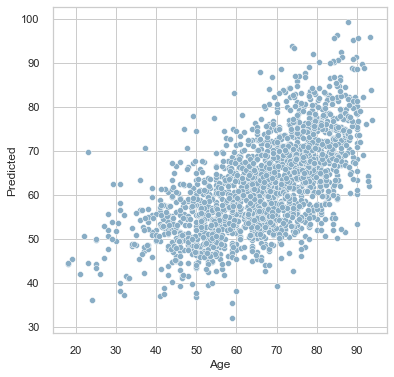

In [67]:
sns.scatterplot(data=test_results_df,x='Age',y='Predicted')
print(stats.pearsonr(test_results_df.Predicted,test_results_df.Age))

In [68]:
r2_score(test_results_df.Age,test_results_df.Predicted)

0.30113437973558077

In [69]:
test_results_df['absolute_error']=abs(test_results_df.residual)
print(test_results_df.absolute_error.mean())

9.357581281028004


In [70]:
0.628396265202591*0.628396265202591

0.39488186612056503

In [71]:
#regression dilution bias correction as in : Association of relative brain age with tobacco smoking, alcohol consumption, and genetic variants
#Kaida Ning, Lu Zhao, Will Matloff, Fengzhu Sun & Arthur W. Toga https://www.nature.com/articles/s41598-019-56089-4



X_reg=np.array(test_results_df[['Age']])
y_reg=np.array(test_results_df.Predicted)
linreg = LinearRegression()
linreg.fit(X_reg,y_reg)
PredictedAge_adjusted = linreg.predict(X_reg)
test_results_df['PredictedAge_adjusted']=PredictedAge_adjusted
test_results_df['Age_adjusted_residual'] = test_results_df.Predicted - test_results_df.PredictedAge_adjusted
## method from 

In [72]:
test_results_df['pos_RBA'] = test_results_df['Age_adjusted_residual'].apply(lambda x: 1 if x<0 else 0)

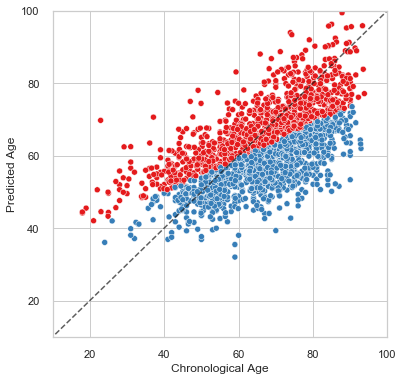

In [73]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette('Set1')   
sns.set_style('whitegrid')

fig1=sns.scatterplot(x='Age',y='Predicted',data=test_results_df,hue='pos_RBA')
fig1.legend([],[], frameon=False)
fig1.set(xticks=[20,40,60,80,100])
fig1.set(yticks=[20,40,60,80,100])

fig1.plot([0, 100], [0,100],'--k',alpha=0.7)

fig1.set(xlim=(10,100))
fig1.set(ylim=(10,100))

fig1.set_xlabel("Chronological Age")
fig1.set_ylabel("Predicted Age") 

plt.savefig("Predicted_age_external_test.tiff", dpi=300)

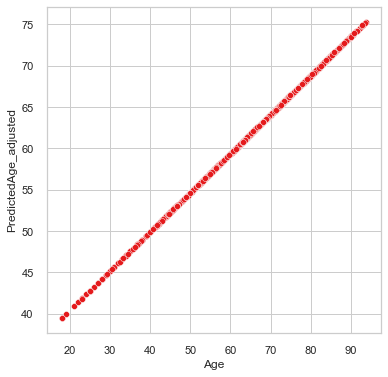

In [74]:
sns.scatterplot(x='Age',y='PredictedAge_adjusted',data=test_results_df)

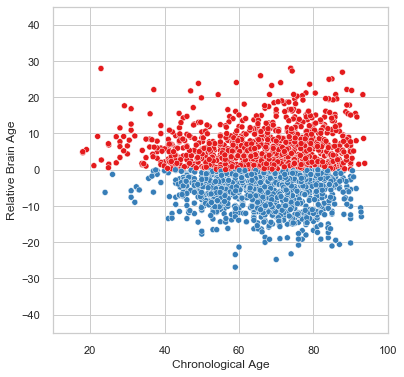

In [75]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig1=sns.scatterplot(x='Age',y='Age_adjusted_residual',data=test_results_df,hue='pos_RBA')
fig1.legend([],[], frameon=False)
fig1.set(xticks=[20,40,60,80,100])
#fig1.set(yticks=[20,40,60,80,100])

fig1.set(xlim=(10,100))
fig1.set(ylim=(-45,45))

fig1.set_xlabel("Chronological Age")
fig1.set_ylabel("Relative Brain Age") 
plt.savefig("RBA_scatter_external.tiff", dpi=300)

In [76]:
clinical_var = [
 'Female_sex',
 'HTN',
 'DM',
 'AF',
 'CAD',
 'Smoking_ever',
 'Prior_stroke',]

In [77]:
for var in clinical_var:
    pos_df = test_results_df[test_results_df[var]==1]['Age_adjusted_residual']
    neg_df = test_results_df[test_results_df[var]==0]['Age_adjusted_residual']
    print('mean relative brain age if {}=0 :{}+/-{} // if {}=1 :{}+/-{}'.format(var,round(neg_df.mean(),2),round(neg_df.std(),2),var,round(pos_df.mean(),2),round(pos_df.std(),2)))
    statistic,p = stats.ttest_ind(pos_df,neg_df)
    print('ttest = {},p={}'.format(round(statistic,3),round(p,4)))
    pos_df = test_results_df[test_results_df[var]==1]
    neg_df = test_results_df[test_results_df[var]==0]
    pos_rho,pos_p = stats.pearsonr(pos_df.Predicted,pos_df.Age)
    neg_rho,neg_p = stats.pearsonr(neg_df.Predicted,neg_df.Age)
    print('Person correlation predited age/age rho in {}=1: rho={},p-value={}'.format(var,round(pos_rho,2),round(pos_p,6)))
    print('Person correlation predited age/age rho in {}=0: rho={},p-value={}'.format(var,round(neg_rho,2),round(neg_p,6)))

    print('-'*50)
    

mean relative brain age if Female_sex=0 :0.27+/-8.54 // if Female_sex=1 :-0.32+/-7.72
ttest = -1.549,p=0.1216
Person correlation predited age/age rho in Female_sex=1: rho=0.64,p-value=0.0
Person correlation predited age/age rho in Female_sex=0: rho=0.63,p-value=0.0
--------------------------------------------------
mean relative brain age if HTN=0 :-0.8+/-8.0 // if HTN=1 :0.32+/-8.23
ttest = 2.665,p=0.0078
Person correlation predited age/age rho in HTN=1: rho=0.6,p-value=0.0
Person correlation predited age/age rho in HTN=0: rho=0.63,p-value=0.0
--------------------------------------------------
mean relative brain age if DM=0 :-0.01+/-8.22 // if DM=1 :0.08+/-7.85
ttest = 0.142,p=0.8867
Person correlation predited age/age rho in DM=1: rho=0.55,p-value=0.0
Person correlation predited age/age rho in DM=0: rho=0.64,p-value=0.0
--------------------------------------------------
mean relative brain age if AF=0 :-0.08+/-7.97 // if AF=1 :0.38+/-9.1
ttest = 0.918,p=0.359
Person correlation pred

In [78]:
test_var='Brain_volume'
test_rho,test_p = stats.pearsonr(test_results_df[test_var],test_results_df.Age_adjusted_residual)
print('Person correlation RBA/{} rho={},p-value={}'.format(test_var,round(test_rho,2),round(test_p,6)))


Person correlation RBA/Brain_volume rho=-0.19,p-value=0.0


In [79]:
test_var='WMH_volume'
test_rho,test_p = stats.pearsonr(test_results_df[test_var],test_results_df.Age_adjusted_residual)
print('Person correlation RBA/{} rho={},p-value={}'.format(test_var,round(test_rho,2),round(test_p,6)))


Person correlation RBA/WMH_volume rho=0.05,p-value=0.03926


In [80]:
test_results_df.to_csv('results_df_external_forInteract.csv')

In [81]:


def get_index_from_healthy_aging(x):
    df_show_health = test_results_df.sort_values(by='Age_adjusted_residual').reset_index()
    index_x = str(df_show_health.iloc[[x]]['ID'].item())
    Age_x = df_show_health.iloc[[x]]['Age'].item()
    Predicted_Age_x = df_show_health.iloc[[x]]['Predicted'].item()
    Sex_x = df_show_health.iloc[[x]]['Female_sex'].item()
    HTN_x = df_show_health.iloc[[x]]['HTN'].item()
    AF_x = df_show_health.iloc[[x]]['AF'].item()
    DM_x = df_show_health.iloc[[x]]['DM'].item()
    CAD_x = df_show_health.iloc[[x]]['CAD'].item()
    smoking_x = df_show_health.iloc[[x]]['Smoking_ever'].item()
    #CCS_x = df_show_health.iloc[[x]]['CCS5_Item'].item()

    Prior_stroke_x = df_show_health.iloc[[x]]['Prior_stroke'].item()
    healthy_aging_x = df_show_health.iloc[[x]]['Age_adjusted_residual'].item()
    data_path='/data/triangulum/Sandbox/Martin/Data/MRIgenie_flair_intres_ALL/'
    example_filename = os.path.join(data_path, index_x+'_flair_ax_01_intres_01.nii.gz')
    img = nib.load(example_filename).get_fdata()
    def select_slice(x):
        plt.figure(figsize = (10,10))
        plt.imshow(img[:, :, x].T, cmap="gray", origin="lower")
    interact(select_slice, x=10,description='select slice');
    #print('Brain_health:{}'.format(Brain_health_x))
    print('healthy_aging:{}'.format(healthy_aging_x))
    print('Age:{}'.format(Age_x))
    print('Predicted Age:{}'.format(Predicted_Age_x))

    print('Sex:{}'.format(Sex_x))
    print('HTN:{}'.format(HTN_x))
    print('smoking:{}'.format(smoking_x))
    print('AF:{}'.format(AF_x))
    print('DM:{}'.format(DM_x))
    print('Prior_stroke:{}'.format(Prior_stroke_x))
    print('CAD:{}'.format(CAD_x))
    #print('CCS:{}'.format(CCS_x))
    print('index:{}'.format(index_x))

#get_index = interact(get_index_from_healthy_aging, x=50);
#display(widg,get_index)

In [82]:
interact_manual(get_index_from_healthy_aging,x=IntSlider(min=0,max=1870,step=1,description='Resilience score'))

interactive(children=(IntSlider(value=0, description='Resilience score', max=1870), Button(description='Run In…

<function __main__.get_index_from_healthy_aging(x)>

In [83]:
#Check prognosis diff

In [84]:
#Import data
input_prognosis = "MRIGENIE_VRF_NIHSS_triMRS_3m_6m.csv"
df_prognosis = pd.read_csv(input_prognosis).set_index('ID').drop('Unnamed: 0',axis=1)
df_prognosis=df_prognosis.filter(['Good_outcome','NIHSS'],axis=1)

print("Number of rows in data =",df_prognosis.shape[0])
print("Number of columns in data =",df_prognosis.shape[1])
print("\n")
print("**Sample data:**")
df_prognosis.head()

Number of rows in data = 2579
Number of columns in data = 2


**Sample data:**


,Good_outcome,NIHSS
ID,,
2500000005,0,5
400001877,1,0
400001878,0,4
400001879,1,3
400001881,0,5


In [85]:
outcome_df = test_results_df.join(df_prognosis,how='inner')

In [86]:
outcome_df.Good_outcome.describe()

count    1871.000000
mean        0.724746
std         0.446762
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Good_outcome, dtype: float64

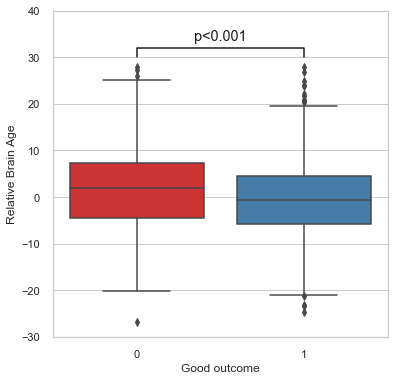

In [87]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig2=sns.boxplot(data=outcome_df,y='Age_adjusted_residual',x='Good_outcome')
fig2.set(ylabel='Relative Brain Age',xlabel='Good outcome')
fig2.set(ylim=(-30,40))
# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = outcome_df['Age_adjusted_residual'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h+1,"p<0.001", ha='center', va='bottom', color=col,fontsize ='large')
plt.savefig('fig2_boxplot.tiff',dpi=300)

In [88]:
good_df = outcome_df[outcome_df['Good_outcome']==1]
bad_df = outcome_df[outcome_df['Good_outcome']==0]
stats.ttest_ind(good_df.Age_adjusted_residual,bad_df.Age_adjusted_residual)


Ttest_indResult(statistic=-5.348839924044528, pvalue=9.939499293138488e-08)

In [89]:
print(good_df.Age_adjusted_residual.mean())
print(bad_df.Age_adjusted_residual.mean())

-0.6188318865592094
1.6293903653869473


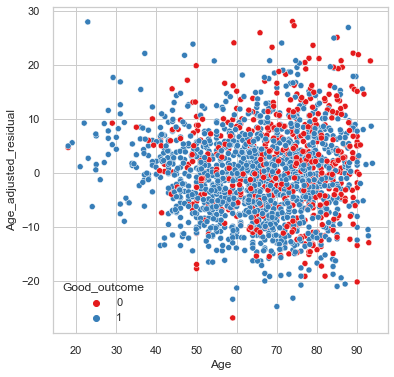

In [90]:
sns.set_palette('Set1')
sns.scatterplot(x='Age',y='Age_adjusted_residual',data=outcome_df,hue='Good_outcome')

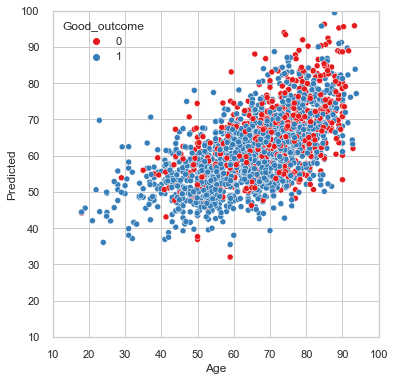

In [91]:
plt.xlim(left=10,right=100)
plt.ylim(top=100,bottom=10)
sns.set_palette('Set1')
plt.axis('square')
plt.xlim(left=10,right=100)
plt.ylim(top=100,bottom=10)

sns.scatterplot(x='Age',y='Predicted',data=outcome_df,hue='Good_outcome')


In [92]:
#independance of age and RBA
stats.pearsonr(outcome_df.Age,outcome_df.Age_adjusted_residual)

(-3.097159030976404e-16, 1.0000000000002713)

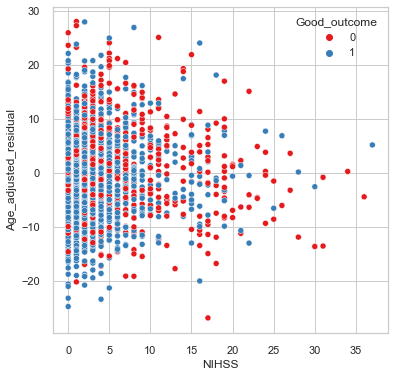

In [93]:
sns.scatterplot(x='NIHSS',y='Age_adjusted_residual',data=outcome_df,hue='Good_outcome')

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/PHShome/m

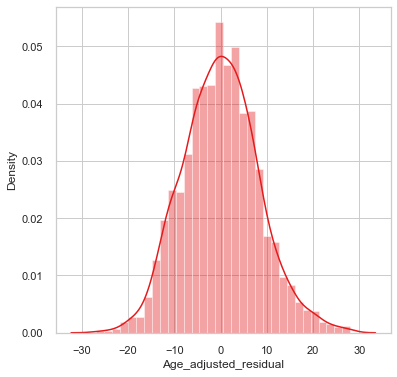

In [94]:
#normality of residuals
sns.distplot(outcome_df.Age_adjusted_residual)

In [95]:
#residual esperance and std
print(outcome_df.Age_adjusted_residual.mean())
print(outcome_df.Age_adjusted_residual.std())


-5.347109417157783e-15
8.18010528902284


In [96]:
#residual mean non different than 0
from scipy.stats import ttest_1samp
ttest_1samp(a=outcome_df.Age_adjusted_residual,popmean=0.0)

Ttest_1sampResult(statistic=-2.8274639160188235e-14, pvalue=0.9999999999999775)

In [97]:
stats.pearsonr(outcome_df.Age,outcome_df.Age_adjusted_residual)

(-3.097159030976404e-16, 1.0000000000002713)

In [98]:
import scipy.stats as stats
Fstats = list()
p_values = list()
NIHSS_list = list()
age_adj_res_list=list()
good_outcome_list=list()

for i in outcome_df.sort_values(by='NIHSS').NIHSS.unique():
    infold_df = outcome_df[outcome_df['NIHSS']==i]
    infold_good = infold_df[infold_df['Good_outcome']==1]
    infold_bad = infold_df[infold_df['Good_outcome']==0]
    print('NIHSS={}'.format(i))
    print('n={}'.format(infold_df.NIHSS.count()))
    print(infold_good.Age_adjusted_residual.mean())
    print(infold_bad.Age_adjusted_residual.mean())
    stat_infold,p_infold = stats.ttest_ind(infold_good.Age_adjusted_residual,infold_bad.Age_adjusted_residual)
    Fstats.append(stat_infold)
    p_values.append(p_infold)
    NIHSS_list.append(i)
    age_adj_res_list.append(infold_df.Age_adjusted_residual)
    good_outcome_list.append(infold_df.Good_outcome)
    print('stat={} ; p-value={}'.format(round(stat_infold,2),round(p_infold,3)))
    print('-'*50)

NIHSS=0
n=295
-0.3632416222704815
3.5244808770614937
stat=-2.85 ; p-value=0.005
--------------------------------------------------
NIHSS=1
n=261
-1.2503053200833156
3.863697478995323
stat=-3.37 ; p-value=0.001
--------------------------------------------------
NIHSS=2
n=287
-0.6143025860841141
1.1170112581224994
stat=-1.41 ; p-value=0.159
--------------------------------------------------
NIHSS=3
n=230
-1.0318619885144447
2.667407898814026
stat=-3.23 ; p-value=0.001
--------------------------------------------------
NIHSS=4
n=171
-0.019049080187867086
1.520628555259645
stat=-1.11 ; p-value=0.269
--------------------------------------------------
NIHSS=5
n=135
-0.3663794143316821
5.400930674163411
stat=-3.7 ; p-value=0.0
--------------------------------------------------
NIHSS=6
n=89
-1.3649979642696832
1.8565191136441073
stat=-2.07 ; p-value=0.041
--------------------------------------------------
NIHSS=7
n=76
-0.28247116074726303
0.9405085688712745
stat=-0.68 ; p-value=0.498
---------

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3703: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encounte

In [99]:
outcome_df_effect_size = outcome_df.filter(['NIHSS','Good_outcome','Age_adjusted_residual'],axis=1).dropna()
outcome_df_effect_size.sort_values(by='NIHSS')
for var in outcome_df_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    print('NIHSS<{}'.format(var))
    outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<var].dropna()
    print(outcome_df_effect_size_infold.shape[0])
    print(stats.spearmanr(outcome_df_effect_size_infold.Good_outcome,outcome_df_effect_size_infold.Age_adjusted_residual))
    print(stats.ttest_ind(outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==0].Age_adjusted_residual,outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==1].Age_adjusted_residual))

NIHSS<0
0
SpearmanrResult(correlation=nan, pvalue=nan)
Ttest_indResult(statistic=nan, pvalue=nan)
NIHSS<1
295
SpearmanrResult(correlation=-0.1469523445315071, pvalue=0.011503916587459985)
Ttest_indResult(statistic=2.848109778123223, pvalue=0.004709201704644178)
NIHSS<2
556
SpearmanrResult(correlation=-0.16319493304442984, pvalue=0.00011092436531045773)
Ttest_indResult(statistic=4.409520615094361, pvalue=1.2448451933375275e-05)
NIHSS<3
843
SpearmanrResult(correlation=-0.1360540369659416, pvalue=7.406499989681723e-05)
Ttest_indResult(statistic=4.320606516227676, pvalue=1.7419031757798028e-05)
NIHSS<4
1073
SpearmanrResult(correlation=-0.15553960456125965, pvalue=3.051893741008899e-07)
Ttest_indResult(statistic=5.2995975956182955, pvalue=1.4086829194567042e-07)
NIHSS<5
1244
SpearmanrResult(correlation=-0.14633002201519799, pvalue=2.1734631703448343e-07)
Ttest_indResult(statistic=5.329762471915296, pvalue=1.1669729460213334e-07)
NIHSS<6
1379
SpearmanrResult(correlation=-0.16070225419634906,

In [100]:
#effect size
from numpy import mean
from numpy import var
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [101]:
outcome_df.Good_outcome.describe()

count    1871.000000
mean        0.724746
std         0.446762
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Good_outcome, dtype: float64

NIHSS<ou=0
295
-0.1469523445315071 0.011503916587459985
Ttest_indResult(statistic=2.848109778123223, pvalue=0.004709201704644178)
0.08161428390269515


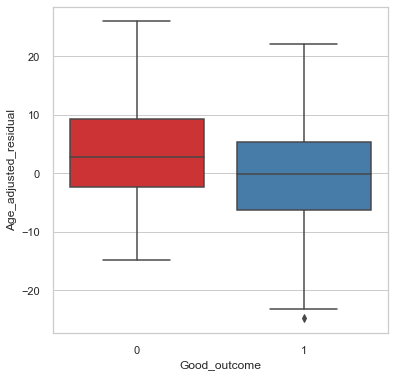

NIHSS<ou=1
556
-0.16319493304442984 0.00011092436531045773
Ttest_indResult(statistic=4.409520615094361, pvalue=1.2448451933375275e-05)
0.16330202132923885


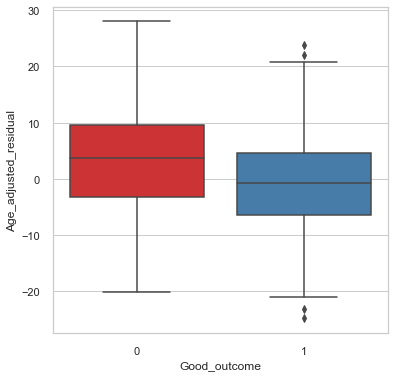

NIHSS<ou=2
843
-0.1360540369659416 7.406499989681723e-05
Ttest_indResult(statistic=4.320606516227676, pvalue=1.7419031757798028e-05)
0.1715108101455297


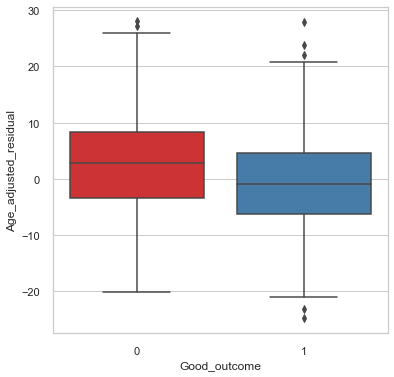

NIHSS<ou=3
1073
-0.15553960456125965 3.051893741008899e-07
Ttest_indResult(statistic=5.2995975956182955, pvalue=1.4086829194567042e-07)
0.17014756834290629


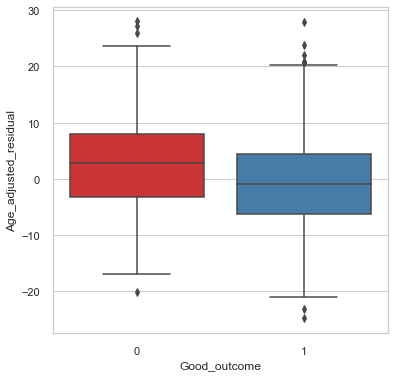

NIHSS<ou=4
1244
-0.14633002201519799 2.1734631703448343e-07
Ttest_indResult(statistic=5.329762471915296, pvalue=1.1669729460213334e-07)
0.15469740837186607


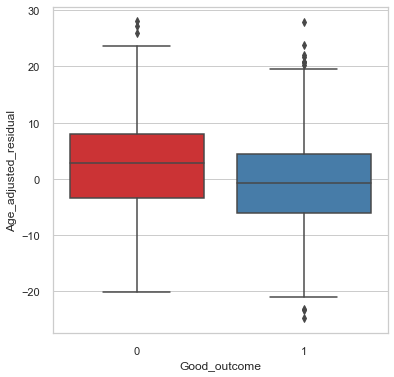

NIHSS<ou=5
1379
-0.16070225419634906 1.957521010244314e-09
Ttest_indResult(statistic=6.348226748592199, pvalue=2.9504544978663417e-10)
0.1318816801918786


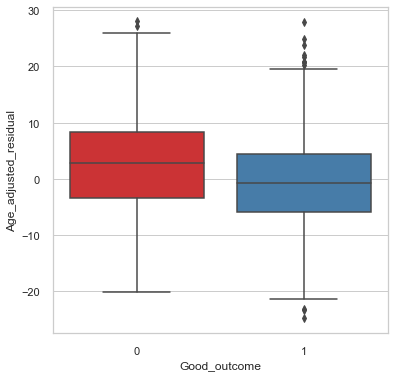

NIHSS<ou=6
1468
-0.1614664669040144 4.905284670189915e-10
Ttest_indResult(statistic=6.594999873182974, pvalue=5.920108707592049e-11)
0.13477694520187763


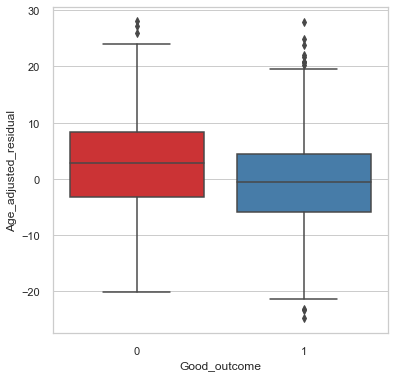

NIHSS<ou=7
1544
-0.15669854850051465 5.994755310167897e-10
Ttest_indResult(statistic=6.5405657696993975, pvalue=8.31320136191456e-11)
0.13232603001947282


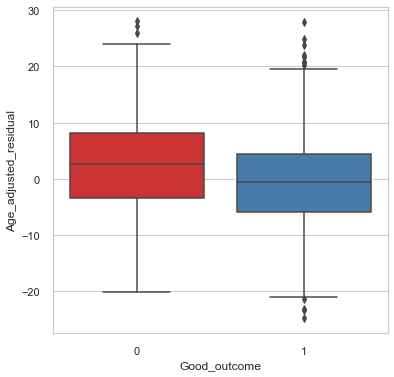

NIHSS<ou=8
1603
-0.14634817149630566 3.943125291025936e-09
Ttest_indResult(statistic=6.184137737886033, pvalue=7.910186189177787e-10)
0.12708363873104098


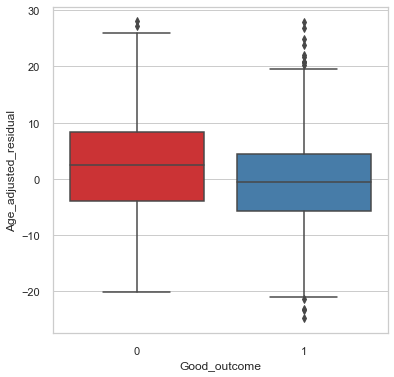

NIHSS<ou=9
1642
-0.14935688589182272 1.189053176372788e-09
Ttest_indResult(statistic=6.370900439983481, pvalue=2.435163167800569e-10)
0.12482790394144823


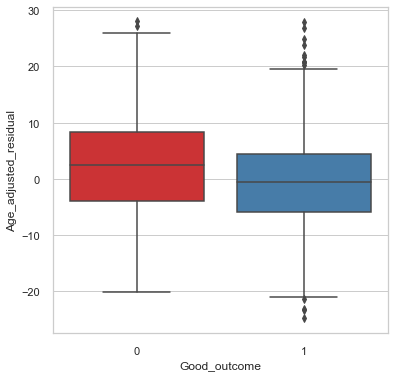

NIHSS<ou=10
1673
-0.14867136908298118 9.935289722529171e-10
Ttest_indResult(statistic=6.374141751124019, pvalue=2.374155802604846e-10)
0.11991113521192313


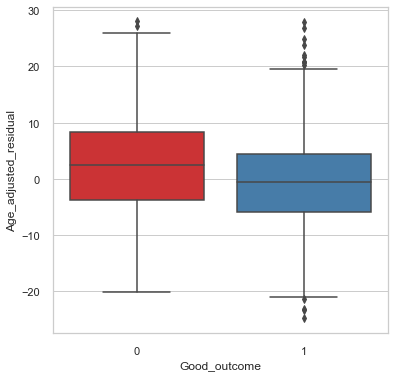

NIHSS<ou=11
1702
-0.1478016866911013 8.966325414423528e-10
Ttest_indResult(statistic=6.446762963552956, pvalue=1.4847492971804028e-10)
0.11647846544637792


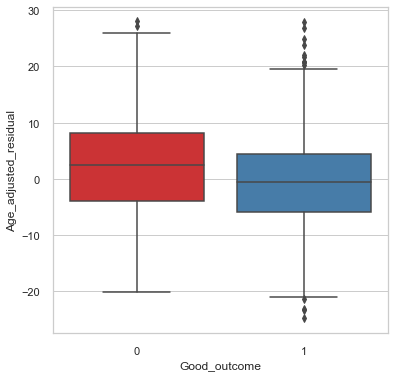

NIHSS<ou=12
1722
-0.14993060734083286 4.038727141737859e-10
Ttest_indResult(statistic=6.513095940321787, pvalue=9.63775690771281e-11)
0.11436348849094899


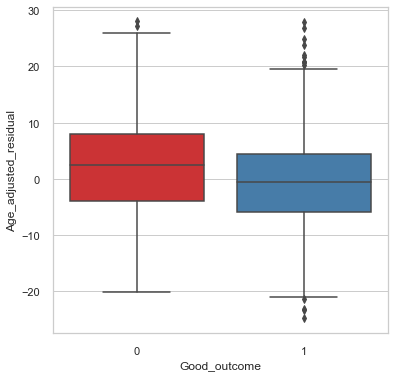

NIHSS<ou=13
1732
-0.14787816799403888 6.254705964218681e-10
Ttest_indResult(statistic=6.435130147750053, pvalue=1.5930209977888643e-10)
0.11469158534836975


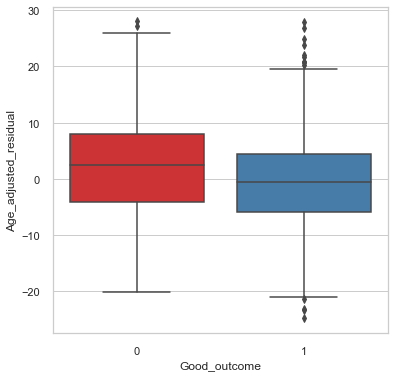

NIHSS<ou=14
1746
-0.1490160004452447 3.9203979019159986e-10
Ttest_indResult(statistic=6.549875586472432, pvalue=7.555609235991872e-11)
0.1101297693199009


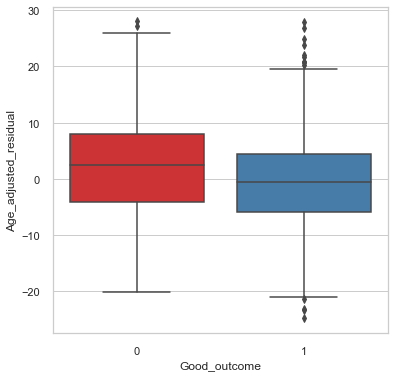

NIHSS<ou=15
1766
-0.1500788122037606 2.3224397329711666e-10
Ttest_indResult(statistic=6.655611462525387, pvalue=3.7546124043130115e-11)
0.10813215517443242


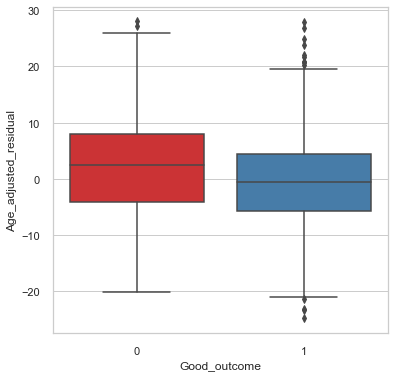

NIHSS<ou=16
1784
-0.1446904591297325 8.283301793389052e-10
Ttest_indResult(statistic=6.427989714170654, pvalue=1.655667026414787e-10)
0.11312926218505577


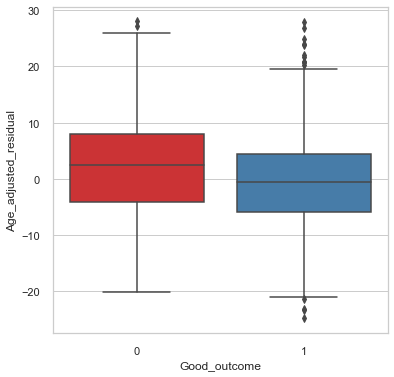

NIHSS<ou=17
1805
-0.1390692251761819 2.9716693932113223e-09
Ttest_indResult(statistic=6.103963897564129, pvalue=1.2637619067112401e-09)
0.11659491052388828


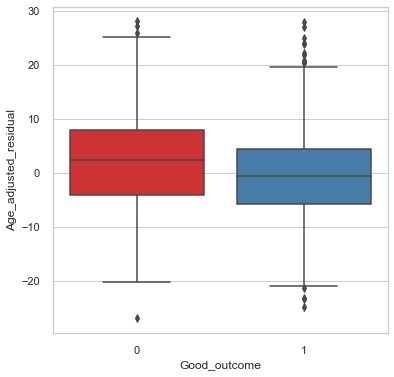

NIHSS<ou=18
1814
-0.1337212763377436 1.0835685039166389e-08
Ttest_indResult(statistic=5.8705305592918915, pvalue=5.154802020136375e-09)
0.11783182474317289


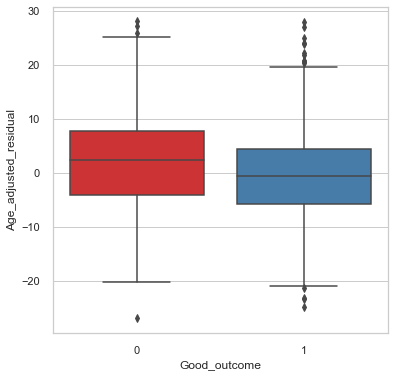

NIHSS<ou=19
1831
-0.13257724076203134 1.2389143364620238e-08
Ttest_indResult(statistic=5.879400950383189, pvalue=4.883218495429514e-09)
0.11655526887276177


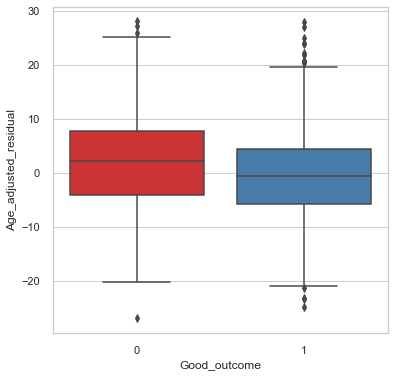

NIHSS<ou=20
1837
-0.13054399832071417 1.961268100491117e-08
Ttest_indResult(statistic=5.8086927199456, pvalue=7.405192907260313e-09)
0.11750478635776015


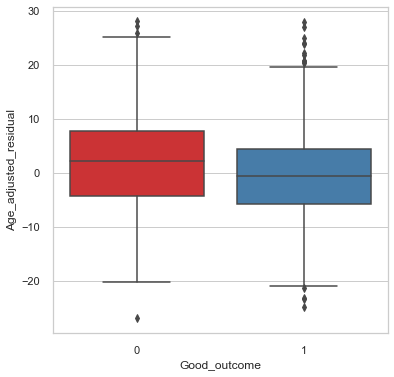

NIHSS<ou=21
1842
-0.12854972459017044 3.087444248987529e-08
Ttest_indResult(statistic=5.73748541073511, pvalue=1.1212006115804849e-08)
0.11969880847442699


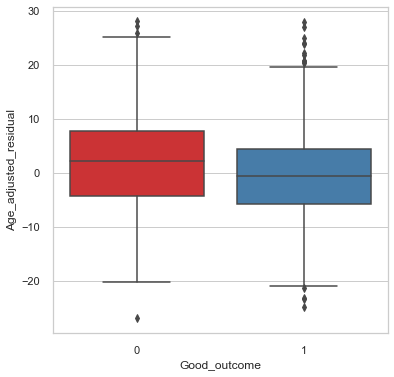

NIHSS<ou=22
1847
-0.12846823590655046 3.0181640636855555e-08
Ttest_indResult(statistic=5.766138318327082, pvalue=9.488101989212435e-09)
0.12033432961649056


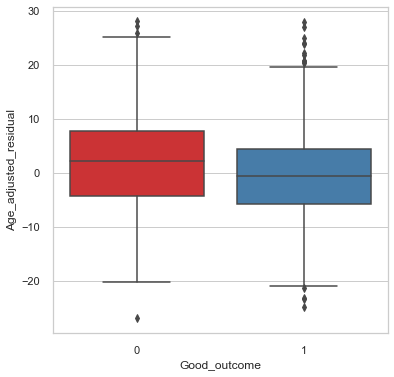

NIHSS<ou=23
1850
-0.1275007747658041 3.738466627563087e-08
Ttest_indResult(statistic=5.73451123769098, pvalue=1.13994877846542e-08)
0.12061927407472385


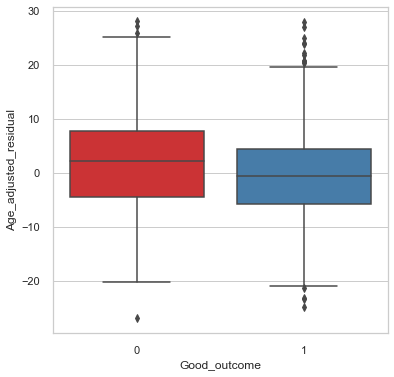

NIHSS<ou=24
1855
-0.12610674592889143 5.051502661370738e-08
Ttest_indResult(statistic=5.67936766034603, pvalue=1.566458435490805e-08)
0.12028822641985579


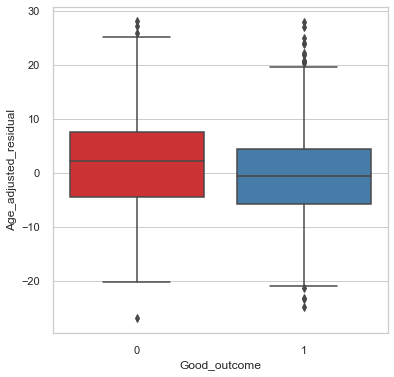

NIHSS<ou=25
1858
-0.12476678872450711 6.833739646411235e-08
Ttest_indResult(statistic=5.6355479181072, pvalue=2.0127059048203842e-08)
0.12177600143819434


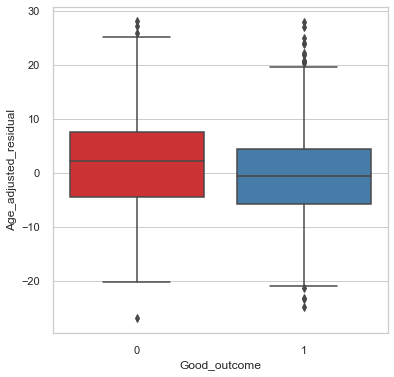

NIHSS<ou=26
1860
-0.12342362956285421 9.303430766554948e-08
Ttest_indResult(statistic=5.590968206118455, pvalue=2.592865803495292e-08)
0.12168704649399427


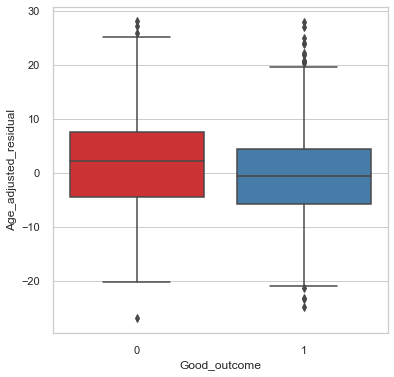

NIHSS<ou=27
1862
-0.12329519957555472 9.44445952498722e-08
Ttest_indResult(statistic=5.586871266016062, pvalue=2.653331904546363e-08)
0.12157506186681519


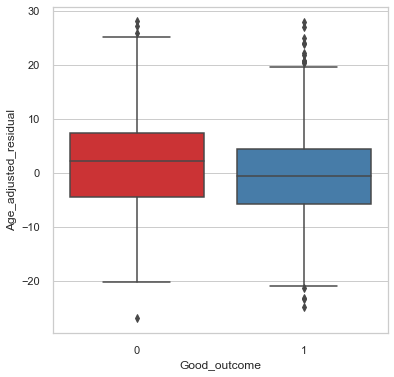

NIHSS<ou=28
1864
-0.12177446137987612 1.3376701872339371e-07
Ttest_indResult(statistic=5.525400575410015, pvalue=3.750542927964428e-08)
0.12262340972448003


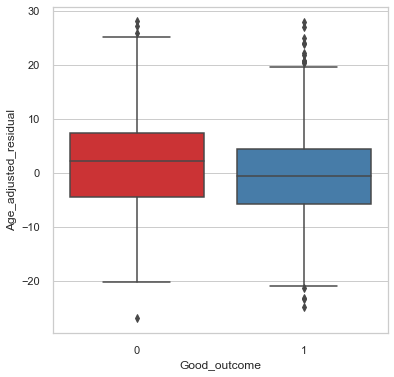

NIHSS<ou=30
1866
-0.12028753922879107 1.8728117292112322e-07
Ttest_indResult(statistic=5.459609421304499, pvalue=5.411165099663323e-08)
0.12405620555813614


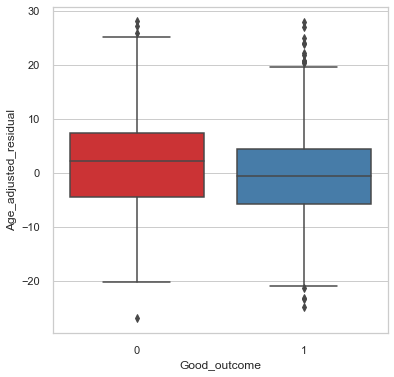

NIHSS<ou=31
1868
-0.11851411473510513 2.7929605489271005e-07
Ttest_indResult(statistic=5.3827453640313445, pvalue=8.262196793624117e-08)
0.12522904279869973


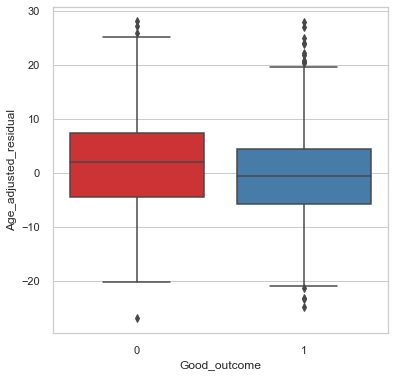

NIHSS<ou=34
1869
-0.1184964394423311 2.783988777250331e-07
Ttest_indResult(statistic=5.381458875358258, pvalue=8.320038317339534e-08)
0.1251730477323579


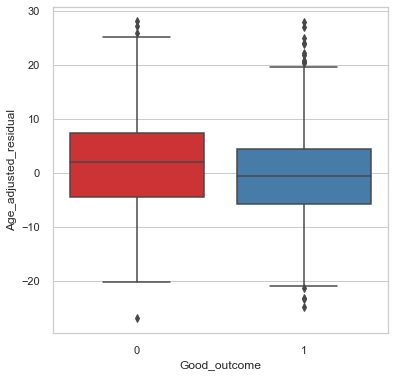

NIHSS<ou=36
1870
-0.11776918625487645 3.270930340689635e-07
Ttest_indResult(statistic=5.357717348780866, pvalue=9.471042198120663e-08)
0.12554078376418554


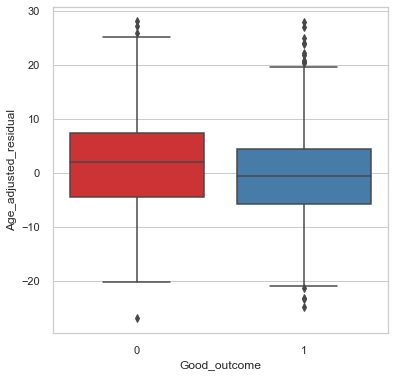

NIHSS<ou=37
1871
-0.1174778324842596 3.47329809856155e-07
Ttest_indResult(statistic=5.348839924044528, pvalue=9.939499293138488e-08)
0.1251109290816143


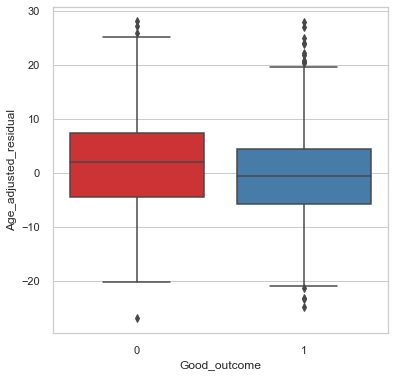

In [102]:
outcome_df_effect_size = outcome_df.filter(['NIHSS','Good_outcome','Age_adjusted_residual'],axis=1).dropna()
outcome_df_effect_size.sort_values(by='NIHSS')
NIHSS_list=list()
effect_sizes = list()
rho_NIHSS_list=list()
cum_pop_size = list()
for NIHSS_level in outcome_df_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    print('NIHSS<ou={}'.format(NIHSS_level))
    outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
    print(outcome_df_effect_size_infold.shape[0])
    cum_pop_size.append(outcome_df_effect_size_infold.shape[0])
    rho_NIHSS, p_spear_NIHSS = stats.spearmanr(outcome_df_effect_size_infold.Good_outcome,outcome_df_effect_size_infold.Age_adjusted_residual)
    print(rho_NIHSS,p_spear_NIHSS)
    rho_NIHSS_list.append(rho_NIHSS)
    print(stats.ttest_ind(outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==0].Age_adjusted_residual,outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==1].Age_adjusted_residual))

    outcome_infold=np.array(outcome_df_effect_size_infold.Good_outcome)
    age_adj_infold=np.array(outcome_df_effect_size_infold.Age_adjusted_residual)
    effect_size=cohend(outcome_infold,age_adj_infold)
    print(effect_size)
    effect_sizes.append(effect_size)
    NIHSS_list.append(NIHSS_level)
    sns.boxplot(data=outcome_df_effect_size_infold,x="Good_outcome",y='Age_adjusted_residual')
    plt.show()

In [103]:
cohend(outcome_df.Good_outcome,outcome_df.Age_adjusted_residual)

0.1251109290816143

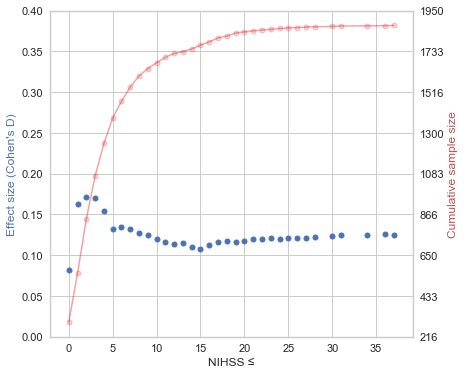

In [104]:
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mtick

sns.set(rc={'figure.figsize':(6.5,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=NIHSS_list,y=effect_sizes, s=100, c='b', marker=".")
ax1.set_ylabel("Effect size (Cohen's D)" ,c='b')
ax1.set_ylim(top=0.4,bottom=0)
ax1.tick_params(axis='both', length = 0)


ax2 = ax1.twinx()
ax2.scatter(x=NIHSS_list,y=cum_pop_size,alpha=0.2,marker='.',s=100)
ax2.set_ylabel('Cumulative sample size',c='r')
ax2.yaxis.grid(False)
#ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1871, decimals=None, symbol='%'))
ax2.yaxis.set_major_locator(mtick.LinearLocator(9))
ax2.tick_params(axis='both', length = 0)


a_BSpline = make_interp_spline(NIHSS_list, cum_pop_size)

y_new = a_BSpline(NIHSS_list)
ax3 = plt.plot(NIHSS_list,y_new,'-',alpha=0.4)

ax1.set_xlabel('NIHSS ≤')


#plt.title('Effect size of RBA on good outcome per NIHSS level')
plt.savefig('figure4_effectsize.tiff',dpi=300)

In [105]:
#Very good outcome = mRS 0 1


from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

x = outcome_df.drop('Good_outcome',axis=1)
y= outcome_df.Good_outcome

x_sub = x.filter(['Age', 'Female_sex', 'HTN', 'DM', 'AF', 'CAD',
       'Smoking_ever', 'Prior_stroke', "Brain_volume",'WMH_volume',
       'Age_adjusted_residual', 'NIHSS'])


X_train, X_test, y_train, y_test = train_test_split(x_sub,y,stratify=y,test_size=.1,random_state=40)
    
    
    
scaler = StandardScaler()


X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
clf = LogisticRegression()

selector = RFECV(clf, step=1, cv=5)

selector = selector.fit(X_train_std, y_train)


X_train_selected=pd.DataFrame(selector.transform(X_train),columns=X_train.columns[selector.get_support()])

In [106]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


x = outcome_df.drop('Good_outcome',axis=1)
y= outcome_df.Good_outcome

x_sub = x.filter(['Age', 'Female_sex', 'HTN', 'DM', 'AF', 'CAD',
       'Smoking_ever', 'Prior_stroke', "Brain_volume",'WMH_volume',
       'Age_adjusted_residual', 'NIHSS',
                  #'BV_Age_adjusted_residual'
                 ])

scaler = StandardScaler()


x_sub_std = scaler.fit_transform(x_sub)
clf = LogisticRegression()

selector = RFECV(clf, step=1, cv=5)
pipe = make_pipeline(scaler,selector,clf)

selector = selector.fit(x_sub_std, y)

In [107]:
x_selected=pd.DataFrame(selector.transform(x_sub),columns=x_sub.columns[selector.get_support()])

In [108]:
x_selected

,Age,Age_adjusted_residual,NIHSS
0,60.0,-8.019381,3.0
1,88.0,9.624184,3.0
2,46.0,9.781124,6.0
3,78.0,-2.752686,5.0
4,43.0,-7.582226,3.0
...,...,...,...
1866,85.9,11.889935,0.0
1867,80.3,-8.234568,1.0
1868,67.1,-9.923388,0.0
1869,72.5,-9.959243,0.0


In [109]:
from statsmodels.formula.api import logit
# again, invoke statsmodel's formula API using the below syntax
residual_model = logit("""Good_outcome ~   Age + Age_adjusted_residual + Female_sex + WMH_volume + Prior_stroke
                                            + NIHSS

                                            
                                            
                                            """, data=outcome_df).fit()
# summarize our model
model_summary = residual_model.summary()
model_summary

#Good_outcome ~   Age + Age_adjusted_residual
#                                            + Female_sex
##                                            + Prior_stroke
 #                                           + NIHSS
 #                                           + DM
 #                                           + HTN
 #                                           + DM
 #                                           + CAD
 #                                           + WMH_volume
 #                                           + Brain_volume

Optimization terminated successfully.
         Current function value: 0.498148
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Good_outcome   No. Observations:                 1871
Model:                          Logit   Df Residuals:                     1864
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1534
Time:                        12:07:27   Log-Likelihood:                -932.04
converged:                       True   LL-Null:                       -1100.9
Covariance Type:            nonrobust   LLR p-value:                 6.487e-70
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.4574      0.330     13.496      0.000       3.810       5.105
Age                      -0.0341      0.005     -7.378      0.000      -0.043      -0.025
Age_adjusted_residual    -0.0375      0.007     -5.240      0.000      -0.052      -0.023
Female_sex               -0.4566      0.116     -3.941      0.000      -0.684      -0.230
WMH_volume               -0.0154      0.005     -2.942      0.003      -0.026      -0.005
Prior_stroke             -0.5504      0.152     -3.619      0.000      -0.848      -0.252
NIHSS                    -0.1441      0.012    -12.295      0.000      -0.167      -0.121
=========================================================================================
"""

In [110]:
params = residual_model.params
conf = residual_model.conf_int(alpha=0.05)
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))
np.exp(conf).to_csv('Odds_ratio_RFECV_logreg.csv')

                              5%         95%  Odds Ratio
Intercept              45.155777  164.802393   86.265753
Age                     0.957726    0.975249    0.966448
Age_adjusted_residual   0.949795    0.976808    0.963206
Female_sex              0.504756    0.794892    0.633425
WMH_volume              0.974743    0.994889    0.984765
Prior_stroke            0.428065    0.777012    0.576725
NIHSS                   0.846140    0.885919    0.865801


In [111]:
#standardized

outcome_logit=outcome_df.filter(['Good_outcome','Age','Age_adjusted_residual','NIHSS', 'WMH_volume','Female_sex','Prior_stroke'])
outcome_logit['WMH_volume']=stats.zscore(outcome_logit['WMH_volume'])
outcome_logit['Age']=stats.zscore(outcome_logit['Age'])
outcome_logit['Age_adjusted_residual']=stats.zscore(outcome_logit['Age_adjusted_residual'])
outcome_logit['NIHSS']=stats.zscore(outcome_logit['NIHSS'])


stdz_model = logit("""Good_outcome ~   Age + Age_adjusted_residual + Female_sex + WMH_volume + Prior_stroke
                                            + NIHSS

                                            
                                            
                                            """, data=outcome_logit).fit()
# summarize our model
model_summary = stdz_model.summary()
model_summary



Optimization terminated successfully.
         Current function value: 0.498148
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Good_outcome   No. Observations:                 1871
Model:                          Logit   Df Residuals:                     1864
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1534
Time:                        12:07:27   Log-Likelihood:                -932.04
converged:                       True   LL-Null:                       -1100.9
Covariance Type:            nonrobust   LLR p-value:                 6.487e-70
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.4264      0.087     16.353      0.000       1.255       1.597
Age                      -0.4764      0.065     -7.378      0.000      -0.603      -0.350
Age_adjusted_residual    -0.3066      0.059     -5.240      0.000      -0.421      -0.192
Female_sex               -0.4566      0.116     -3.941      0.000      -0.684      -0.230
WMH_volume               -0.1603      0.055     -2.942      0.003      -0.267      -0.054
Prior_stroke             -0.5504      0.152     -3.619      0.000      -0.848      -0.252
NIHSS                    -0.7396      0.060    -12.295      0.000      -0.858      -0.622
=========================================================================================
"""

In [112]:
params = stdz_model.params
conf = stdz_model.conf_int(alpha=0.05)
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))
np.exp(conf).to_csv('std_Odds_ratio_RFECV_logreg.csv')

                             5%       95%  Odds Ratio
Intercept              3.509469  4.940103    4.163789
Age                    0.547215  0.704808    0.621032
Age_adjusted_residual  0.656233  0.825390    0.735967
Female_sex             0.504756  0.794892    0.633425
WMH_volume             0.765544  0.947896    0.851855
Prior_stroke           0.428065  0.777012    0.576725
NIHSS                  0.424217  0.537023    0.477299


In [113]:
conf.loc['Age']

5%           -0.602914
95%          -0.349830
Odds Ratio   -0.476372
Name: Age, dtype: float64

In [114]:
#univariate log reg

effect_sizes_univ_RBA = pd.DataFrame(columns=['5%', '95%', 'OR'])
NIHSS_list_univ=list()
cum_pop_size_multiv = list()



for NIHSS_level in outcome_df_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    if NIHSS_level == 0:
        print('NIHSS<ou={}'.format(NIHSS_level))
        outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
        print(outcome_df_effect_size_infold.shape[0])
        cum_pop_size_multiv.append(outcome_df_effect_size_infold.shape[0])
        print(outcome_df_effect_size_infold.describe())

        outcome_df_effect_size_infold['Age_adjusted_residual']=stats.zscore(outcome_df_effect_size_infold['Age_adjusted_residual'])
        RBA_model_NIHSS = logit("""Good_outcome ~  Age_adjusted_residual
  
                                                    """, data=outcome_df_effect_size_infold).fit()
        print(RBA_model_NIHSS.summary())
        params = RBA_model_NIHSS.params
        conf = RBA_model_NIHSS.conf_int(alpha=0.05)
        conf['coef'] = params
        conf.columns = ['5%', '95%', 'OR']

        
        effect_sizes_univ_RBA=effect_sizes_univ_RBA.append(conf.loc['Age_adjusted_residual'])

        NIHSS_list_univ.append(NIHSS_level)
    else:
        print('NIHSS<ou={}'.format(NIHSS_level))
        outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
        print(outcome_df_effect_size_infold.shape[0])
        cum_pop_size_multiv.append(outcome_df_effect_size_infold.shape[0])
        print(outcome_df_effect_size_infold.describe())

        outcome_df_effect_size_infold['Age_adjusted_residual']=stats.zscore(outcome_df_effect_size_infold['Age_adjusted_residual'])



        RBA_model_NIHSS = logit("""Good_outcome ~   Age_adjusted_residual
                                           
                                                    """, data=outcome_df_effect_size_infold).fit()
        print(RBA_model_NIHSS.summary())
        params = RBA_model_NIHSS.params
        conf = RBA_model_NIHSS.conf_int(alpha=0.05)
        conf['coef'] = params
        conf.columns = ['5%', '95%', 'OR']
        effect_sizes_univ_RBA=effect_sizes_univ_RBA.append(conf.loc['Age_adjusted_residual'])

        NIHSS_list_univ.append(NIHSS_level)

effect_sizes_univ_RBA.index=NIHSS_list_univ
effect_sizes_univ_RBA=np.exp(effect_sizes_univ_RBA)



NIHSS<ou=0
295
       NIHSS  Good_outcome  Age_adjusted_residual
count  295.0    295.000000             295.000000
mean     0.0      0.827119               0.308873
std      0.0      0.378787               8.972174
min      0.0      0.000000             -24.770218
25%      0.0      1.000000              -5.926744
50%      0.0      1.000000               0.866620
75%      0.0      1.000000               6.045935
max      0.0      1.000000              25.925680
Optimization terminated successfully.
         Current function value: 0.446787
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                  295
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.02962
Time:                        12:07:27 

NIHSS<ou=5
1379
             NIHSS  Good_outcome  Age_adjusted_residual
count  1379.000000   1379.000000            1379.000000
mean      2.091371      0.799855               0.028528
std       1.606971      0.400254               8.261524
min       0.000000      0.000000             -24.770218
25%       1.000000      1.000000              -5.543144
50%       2.000000      1.000000              -0.099823
75%       3.000000      1.000000               5.327887
max       5.000000      1.000000              28.008970
Optimization terminated successfully.
         Current function value: 0.486377
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1379
Model:                          Logit   Df Residuals:                     1377
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:        

NIHSS<ou=10
1673
             NIHSS  Good_outcome  Age_adjusted_residual
count  1673.000000   1673.000000            1673.000000
mean      3.038255      0.766886               0.073830
std       2.577687      0.422941               8.162848
min       0.000000      0.000000             -24.770218
25%       1.000000      1.000000              -5.478730
50%       2.000000      1.000000              -0.065879
75%       5.000000      1.000000               5.393317
max      10.000000      1.000000              28.008970
Optimization terminated successfully.
         Current function value: 0.531127
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1673
Model:                          Logit   Df Residuals:                     1671
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:       

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1766
Model:                          Logit   Df Residuals:                     1764
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.02179
Time:                        12:07:27   Log-Likelihood:                -973.06
converged:                       True   LL-Null:                       -994.73
Covariance Type:            nonrobust   LLR p-value:                 4.591e-11
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1262      0.056     19.963      0.000       1.016       1.237
Age_adjusted_residual    -0.3646      0.056     -6.487      0.000      -0.475      -0.254
NIHSS<ou

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1837
Model:                          Logit   Df Residuals:                     1835
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.01557
Time:                        12:07:27   Log-Likelihood:                -1049.8
converged:                       True   LL-Null:                       -1066.4
Covariance Type:            nonrobust   LLR p-value:                 8.293e-09
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0296      0.054     19.173      0.000       0.924       1.135
Age_adjusted_residual    -0.3057      0.054     -5.702      0.000      -0.411      -0.201
NIHSS<ou

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1860
Model:                          Logit   Df Residuals:                     1858
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.01413
Time:                        12:07:28   Log-Likelihood:                -1074.2
converged:                       True   LL-Null:                       -1089.6
Covariance Type:            nonrobust   LLR p-value:                 2.868e-08
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0003      0.053     18.897      0.000       0.897       1.104
Age_adjusted_residual    -0.2905      0.053     -5.497      0.000      -0.394      -0.187
NIHSS<ou

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1870
Model:                          Logit   Df Residuals:                     1868
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.01286
Time:                        12:07:28   Log-Likelihood:                -1086.4
converged:                       True   LL-Null:                       -1100.6
Covariance Type:            nonrobust   LLR p-value:                 1.034e-07
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9842      0.053     18.733      0.000       0.881       1.087
Age_adjusted_residual    -0.2767      0.052     -5.276      0.000      -0.379      -0.174
NIHSS<ou

In [115]:
round(effect_sizes_univ_RBA,2)

,5%,95%,OR
0,0.47,0.88,0.64
1,0.47,0.76,0.59
2,0.56,0.81,0.67
3,0.56,0.77,0.66
4,0.59,0.79,0.68
5,0.57,0.75,0.65
6,0.58,0.75,0.66
7,0.59,0.76,0.67
8,0.61,0.78,0.69
9,0.61,0.77,0.69


/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 0, 'NIHSS ≤')

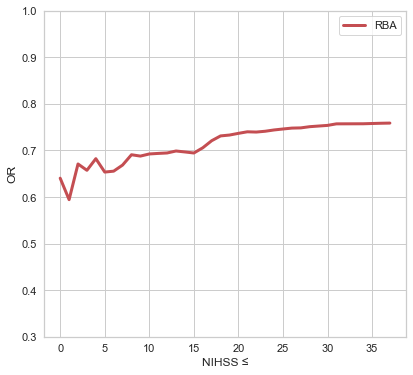

In [116]:
#sns.set(rc={'figure.figsize':(6.5,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig = plt.figure()

ax_RBA = fig.add_subplot(111)
ax_RBA.set_ylabel("OR" ,c='k')
ax_RBA.set_ylim(top=1,bottom=0.3)
ax_RBA.tick_params(axis='both', length = 0)
#ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['5%'], c='b',linewidth=1, label='RBA',alpha=0.2)
#ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['95%'], c='b',linewidth=1, label='RBA',alpha=0.2)
ax_RBA.plot(NIHSS_list_univ,effect_sizes_univ_RBA['OR'], c='r',linewidth=3, label='RBA')
#ax_RBA.fill_between(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['5%'], effect_sizes_multiv_RBA_OR['95%'], alpha=0.3, color='grey')

ax_RBA.legend(frameon=True)
ax_RBA.set_xlabel('NIHSS ≤')

In [117]:
# Multivariate effect size per NIHSS

In [118]:
#standardized

In [119]:
outcome_df_effect_size = outcome_df.filter(['NIHSS','Good_outcome','Age_adjusted_residual','Age'],axis=1).dropna()
outcome_df_effect_size.sort_values(by='NIHSS')
NIHSS_list_multiv=list()
effect_sizes_multiv_RBA = pd.DataFrame(columns=['5%', '95%', 'coef'])
effect_sizes_multiv_age = pd.DataFrame(columns=['5%', '95%', 'coef'])
effect_sizes_multiv_priorstroke = pd.DataFrame(columns=['5%', '95%', 'coef'])
effect_sizes_multiv_NIHSS = pd.DataFrame(columns=['5%', '95%', 'coef'])


cum_pop_size_multiv = list()
for NIHSS_level in outcome_df_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    if NIHSS_level == 0:
        print('NIHSS<ou={}'.format(NIHSS_level))
        outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
        print(outcome_df_effect_size_infold.shape[0])
        cum_pop_size_multiv.append(outcome_df_effect_size_infold.shape[0])
        print(outcome_df_effect_size_infold.describe())

        outcome_df_effect_size_infold['Age_adjusted_residual']=stats.zscore(outcome_df_effect_size_infold['Age_adjusted_residual'])
        outcome_df_effect_size_infold['Age']=stats.zscore(outcome_df_effect_size_infold['Age'])
        RBA_model_NIHSS = logit("""Good_outcome ~   Age + Age_adjusted_residual
                                                    """, data=outcome_df_effect_size_infold).fit()
        print(RBA_model_NIHSS.summary())
        params = RBA_model_NIHSS.params
        conf = RBA_model_NIHSS.conf_int(alpha=0.05)
        conf['coef'] = params
        conf.columns = ['5%', '95%', 'coef']

        
        effect_sizes_multiv_RBA=effect_sizes_multiv_RBA.append(conf.loc['Age_adjusted_residual'])
        effect_sizes_multiv_age=effect_sizes_multiv_age.append(conf.loc['Age'])
        effect_sizes_multiv_NIHSS=effect_sizes_multiv_NIHSS.append(pd.Series(), ignore_index=True)

        NIHSS_list_multiv.append(NIHSS_level)
    else:
        print('NIHSS<ou={}'.format(NIHSS_level))
        outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
        print(outcome_df_effect_size_infold.shape[0])
        cum_pop_size_multiv.append(outcome_df_effect_size_infold.shape[0])
        print(outcome_df_effect_size_infold.describe())

        outcome_df_effect_size_infold['Age_adjusted_residual']=stats.zscore(outcome_df_effect_size_infold['Age_adjusted_residual'])
        outcome_df_effect_size_infold['Age']=stats.zscore(outcome_df_effect_size_infold['Age'])

        outcome_df_effect_size_infold['NIHSS']=stats.zscore(outcome_df_effect_size_infold['NIHSS'])


        RBA_model_NIHSS = logit("""Good_outcome ~   Age + Age_adjusted_residual
                                                    + NIHSS
                                                    """, data=outcome_df_effect_size_infold).fit()
        print(RBA_model_NIHSS.summary())
        params = RBA_model_NIHSS.params
        conf = RBA_model_NIHSS.conf_int(alpha=0.05)
        conf['coef'] = params
        conf.columns = ['5%', '95%', 'coef']
        effect_sizes_multiv_RBA=effect_sizes_multiv_RBA.append(conf.loc['Age_adjusted_residual'])
        effect_sizes_multiv_age=effect_sizes_multiv_age.append(conf.loc['Age'])
        effect_sizes_multiv_NIHSS=effect_sizes_multiv_NIHSS.append(conf.loc['NIHSS'])
        NIHSS_list_multiv.append(NIHSS_level)



    

NIHSS<ou=0
295
       NIHSS  Good_outcome  Age_adjusted_residual         Age
count  295.0    295.000000             295.000000  295.000000
mean     0.0      0.827119               0.308873   65.112881
std      0.0      0.378787               8.972174   15.052619
min      0.0      0.000000             -24.770218   24.000000
25%      0.0      1.000000              -5.926744   55.000000
50%      0.0      1.000000               0.866620   66.500000
75%      0.0      1.000000               6.045935   76.750000
max      0.0      1.000000              25.925680   93.500000
Optimization terminated successfully.
         Current function value: 0.396860
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                  295
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            2
Date:    

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


1379
             NIHSS  Good_outcome  Age_adjusted_residual         Age
count  1379.000000   1379.000000            1379.000000  1379.00000
mean      2.091371      0.799855               0.028528    66.04351
std       1.606971      0.400254               8.261524    13.96995
min       0.000000      0.000000             -24.770218    18.00000
25%       1.000000      1.000000              -5.543144    56.55000
50%       2.000000      1.000000              -0.099823    67.80000
75%       3.000000      1.000000               5.327887    76.85000
max       5.000000      1.000000              28.008970    93.80000
Optimization terminated successfully.
         Current function value: 0.459619
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1379
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df M

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1642
Model:                          Logit   Df Residuals:                     1638
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.09243
Time:                        12:07:29   Log-Likelihood:                -797.39
converged:                       True   LL-Null:                       -878.60
Covariance Type:            nonrobust   LLR p-value:                 5.520e-35
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3878      0.067     20.701      0.000       1.256       1.519
Age                      -0.5655      0.070     -8.134      0.000      -0.702      -0.429
Age_adju

             NIHSS  Good_outcome  Age_adjusted_residual          Age
count  1746.000000   1746.000000            1746.000000  1746.000000
mean      3.418099      0.750286               0.112674    65.984364
std       3.119105      0.432971               8.176336    13.910075
min       0.000000      0.000000             -24.770218    18.000000
25%       1.000000      1.000000              -5.468295    56.725000
50%       3.000000      1.000000              -0.045912    67.300000
75%       5.000000      1.000000               5.396432    76.700000
max      14.000000      1.000000              28.008970    93.800000
Optimization terminated successfully.
         Current function value: 0.494084
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1746
Model:                          Logit   Df Residuals:                     1742
Method:                           MLE   

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1814
Model:                          Logit   Df Residuals:                     1810
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1231
Time:                        12:07:29   Log-Likelihood:                -913.69
converged:                       True   LL-Null:                       -1042.0
Covariance Type:            nonrobust   LLR p-value:                 2.444e-55
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1994      0.061     19.660      0.000       1.080       1.319
Age                      -0.5458      0.064     -8.594      0.000      -0.670      -0.421
Age_adju

Optimization terminated successfully.
         Current function value: 0.503903
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1850
Model:                          Logit   Df Residuals:                     1846
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1365
Time:                        12:07:29   Log-Likelihood:                -932.22
converged:                       True   LL-Null:                       -1079.5
Covariance Type:            nonrobust   LLR p-value:                 1.459e-63
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1554      0.060     19.215      0.000       1.038       1.

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1862
Model:                          Logit   Df Residuals:                     1858
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1384
Time:                        12:07:29   Log-Likelihood:                -941.04
converged:                       True   LL-Null:                       -1092.2
Covariance Type:            nonrobust   LLR p-value:                 3.135e-65
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1318      0.060     19.015      0.000       1.015       1.248
Age                      -0.5491      0.062     -8.792      0.000      -0.672      -0.427
Age_adju

Optimization terminated successfully.
         Current function value: 0.506068
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1870
Model:                          Logit   Df Residuals:                     1866
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1402
Time:                        12:07:30   Log-Likelihood:                -946.35
converged:                       True   LL-Null:                       -1100.6
Covariance Type:            nonrobust   LLR p-value:                 1.433e-66
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1170      0.059     18.866      0.000       1.001       1.

In [120]:
effect_sizes_multiv_RBA.index=NIHSS_list_multiv
effect_sizes_multiv_age.index=NIHSS_list_multiv
effect_sizes_multiv_NIHSS.index=NIHSS_list_multiv

effect_sizes_multiv_RBA_OR=np.exp(effect_sizes_multiv_RBA)
effect_sizes_multiv_age_OR=np.exp(effect_sizes_multiv_age)
effect_sizes_multiv_NIHSS_OR=np.exp(effect_sizes_multiv_NIHSS)

In [121]:
round(effect_sizes_multiv_RBA_OR,2)


,5%,95%,coef
0,0.46,0.88,0.64
1,0.47,0.76,0.60
2,0.56,0.82,0.68
3,0.56,0.77,0.66
4,0.59,0.80,0.69
5,0.58,0.77,0.67
6,0.58,0.76,0.66
7,0.59,0.77,0.68
8,0.62,0.79,0.70
9,0.62,0.79,0.70


/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a uniq

Text(0.5, 0, 'NIHSS ≤')

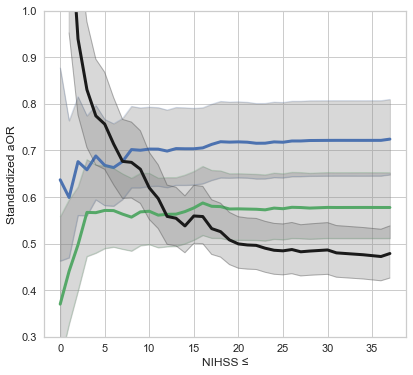

In [122]:
sns.set(rc={'figure.figsize':(6.5,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig = plt.figure()

ax_RBA = fig.add_subplot(111)
ax_RBA.set_ylabel("Standardized aOR" ,c='k')
ax_RBA.set_ylim(top=1,bottom=0.3)
ax_RBA.tick_params(axis='both', length = 0)
ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['5%'], c='b',linewidth=1, label='RBA',alpha=0.2)
ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['95%'], c='b',linewidth=1, label='RBA',alpha=0.2)
ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['coef'], c='b',linewidth=3, label='RBA')
ax_RBA.fill_between(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['5%'], effect_sizes_multiv_RBA_OR['95%'], alpha=0.3, color='grey')

ax_age = fig.add_subplot(111)
ax_age.plot(NIHSS_list_multiv,effect_sizes_multiv_age_OR['5%'], c='g',linewidth=1, label='Age',alpha=0.2)
ax_age.plot(NIHSS_list_multiv,effect_sizes_multiv_age_OR['95%'], c='g',linewidth=1, label='Age',alpha=0.2)
ax_age.plot(NIHSS_list_multiv,effect_sizes_multiv_age_OR['coef'], c='g',linewidth=3, label='Age')
ax_age.fill_between(NIHSS_list_multiv,effect_sizes_multiv_age_OR['5%'], effect_sizes_multiv_age_OR['95%'], alpha=0.3, color='grey')

ax_NIHSS = fig.add_subplot(111)
ax_NIHSS.plot(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['5%'], c='k',linewidth=1, label='NIHSS',alpha=0.2)
ax_NIHSS.plot(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['95%'], c='k',linewidth=1, label='NIHSS',alpha=0.2)
ax_NIHSS.plot(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['coef'], c='k',linewidth=3, label='NIHSS')
ax_NIHSS.fill_between(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['5%'], effect_sizes_multiv_NIHSS_OR['95%'], alpha=0.3, color='grey')

#fig.legend(frameon=True)
ax_RBA.set_xlabel('NIHSS ≤')

In [123]:
effect_sizes_multiv_NIHSS_OR.loc[[0]]=np.nan

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


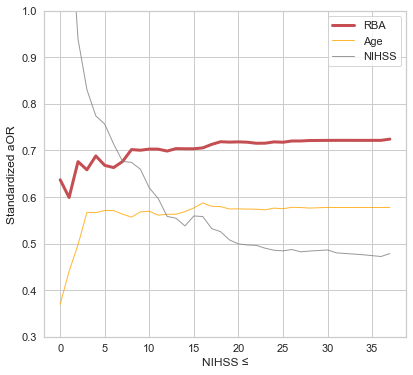

In [124]:
sns.set(rc={'figure.figsize':(6.5,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig = plt.figure()

ax_RBA = fig.add_subplot(111)
ax_RBA.set_ylabel("Standardized aOR" ,c='k')
ax_RBA.set_ylim(top=1,bottom=0.3)
ax_RBA.tick_params(axis='both', length = 0)
#ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['5%'], c='b',linewidth=1, label='RBA',alpha=0.2)
#ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['95%'], c='b',linewidth=1, label='RBA',alpha=0.2)
ax_RBA.plot(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['coef'], c='r',linewidth=3, label='RBA')
#ax_RBA.fill_between(NIHSS_list_multiv,effect_sizes_multiv_RBA_OR['5%'], effect_sizes_multiv_RBA_OR['95%'], alpha=0.3, color='grey')

ax_age = fig.add_subplot(111)
#ax_age.plot(NIHSS_list_multiv,effect_sizes_multiv_age_OR['5%'], c='g',linewidth=1, label='Age',alpha=0.2)
#ax_age.plot(NIHSS_list_multiv,effect_sizes_multiv_age_OR['95%'], c='g',linewidth=1, label='Age',alpha=0.2)
ax_age.plot(NIHSS_list_multiv,effect_sizes_multiv_age_OR['coef'], c='orange',linewidth=1, label='Age',alpha=0.8)
#ax_age.fill_between(NIHSS_list_multiv,effect_sizes_multiv_age_OR['5%'], effect_sizes_multiv_age_OR['95%'], alpha=0.3, color='grey')

ax_NIHSS = fig.add_subplot(111)
#ax_NIHSS.plot(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['5%'], c='k',linewidth=1, label='NIHSS',alpha=0.2)
#ax_NIHSS.plot(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['95%'], c='k',linewidth=1, label='NIHSS',alpha=0.2)
ax_NIHSS.plot(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['coef'], c='grey',linewidth=1, label='NIHSS',alpha=0.8)
#ax_NIHSS.fill_between(NIHSS_list_multiv,effect_sizes_multiv_NIHSS_OR['5%'], effect_sizes_multiv_NIHSS_OR['95%'], alpha=0.3, color='grey')

ax_NIHSS.legend(frameon=True)
ax_RBA.set_xlabel('NIHSS ≤')

plt.savefig('aOR_byNIHSS.tiff',dpi=300)

In [125]:
#unstandardized effect sizes

In [126]:
outcome_df_effect_size = outcome_df.filter(['NIHSS','Good_outcome','Age_adjusted_residual','Age'],axis=1).dropna()
outcome_df_effect_size.sort_values(by='NIHSS')
NIHSS_list_multiv=list()
effect_sizes_multiv_RBA = list()
effect_sizes_multiv_age = list()
effect_sizes_multiv_NIHSS = list()


cum_pop_size_multiv = list()
for NIHSS_level in outcome_df_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    if NIHSS_level == 0:
        print('NIHSS<ou={}'.format(NIHSS_level))
        outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
        print(outcome_df_effect_size_infold.shape[0])
        cum_pop_size_multiv.append(outcome_df_effect_size_infold.shape[0])
        print(outcome_df_effect_size_infold.describe())

        outcome_df_effect_size_infold['Age_adjusted_residual']=stats.zscore(outcome_df_effect_size_infold['Age_adjusted_residual'])
        outcome_df_effect_size_infold['Age']=stats.zscore(outcome_df_effect_size_infold['Age'])
        RBA_model_NIHSS = logit("""Good_outcome ~   Age + Age_adjusted_residual

                                                    """, data=outcome_df_effect_size_infold).fit()
        print(RBA_model_NIHSS.summary())
        effect_sizes_multiv_RBA.append(RBA_model_NIHSS.params.Age_adjusted_residual)
        effect_sizes_multiv_age.append(RBA_model_NIHSS.params.Age)
        effect_sizes_multiv_NIHSS.append(0)

        NIHSS_list_multiv.append(NIHSS_level)
    else:
        print('NIHSS<ou={}'.format(NIHSS_level))
        outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
        print(outcome_df_effect_size_infold.shape[0])
        cum_pop_size_multiv.append(outcome_df_effect_size_infold.shape[0])
        print(outcome_df_effect_size_infold.describe())

        RBA_model_NIHSS = logit("""Good_outcome ~   Age + Age_adjusted_residual
                                                    +  NIHSS
                                                    """, data=outcome_df_effect_size_infold).fit()
        print(RBA_model_NIHSS.summary())
        effect_sizes_multiv_RBA.append(RBA_model_NIHSS.params.Age_adjusted_residual)
        effect_sizes_multiv_age.append(RBA_model_NIHSS.params.Age)
        effect_sizes_multiv_NIHSS.append(RBA_model_NIHSS.params.NIHSS)
        NIHSS_list_multiv.append(NIHSS_level)



    

NIHSS<ou=0
295
       NIHSS  Good_outcome  Age_adjusted_residual         Age
count  295.0    295.000000             295.000000  295.000000
mean     0.0      0.827119               0.308873   65.112881
std      0.0      0.378787               8.972174   15.052619
min      0.0      0.000000             -24.770218   24.000000
25%      0.0      1.000000              -5.926744   55.000000
50%      0.0      1.000000               0.866620   66.500000
75%      0.0      1.000000               6.045935   76.750000
max      0.0      1.000000              25.925680   93.500000
Optimization terminated successfully.
         Current function value: 0.396860
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                  295
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            2
Date:    

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1379
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.08187
Time:                        12:07:31   Log-Likelihood:                -633.81
converged:                       True   LL-Null:                       -690.33
Covariance Type:            nonrobust   LLR p-value:                 2.437e-24
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.5576      0.418     10.895      0.000       3.738       5.377
Age                      -0.0401      0.006     -7.117      0.000      -0.051      -0.029
Age_adju

             NIHSS  Good_outcome  Age_adjusted_residual          Age
count  1702.000000   1702.000000            1702.000000  1702.000000
mean      3.173913      0.762045               0.087815    66.017274
std       2.755628      0.425957               8.175019    13.886422
min       0.000000      0.000000             -24.770218    18.000000
25%       1.000000      1.000000              -5.498078    56.625000
50%       3.000000      1.000000              -0.060758    67.350000
75%       5.000000      1.000000               5.394274    76.800000
max      11.000000      1.000000              28.008970    93.800000
Optimization terminated successfully.
         Current function value: 0.490672
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1702
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1784
Model:                          Logit   Df Residuals:                     1780
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1135
Time:                        12:07:31   Log-Likelihood:                -896.09
converged:                       True   LL-Null:                       -1010.8
Covariance Type:            nonrobust   LLR p-value:                 1.812e-49
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.3781      0.339     12.910      0.000       3.713       5.043
Age                      -0.0383      0.005     -8.304      0.000      -0.047      -0.029
Age_adju

             NIHSS  Good_outcome  Age_adjusted_residual          Age
count  1847.000000   1847.000000            1847.000000  1847.000000
mean      4.186789      0.730915               0.032217    66.064754
std       4.431650      0.443604               8.199368    13.940527
min       0.000000      0.000000             -26.879324    18.000000
25%       1.000000      0.000000              -5.543144    56.750000
50%       3.000000      1.000000              -0.111109    67.400000
75%       6.000000      1.000000               5.292531    76.800000
max      22.000000      1.000000              28.008970    93.800000
Optimization terminated successfully.
         Current function value: 0.504607
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1847
Model:                          Logit   Df Residuals:                     1843
Method:                           MLE   

                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1862
Model:                          Logit   Df Residuals:                     1858
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                  0.1384
Time:                        12:07:32   Log-Likelihood:                -941.04
converged:                       True   LL-Null:                       -1092.2
Covariance Type:            nonrobust   LLR p-value:                 3.135e-65
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.3991      0.327     13.438      0.000       3.757       5.041
Age                      -0.0393      0.004     -8.792      0.000      -0.048      -0.031
Age_adju

             NIHSS  Good_outcome  Age_adjusted_residual          Age
count  1871.000000   1871.000000           1.871000e+03  1871.000000
mean      4.483164      0.724746          -5.347109e-15    66.180866
std       5.133992      0.446762           8.180105e+00    13.962221
min       0.000000      0.000000          -2.687932e+01    18.000000
25%       1.000000      0.000000          -5.556416e+00    57.000000
50%       3.000000      1.000000          -1.457240e-01    67.700000
75%       6.000000      1.000000           5.245913e+00    77.000000
max      37.000000      1.000000           2.800897e+01    93.800000
Optimization terminated successfully.
         Current function value: 0.507696
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Good_outcome   No. Observations:                 1871
Model:                          Logit   Df Residuals:                     1867
Method:                           MLE   

In [127]:
multiv_effectsize=pd.DataFrame([effect_sizes_multiv_RBA,effect_sizes_multiv_age,effect_sizes_multiv_NIHSS]).T
multiv_effectsize.columns=['RBA','Age','NIHSS']
multiv_effectsize.index=[NIHSS_list_multiv]
multiv_effectsize.index.names = ["NIHSS"]
multiv_effectsize_OR=np.exp(multiv_effectsize)


/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 0, 'NIHSS ≤')

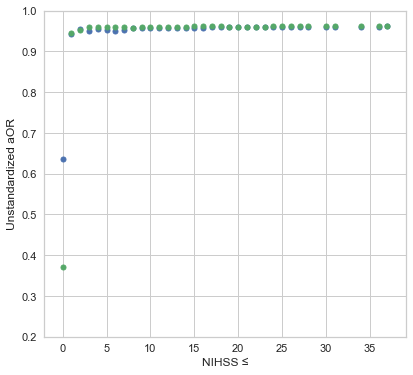

In [128]:
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mtick

sns.set(rc={'figure.figsize':(6.5,6)})
sns.set_palette('Set1')
sns.set_style('whitegrid')

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=NIHSS_list_multiv,y=multiv_effectsize_OR.RBA, s=100, c='b', marker=".")
ax1.set_ylabel("Unstandardized aOR" ,c='k')
ax1.set_ylim(top=1,bottom=0.2)
ax1.tick_params(axis='both', length = 0)

ax3 = fig.add_subplot(111)
ax3.scatter(x=NIHSS_list_multiv,y=multiv_effectsize_OR.Age, s=100, c='g', marker=".")

#ax4 = fig.add_subplot(111)
#ax4.scatter(x=NIHSS_list_multiv,y=test_OR.Prior_stroke, s=100, c='k', marker=".")

#ax5 = fig.add_subplot(111)
#ax5.scatter(x=NIHSS_list_multiv,y=test_OR.NIHSS, s=100, c='y', marker=".")

#ax2 = ax1.twinx()
#ax2.scatter(x=NIHSS_list_multiv,y=cum_pop_size_multiv,alpha=0.2,marker='.',s=100)
#ax2.set_ylabel('Cumulative sample size',c='r')
#ax2.yaxis.grid(False)
#ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1871, decimals=None, symbol='%'))
#ax2.yaxis.set_major_locator(mtick.LinearLocator(9))
#ax2.tick_params(axis='both', length = 0)




#a_BSpline = make_interp_spline(NIHSS_list_multiv, cum_pop_size_multiv)
#y_new = a_BSpline(NIHSS_list_multiv)
#ax6 = plt.plot(NIHSS_list_multiv,y_new,'-',alpha=0.4)

ax1.set_xlabel('NIHSS ≤')


#plt.title('Effect size of RBA on good outcome per NIHSS level')


In [129]:
# Check predictors of RBA

In [130]:
results_df['log_WMH']=np.log(results_df.WMH_volume)

In [131]:
stats.pearsonr(results_df.log_WMH,results_df.Age_adjusted_residual)

(0.23771562745632832, 8.273592592023041e-31)

In [132]:
stats.pearsonr(results_df.Ventricle_volume,results_df.Age_adjusted_residual)

(0.29486391748627055, 3.307714750032543e-47)

In [133]:
stats.pearsonr(test_results_df.Age,test_results_df.Age_adjusted_residual)

(-3.097159030976404e-16, 1.0000000000002713)

In [134]:
test_results_df['True']

ID
304085501     60.0
304985271     88.0
306862528     46.0
307879933     78.0
308171041     43.0
              ... 
4400001626    85.9
4400001630    80.3
4400001636    67.1
4400001643    72.5
4400001652    63.0
Name: True, Length: 1871, dtype: float64

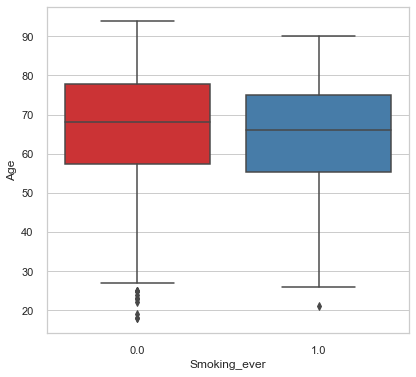

In [137]:
sns.boxplot(data=test_results_df,x="Smoking_ever",y='Age')

In [139]:
import statsmodels.formula.api as smf

x = results_df.drop('Age_adjusted_residual',axis=1)
y= results_df.Age_adjusted_residual

df_sub = results_df.filter(['Age', 'Female_sex', 'HTN', 'DM', 'AF', 'CAD',
       'Smoking_ever', 'Prior_stroke', "Brain_volume",'WMH_volume','Age_adjusted_residual', 'Ventricle_volume'

                  #'BV_Age_adjusted_residual'
                 ])


# again, invoke statsmodel's formula API using the below syntax
RBA_model = smf.ols(formula="""Age_adjusted_residual ~
                    + C(HTN)
                    + C(DM)
                    + C(AF)
                    + C(CAD)
                    + C(Smoking_ever)
                    + C(Prior_stroke)

                    """, data=results_df).fit()
# summarize our model
model_summary = RBA_model.summary()
model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Age_adjusted_residual   R-squared:                       0.044
Model:                               OLS   Adj. R-squared:                  0.042
Method:                    Least Squares   F-statistic:                     17.59
Date:                   Wed, 02 Feb 2022   Prob (F-statistic):           5.28e-20
Time:                           12:08:25   Log-Likelihood:                -7820.3
No. Observations:                   2292   AIC:                         1.565e+04
Df Residuals:                       2285   BIC:                         1.569e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.3207      0.287     -4.596      0.000      -1.884      -0.757
C(HTN)[T.1.0]              0.0659      0.335      0.197      0.844      -0.591       0.722
C(DM)[T.1.0]               0.8306      0.388      2.139      0.033       0.069       1.592
C(AF)[T.1.0]               1.1496      0.486      2.365      0.018       0.197       2.103
C(CAD)[T.1.0]             -0.0386      0.434     -0.089      0.929      -0.891       0.813
C(Smoking_ever)[T.1.0]     1.4035      0.322      4.358      0.000       0.772       2.035
C(Prior_stroke)[T.1.0]     4.0841      0.478      8.540      0.000       3.146       5.022
==============================================================================
Omnibus:                       58.525   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.613
Skew:                          -0.003   Prob(JB):                     2.16e-30
Kurtosis:                       4.196   Cond. No.                         4.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
test_results_df

,Predicted,True,Age,Female_sex,HTN,DM,AF,CAD,Smoking_ever,Prior_stroke,...,WMH_Bvadj,No_csf_brain_vol,Ventricle_volume,Label,Site_name,residual,absolute_error,PredictedAge_adjusted,Age_adjusted_residual,pos_RBA
ID,,,,,,,,,,,,,,,,,,,,,
304085501,51.333248,60.0,60.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.508681,1615.577401,27.100948,1.0,GCNKSS,-8.666752,8.666752,59.352629,-8.019381,1
304985271,82.228644,88.0,88.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,2.749114,1010.080877,30.505361,1.0,GCNKSS,-5.771356,5.771356,72.604461,9.624184,0
306862528,62.507837,46.0,46.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.210480,1274.160717,16.628683,1.0,GCNKSS,16.507837,16.507837,52.726713,9.781124,0
307879933,65.118977,78.0,78.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.773749,1316.037769,61.183696,1.0,GCNKSS,-12.881023,12.881023,67.871663,-2.752686,1
308171041,43.724648,43.0,43.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.220445,1369.707489,14.848993,1.0,GCNKSS,0.724648,0.724648,51.306874,-7.582226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400001626,83.500508,85.9,85.9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.532013,1017.897747,35.828316,1.0,GEISINGER,-2.399492,2.399492,71.610573,11.889935,0
4400001630,60.725639,80.3,80.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.427540,1205.593799,19.330785,1.0,GEISINGER,-19.574361,19.574361,68.960207,-8.234568,1
4400001636,52.789527,67.1,67.1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.344972,1498.701055,23.737860,1.0,GEISINGER,-14.310473,14.310473,62.712915,-9.923388,1


In [141]:
# in test set


x = test_results_df.drop('Age_adjusted_residual',axis=1)
y= test_results_df.Age_adjusted_residual

df_sub = test_results_df.filter(['Age', 'Female_sex', 'HTN', 'DM', 'AF', 'CAD',
       'Smoking_ever', 'Prior_stroke', "Brain_volume",'WMH_volume','Age_adjusted_residual', 'Ventricle_volume'

                  #'BV_Age_adjusted_residual'
                 ])


# again, invoke statsmodel's formula API using the below syntax
RBA_model = smf.ols(formula="""Age_adjusted_residual ~
                    + C(HTN)
                    + C(DM)
                    + C(AF)
                    + C(CAD)
                    + C(Smoking_ever)
                    + C(Prior_stroke)

                    """, data=test_results_df).fit()
# summarize our model
model_summary = RBA_model.summary()
model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Age_adjusted_residual   R-squared:                       0.042
Model:                               OLS   Adj. R-squared:                  0.038
Method:                    Least Squares   F-statistic:                     13.46
Date:                   Wed, 02 Feb 2022   Prob (F-statistic):           5.37e-15
Time:                           12:08:25   Log-Likelihood:                -6546.9
No. Observations:                   1871   AIC:                         1.311e+04
Df Residuals:                       1864   BIC:                         1.315e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4710      0.388     -1.215      0.225      -1.231       0.289
C(HTN)[T.1.0]              0.4947      0.424      1.167      0.243      -0.337       1.326
C(DM)[T.1.0]               0.8121      0.610      1.331      0.183      -0.385       2.009
C(AF)[T.1.0]              -0.0722      0.493     -0.146      0.884      -1.039       0.895
C(CAD)[T.1.0]              1.1946      0.459      2.601      0.009       0.294       2.095
C(Smoking_ever)[T.1.0]    -2.2925      0.431     -5.313      0.000      -3.139      -1.446
C(Prior_stroke)[T.1.0]     2.8817      0.537      5.370      0.000       1.829       3.934
==============================================================================
Omnibus:                        9.196   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.164
Skew:                           0.161   Prob(JB):                       0.0102
Kurtosis:                       3.117   Cond. No.                         4.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# check difference in all mri genie param

In [143]:
#Import data correspond to brain mask atrophic without ventricles
input_MRIGENIE = "mrigenie_master_csv_prepped.csv"
df_MRIGENIE = pd.read_csv(input_MRIGENIE)
df_MRIGENIE_num = df_MRIGENIE._get_numeric_data().set_index('Subject_ID')

print("Number of rows in data =",df_MRIGENIE_num.shape[0])
print("Number of columns in data =",df_MRIGENIE_num.shape[1])
print("\n")
print("**Sample data:**")
df_MRIGENIE_num.head()

Number of rows in data = 6627
Number of columns in data = 161


**Sample data:**


/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,2,7,11,13,14,15,22,26,27,29,30,31,32,33,34,36,38,40,42,43,48,53,67,71,72,75,83,84,88,89,94,99,112,113,114,115,116,118,147,154,157,158,159,160,162,163,164,170,181,196,199,200,209,211,220,221,225,226,227,228) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AF,ANY_Infratentorial_LEFT,ANY_Infratentorial_lesion,ANY_Infratentorial_lesion_RIGHT,ANY_PCA_LEFT,ANY_PCA_RIGHT,ASGC_GWASID,Acute stroke on MRI,Age,Age_adjusted_WMHv_cc,...,Ventricle_volume,Ventricle_volume_cc,WASHU_MASTER_prior_CVA,WMHV,WMH_outlier,WMH_volume,WMHv,WMHv_auto,WMHv_man,Wmh_methods_paper
Subject_ID,,,,,,,,,,,,,,,,,,,,,
702505000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0
702524000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,29.0,0.167547,...,34.492090,NaN,NaN,NaN,0,1.262878,1.262878,1.262878,NaN,1.0
702581000,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,40.0,0.650897,...,39.224518,NaN,NaN,NaN,0,3.398689,3.398689,3.398689,NaN,1.0
702590000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0
702598000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0


In [144]:
df_MRIGENIE_num.Hyperlipidemia.dropna()

Subject_ID
3600000071    1.0
3600000073    1.0
3600000085    0.0
3600000088    1.0
3600000090    1.0
             ... 
3600002137    0.0
3600002142    0.0
3600002155    1.0
3600002158    0.0
3600002159    1.0
Name: Hyperlipidemia, Length: 65, dtype: float64

In [145]:
for col in df_MRIGENIE_num:
    print(col)

AF
ANY_Infratentorial_LEFT
ANY_Infratentorial_lesion
ANY_Infratentorial_lesion_RIGHT
ANY_PCA_LEFT
ANY_PCA_RIGHT
ASGC_GWASID
Acute stroke on MRI
Age
Age_adjusted_WMHv_cc
Age_adjusted_brain_volume_cc
Aneurysm
Anterior_circulation_lesions
Anterior_lesion
Brain_outlier
Brain_volume
Brain_volume_cc
CAD
COMMENTS
DM
DNAextracted
DWI
DWIv
DWIv_auto
DWIv_auto_2
DWIv_man
Day mRS1
Day mRS2
Day mRS3
Day mRS4
Day mRS5
Day mRS6
Day_mRS1
Day_mRS2
Day_mRS3
Day_mRS4
Day_mRS5
Day_mRS6
DiabetesMelitusType2
Dissection
Ectasia
FLAIR
FLAIR_outlier
FetalTypePCALeft
FetalTypePCARight
First_stroke
General_outlier
Genevaid
GenotypeAvailable
HTN
Hyperlipidemia
ICA
ID
ID#
IndividualID
Infarct Location
Infratentorial_infarct_LEFT_territories
Infratentorial_infarct_RIGHT_territories
Infratentorial_infarct_territories
LacunarLeftMCA
LacunarLeftPosterior
LacunarRightMCA
LacunarRightPosterior
LeftACACortical
LeftACADeep
LeftBrainstem
LeftCerebellum
LeftMCACortical
LeftMCADeep
LeftPosteriorCortical
LeftPosteriorDeep
MR

In [146]:
for variable in df_MRIGENIE_num:
    print(variable)
    infold_test = df_MRIGENIE_num[[variable]].join(outcome_df.Age_adjusted_residual).dropna()
    effect_size_varMRIGENIE=cohend(infold_test[[variable]],infold_test.Age_adjusted_residual)
    print(infold_test.shape)
    print(effect_size_varMRIGENIE)
    print(stats.ttest_ind(infold_test[infold_test[variable]==0].Age_adjusted_residual,infold_test[infold_test[variable]==1].Age_adjusted_residual))
    print(stats.spearmanr(infold_test[[variable]],infold_test.Age_adjusted_residual))

    print('-'*50)

AF
(1871, 2)
AF    0.030183
dtype: float64
Ttest_indResult(statistic=-0.9175506521814272, pvalue=0.35897254804568024)
SpearmanrResult(correlation=0.015081616585186797, pvalue=0.5144287176645889)
--------------------------------------------------
ANY_Infratentorial_LEFT
(870, 2)
ANY_Infratentorial_LEFT    0.339402
dtype: float64
Ttest_indResult(statistic=-0.987295771889083, pvalue=0.32377278869066295)
SpearmanrResult(correlation=0.020384893644628758, pvalue=0.5481957730464067)
--------------------------------------------------
ANY_Infratentorial_lesion
(870, 2)
ANY_Infratentorial_lesion    0.354683
dtype: float64
Ttest_indResult(statistic=-0.32200064795222033, pvalue=0.7475297353432384)
SpearmanrResult(correlation=-0.003757421106787876, pvalue=0.9118787897964056)
--------------------------------------------------
ANY_Infratentorial_lesion_RIGHT
(870, 2)
ANY_Infratentorial_lesion_RIGHT    0.339821
dtype: float64
Ttest_indResult(statistic=1.1386470531235569, pvalue=0.2551645542990719)
Spe

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)
--------------------------------------------------
Brain_volume
(1871, 2)
Brain_volume    12.013934
dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)
SpearmanrResult(correlation=-0.19026992131880976, pvalue=1.036093232629883e-16)
--------------------------------------------------
Brain_volume_cc
(0, 2)
Brain_volume_cc   NaN
dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)
--------------------------------------------------
CAD
(1871, 2)
CAD    0.038021
dtype: float64
Ttest_indResult(statistic=-3.5657823638928283, pvalue=0.00037189519497115995)
SpearmanrResult(correlation=0.08243973589739274, pvalue=0.00035748601902470066)
--------------------------------------------------
COMMENTS
(0, 2)
COMMENTS   NaN
dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)
--------------------------------------------------
DM
(1871, 2)
DM    0.019298


(870, 2)
LacunarLeftMCA    0.332294
dtype: float64
Ttest_indResult(statistic=-0.8016185551419135, pvalue=0.4229930301407324)
SpearmanrResult(correlation=0.025070552918124395, pvalue=0.4601936679653582)
--------------------------------------------------
LacunarLeftPosterior
(870, 2)
LacunarLeftPosterior    0.31809
dtype: float64
Ttest_indResult(statistic=-1.2216185291717931, pvalue=0.2221835917019249)
SpearmanrResult(correlation=0.04386412620418395, pvalue=0.19616056426697986)
--------------------------------------------------
LacunarRightMCA
(870, 2)
LacunarRightMCA    0.327279
dtype: float64
Ttest_indResult(statistic=-0.8456076582921652, pvalue=0.3980046888519405)
SpearmanrResult(correlation=0.03515644979923046, pvalue=0.30029750549381734)
--------------------------------------------------
LacunarRightPosterior
(870, 2)
LacunarRightPosterior    0.317673
dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)
------------------------------

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


(1792, 2)
MRS(6-dead)   -0.020878
dtype: float64
Ttest_indResult(statistic=-0.7014501168223027, pvalue=0.48311333759460473)
SpearmanrResult(correlation=0.018406941712614214, pvalue=0.4361415434813326)
--------------------------------------------------
MRS1
(836, 2)
MRS1    0.5943
dtype: float64
Ttest_indResult(statistic=-0.7197607914624136, pvalue=0.4719962798973857)
SpearmanrResult(correlation=0.030147318599364332, pvalue=0.38399274919098236)
--------------------------------------------------
MRS2
(447, 2)
MRS2    0.630408
dtype: float64
Ttest_indResult(statistic=0.7568671718989073, pvalue=0.449958050699096)
SpearmanrResult(correlation=0.054461691374642074, pvalue=0.25052367538453935)
--------------------------------------------------
MRS3
(333, 2)
MRS3    0.412143
dtype: float64
Ttest_indResult(statistic=2.766510886469284, pvalue=0.006431469903774919)
SpearmanrResult(correlation=0.07362224335634852, pvalue=0.18016489543138187)
--------------------------------------------------
MRS4
(

(870, 2)
SUM_Multiple    0.405091
dtype: float64
Ttest_indResult(statistic=1.1553884454481949, pvalue=0.2482638882660302)
SpearmanrResult(correlation=-0.06944197898451038, pvalue=0.040582375502755286)
--------------------------------------------------
SUM_Single
(870, 2)
SUM_Single    0.421368
dtype: float64
Ttest_indResult(statistic=-2.0746805995389184, pvalue=0.038320861162008106)
SpearmanrResult(correlation=0.0648522005183254, pvalue=0.055859767203281875)
--------------------------------------------------
Singel_Lesion_Left_MCA
(870, 2)
Singel_Lesion_Left_MCA    0.353007
dtype: float64
Ttest_indResult(statistic=0.21949160058794942, pvalue=0.8263187264771396)
SpearmanrResult(correlation=-0.0033490209481922668, pvalue=0.9214239658851343)
--------------------------------------------------
Singel_Lesion_Right_MCA
(870, 2)
Singel_Lesion_Right_MCA    0.345888
dtype: float64
Ttest_indResult(statistic=-0.7347432737709622, pvalue=0.46269430929509126)
SpearmanrResult(correlation=0.03721968233

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


(930, 2)
Time to Scan (admission to MRI in hours (negative if patient was scanned prior to admission (ie as outpatient))    0.996053
dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)
SpearmanrResult(correlation=0.14010127649092777, pvalue=1.8034310056193316e-05)
--------------------------------------------------
Time_to_Scan (Hours_post_Stroke)
(0, 2)
Time_to_Scan (Hours_post_Stroke)   NaN
dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)
--------------------------------------------------
Time_to_scan
(910, 2)
Time_to_scan    0.181602
dtype: float64
Ttest_indResult(statistic=0.7126412218661712, pvalue=0.47654126006854824)
SpearmanrResult(correlation=0.022390645379801427, pvalue=0.4999318347843775)
--------------------------------------------------
Tobacco
(0, 2)
Tobacco   NaN
dtype: float64
Ttest_indResult(statistic=nan, pvalue=nan)
SpearmanrResult(correlation=nan, pvalue=nan)
-------------------------------------------------

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [147]:
input_akg = "giscome_AKGfiltered_format_csv.csv"
df_akg = pd.read_csv(input_akg)
df_akg_num = df_akg._get_numeric_data().set_index('uid')

print("Number of rows in data =",df_akg_num.shape[0])
print("Number of columns in data =",df_akg_num.shape[1])
print("\n")
print("**Sample data:**")
df_akg_num.head()

Number of rows in data = 948
Number of columns in data = 24


**Sample data:**


,mRS_60_190,good_outcome,NIHSS,female_sex,age,hypertension,diabetesMellitus,atrialFibrillation,CAD,smoking_current,...,Hispanic,WMHv_auto,WMHv_man,brain_volume_cc,age_adjusted_brain_volume_cc,age_adjusted_WMHv_cc,wmh_methods_paper,DWIv_auto,DWIv_man,priorStroke
uid,,,,,,,,,,,,,,,,,,,,,
400000741,1,1,1.0,0,52,1.0,0.0,0.0,1.0,0,...,0.0,0.848486,0.235937,1275.805650,-230.194350,-2.104675,1,0.219727,NaN,1.0
400000147,0,1,1.0,1,57,0.0,0.0,0.0,0.0,0,...,0.0,0.257022,0.288042,1453.404955,-40.595045,-3.554955,1,9.154761,NaN,0.0
400000715,1,1,1.0,0,52,0.0,0.0,0.0,0.0,0,...,0.0,4.264604,0.548411,1417.281226,-88.718774,1.311443,1,0.984372,0.18,0.0
400001216,1,1,1.0,1,47,0.0,0.0,0.0,0.0,0,...,1.0,0.837499,0.660250,1217.696688,-300.303312,9.250168,1,35.187836,NaN,0.0
400001793,3,0,6.0,1,50,0.0,0.0,0.0,0.0,0,...,NaN,0.177257,0.713459,1400.479311,-110.320689,4.695457,1,2.308765,2.26,0.0


In [148]:
mrs_test_df = df_akg_num[['mRS_60_190']].join(outcome_df.Age_adjusted_residual).dropna().sort_values(by='mRS_60_190')

In [149]:
mrs_list = list()
effect_sizes_mrs = list()
cum_pop_mrs = list()
for mrs in mrs_test_df.mRS_60_190.unique():
    print(mrs)
    mrs_list.append(mrs)
    infold_mrs_df = mrs_test_df[mrs_test_df['mRS_60_190'].isin(mrs_list)]
    effect_size_mrs=cohend(infold_mrs_df[['mRS_60_190']],infold_mrs_df.Age_adjusted_residual)
    effect_sizes_mrs.append(effect_size_mrs)
    print(effect_size_mrs)
    print(infold_mrs_df.shape)
    cum_pop_mrs.append(infold_mrs_df.shape[0])

0
mRS_60_190    0.68797
dtype: float64
(150, 2)
1
mRS_60_190    0.705587
dtype: float64
(469, 2)
2
mRS_60_190    0.671348
dtype: float64
(641, 2)
3
mRS_60_190    0.670825
dtype: float64
(754, 2)
4
mRS_60_190    0.664459
dtype: float64
(828, 2)
5
mRS_60_190    0.663697
dtype: float64
(835, 2)
6
mRS_60_190    0.678703
dtype: float64
(871, 2)


In [150]:
mrs_test_df.describe()

,mRS_60_190,Age_adjusted_residual
count,871.000000,871.000000
mean,1.778416,-1.950545
std,1.487200,7.626383
min,0.000000,-26.879324
25%,1.000000,-6.927467
50%,1.000000,-1.778845
75%,3.000000,2.946846
max,6.000000,25.069871


In [151]:
mrs_test_df_Q1 = mrs_test_df[mrs_test_df['Age_adjusted_residual']<-6.927467]
mrs_test_df_Q2 = mrs_test_df[(mrs_test_df['Age_adjusted_residual']>-6.927467) & (mrs_test_df['Age_adjusted_residual']<-1.778845)]
mrs_test_df_Q3 = mrs_test_df[(mrs_test_df['Age_adjusted_residual']>-1.778845) & (mrs_test_df['Age_adjusted_residual']<2.946846)]
mrs_test_df_Q4 = mrs_test_df[mrs_test_df['Age_adjusted_residual']>2.946846]


In [152]:
print(mrs_test_df_Q1.mRS_60_190.value_counts())
print(mrs_test_df_Q2.mRS_60_190.value_counts())
print(mrs_test_df_Q3.mRS_60_190.value_counts())
print(mrs_test_df_Q4.mRS_60_190.value_counts())

1    91
0    42
2    29
3    26
4    20
6     8
5     2
Name: mRS_60_190, dtype: int64
1    77
2    48
0    42
3    25
4    17
6     9
Name: mRS_60_190, dtype: int64
1    76
2    52
0    40
3    27
4    11
6    10
5     1
Name: mRS_60_190, dtype: int64
1    75
2    43
3    35
0    26
4    26
6     9
5     4
Name: mRS_60_190, dtype: int64


In [153]:
DWIman_test_df = df_akg_num[['DWIv_man']].join(outcome_df.Age_adjusted_residual).dropna()

[None]

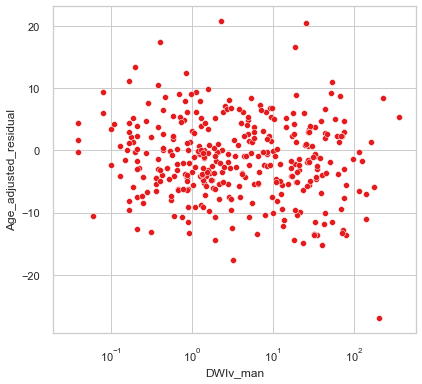

In [154]:
sns.scatterplot(data=DWIman_test_df,x='DWIv_man',y='Age_adjusted_residual').set(xscale="log")

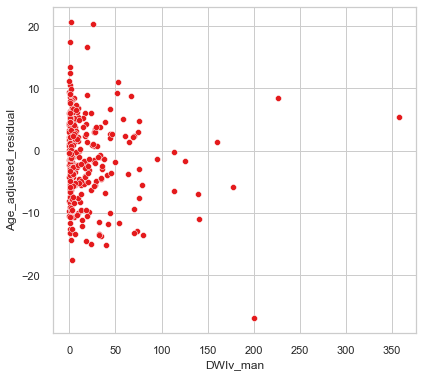

In [155]:
sns.scatterplot(data=DWIman_test_df,x='DWIv_man',y='Age_adjusted_residual')


In [156]:
stats.spearmanr(DWIman_test_df.DWIv_man,DWIman_test_df.Age_adjusted_residual)

SpearmanrResult(correlation=-0.08197342347756774, pvalue=0.1274957801241511)

In [157]:
stats.pearsonr(DWIman_test_df.DWIv_man,DWIman_test_df.Age_adjusted_residual)

(-0.07539865863097177, 0.16107983208685014)

Text(0.5, 1.0, 'Effect size RBA on good outcome per mRS level')

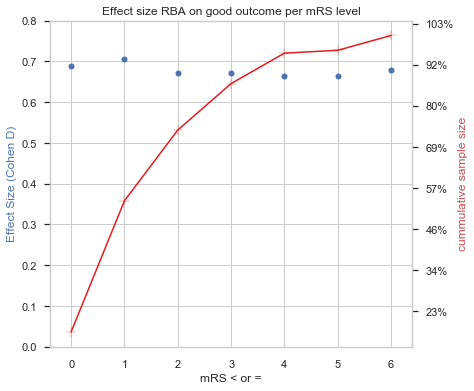

In [158]:
sns.set_palette('Set1')
sns.set_style('whitegrid')
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=mrs_list,y=effect_sizes_mrs, s=100, c='b', marker=".")
ax1.set_ylabel('Effect Size (Cohen D)',c='b')
ax1.set_ylim(top=0.8,bottom=0)

ax2 = ax1.twinx()
ax2.scatter(x=mrs_list,y=cum_pop_mrs,alpha=0.2,marker='+',s=100)
ax2.set_ylabel('cummulative sample size',c='r')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=871))
ax2.yaxis.grid(False)

a_BSpline = make_interp_spline(mrs_list, cum_pop_mrs)
y_new = a_BSpline(mrs_list)
ax3 = plt.plot(mrs_list,y_new)


#ax2.set_ylabel('Spearman',c='r')

#ax1.set_adjustable("datalim")
#ax2.set_adjustable("datalim")
#plt.axes().set_aspect('auto')


ax1.set_xlabel('mRS < or =')


plt.title('Effect size RBA on good outcome per mRS level')

In [159]:
# very good outcome mRS 0 1

In [160]:
mrs_vGood = df_akg_num[['mRS_60_190','NIHSS']].join(outcome_df.Age_adjusted_residual).dropna().sort_values(by='mRS_60_190')
mrs_vGood['Very_good_outcome'] = mrs_vGood['mRS_60_190'].apply(lambda x: 0 if x>=2 else 1)

In [161]:
mrs_vGood

,mRS_60_190,NIHSS,Age_adjusted_residual,Very_good_outcome
uid,,,,
2300000722,0,1.0,-2.881210,1
2300000732,0,5.0,-0.612244,1
2300000516,0,2.0,9.365400,1
2300000743,0,0.0,-5.862946,1
2300000020,0,1.0,-10.499891,1
...,...,...,...,...
400001316,6,3.0,0.911200,0
400001859,6,23.0,-4.590489,0
2100008199,6,17.0,2.086537,0


NIHSS<ou=0.0
89
-0.05674237366992122 0.5973848671512572
Ttest_indResult(statistic=0.9906235578606803, pvalue=0.32461662116994594)
0.6618530988164575


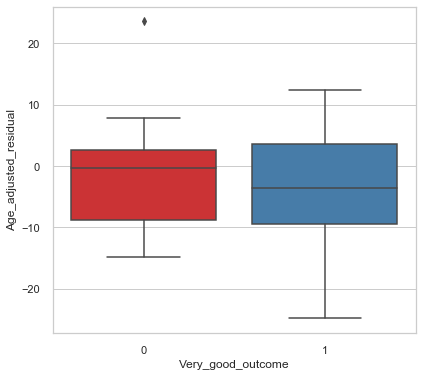

NIHSS<ou=1.0
201
-0.04892881727906809 0.49033718116039837
Ttest_indResult(statistic=0.8569780533466357, pvalue=0.39248784345333043)
0.7796927394502956


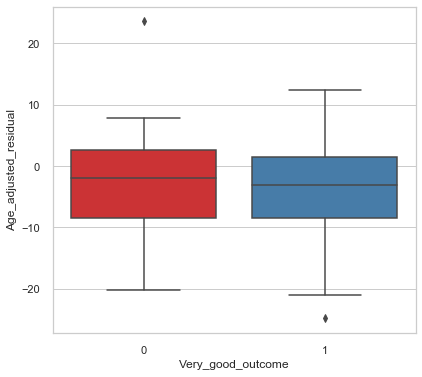

NIHSS<ou=2.0
329
-0.08690119496424033 0.11566715891062453
Ttest_indResult(statistic=1.824158466514688, pvalue=0.06904062441942459)
0.6656872943730157


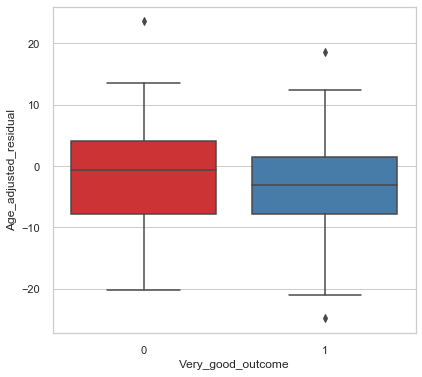

NIHSS<ou=3.0
443
-0.14443984340915436 0.002307431717238094
Ttest_indResult(statistic=2.9444894734276206, pvalue=0.003405891704141075)
0.641078935705895


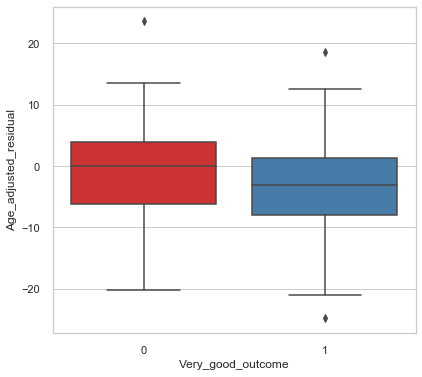

NIHSS<ou=4.0
518
-0.13819092862813115 0.0016176090442077847
Ttest_indResult(statistic=3.1891230833292084, pvalue=0.0015137250675157593)
0.5959849746665464


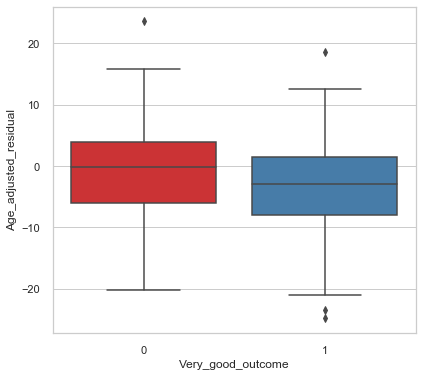

NIHSS<ou=5.0
588
-0.15109033464600463 0.00023591950913290106
Ttest_indResult(statistic=3.9277715244958267, pvalue=9.5945975575116e-05)
0.5213256101997201


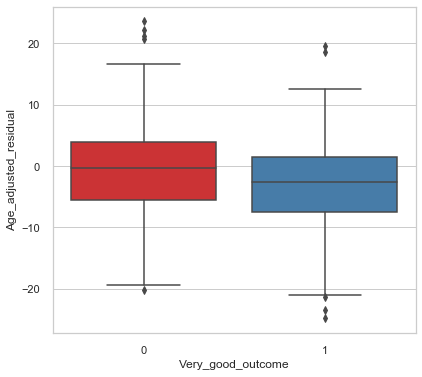

NIHSS<ou=6.0
633
-0.1452492784708768 0.0002457612992339434
Ttest_indResult(statistic=3.93681244002124, pvalue=9.175953960847786e-05)
0.5160032078090087


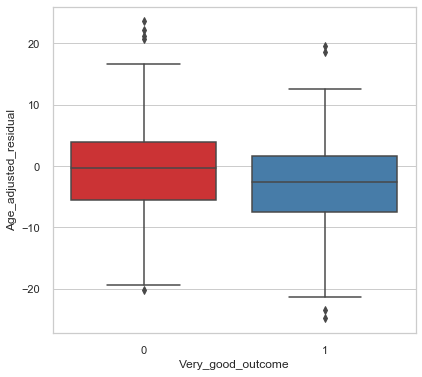

NIHSS<ou=7.0
681
-0.14975612541428973 8.745443510689979e-05
Ttest_indResult(statistic=4.192963079967984, pvalue=3.118095542960138e-05)
0.4957791239299183


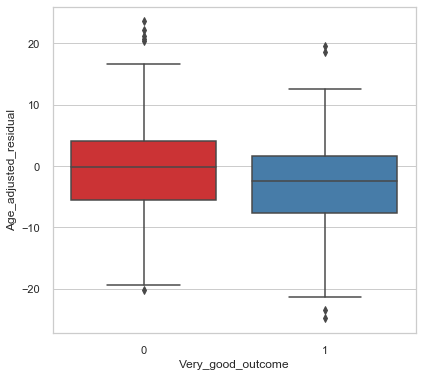

NIHSS<ou=8.0
713
-0.13130074019148286 0.00043962608685379925
Ttest_indResult(statistic=3.773905822118248, pvalue=0.00017411061780619964)
0.4917884656838864


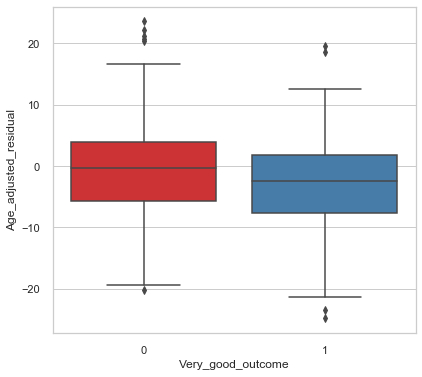

NIHSS<ou=9.0
732
-0.13101804264579367 0.0003793742142988489
Ttest_indResult(statistic=3.850538690876965, pvalue=0.0001282007143032459)
0.48989200011132666


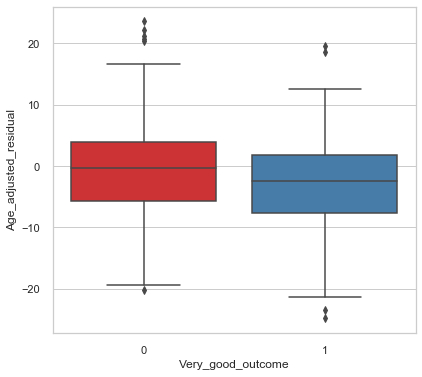

NIHSS<ou=10.0
746
-0.13805923167369805 0.00015518849415665072
Ttest_indResult(statistic=4.0763385675360295, pvalue=5.067536753775808e-05)
0.4782519095215815


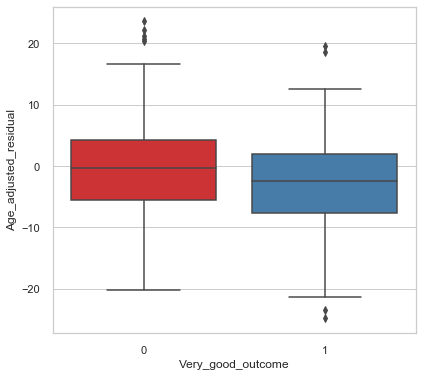

NIHSS<ou=11.0
763
-0.13842972398240075 0.00012506330760860113
Ttest_indResult(statistic=4.193376960949852, pvalue=3.071699904095389e-05)
0.4706074581568559


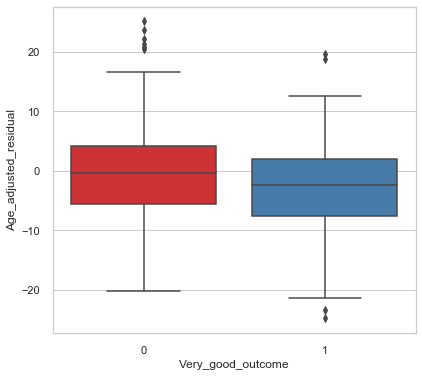

NIHSS<ou=12.0
776
-0.14030351272797525 8.799357082379961e-05
Ttest_indResult(statistic=4.273795275827423, pvalue=2.161410581242298e-05)
0.4667782925792273


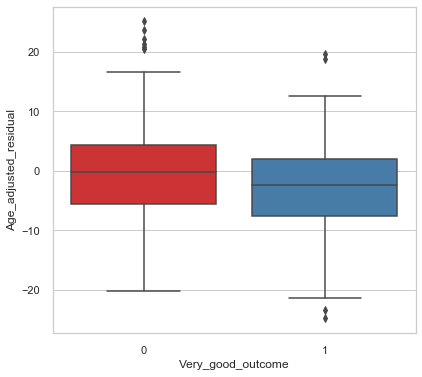

NIHSS<ou=13.0
783
-0.13596489852429472 0.00013549775384850648
Ttest_indResult(statistic=4.182759800615526, pvalue=3.206442886840156e-05)
0.46440111040374216


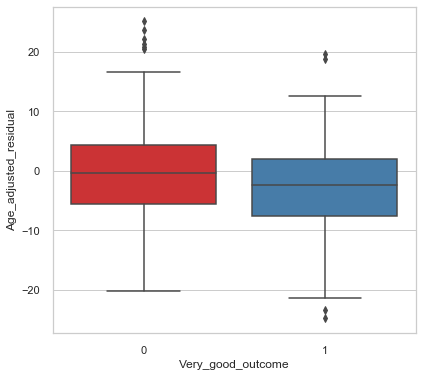

NIHSS<ou=14.0
790
-0.14146578006940938 6.608548852988002e-05
Ttest_indResult(statistic=4.375617598634821, pvalue=1.373806643787508e-05)
0.455471348395421


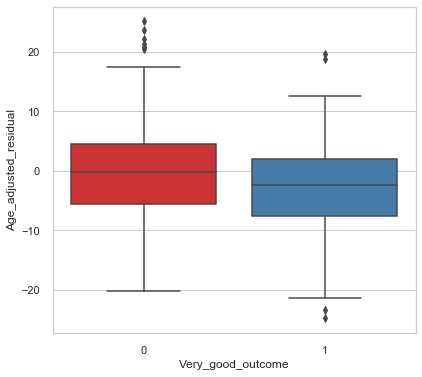

NIHSS<ou=15.0
805
-0.14220127266942856 5.145187377938911e-05
Ttest_indResult(statistic=4.445977965124688, pvalue=9.980131525351558e-06)
0.44488303665915346


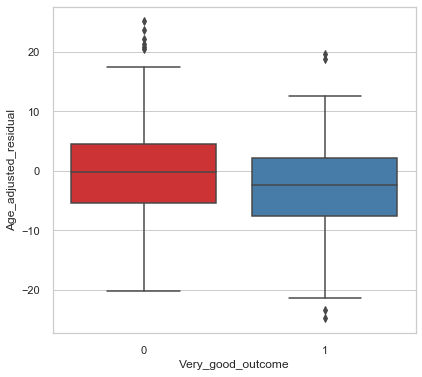

NIHSS<ou=16.0
816
-0.13859498600199663 7.121769458715513e-05
Ttest_indResult(statistic=4.380640576759727, pvalue=1.3379044907572142e-05)
0.45453846485740723


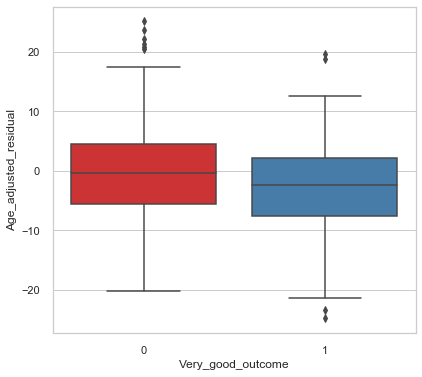

NIHSS<ou=17.0
832
-0.13618371000937393 8.12762469516525e-05
Ttest_indResult(statistic=4.218550665878359, pvalue=2.7294936146789363e-05)
0.45694759634299775


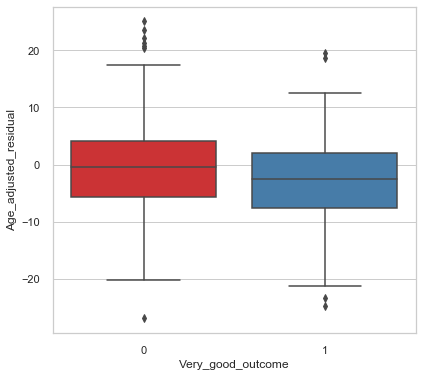

NIHSS<ou=18.0
839
-0.13095183677451708 0.00014248102755326576
Ttest_indResult(statistic=4.083144825770444, pvalue=4.8692234266794075e-05)
0.4603622887423538


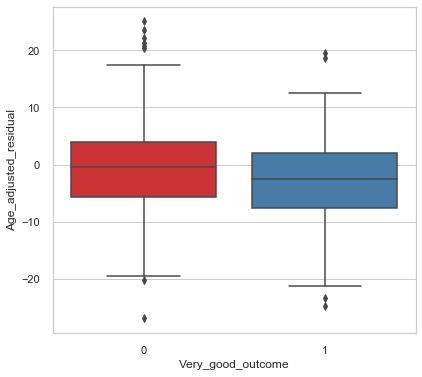

NIHSS<ou=19.0
848
-0.13427842617262678 8.772413550676575e-05
Ttest_indResult(statistic=4.22218856861993, pvalue=2.6814651685479168e-05)
0.44905764003353477


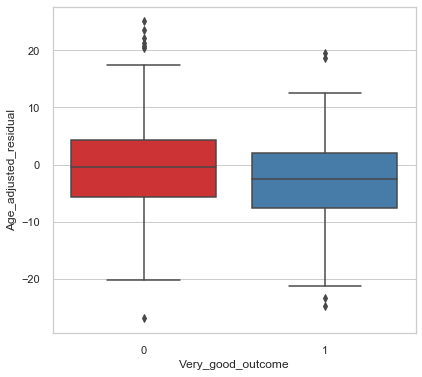

NIHSS<ou=20.0
852
-0.1327486940604541 0.00010177110940249136
Ttest_indResult(statistic=4.191611351203272, pvalue=3.05984615008017e-05)
0.4502603473929556


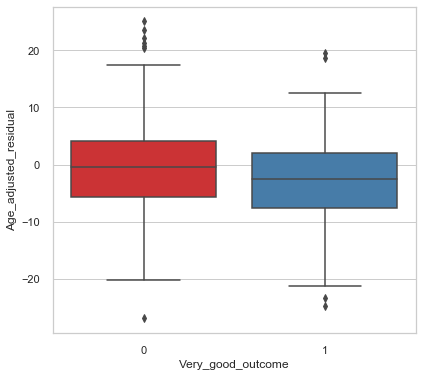

NIHSS<ou=21.0
857
-0.13214705028068038 0.00010448735022851575
Ttest_indResult(statistic=4.185218263447616, pvalue=3.143654670658889e-05)
0.4535149706629445


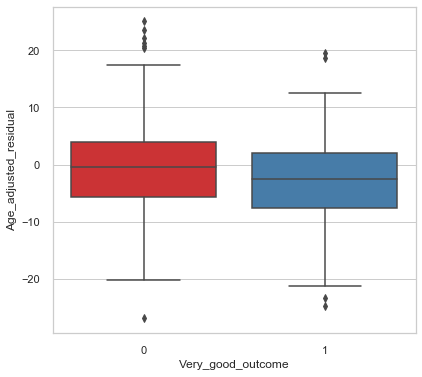

NIHSS<ou=22.0
858
-0.1314782536502089 0.00011228904361964034
Ttest_indResult(statistic=4.1734974539239165, pvalue=3.3061095822345095e-05)
0.45410622774600895


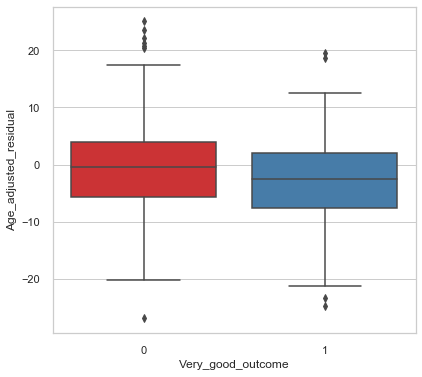

NIHSS<ou=23.0
860
-0.12990535902771413 0.00013332692350568638
Ttest_indResult(statistic=4.144040863186139, pvalue=3.7506367490506426e-05)
0.45551253541161735


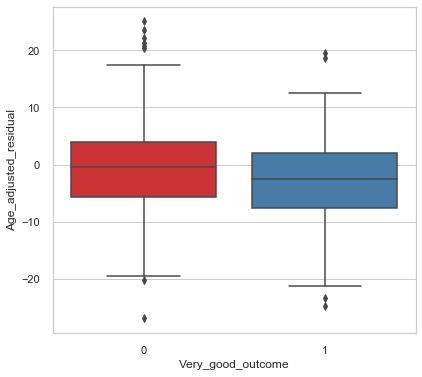

NIHSS<ou=24.0
862
-0.12933927617034388 0.00014016620821877187
Ttest_indResult(statistic=4.130635188368007, pvalue=3.9708013253702694e-05)
0.4557757850145797


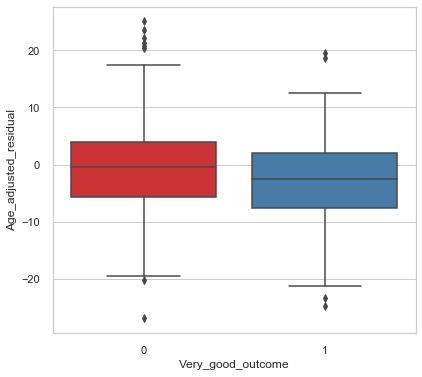

NIHSS<ou=25.0
863
-0.1280962408872216 0.00016118913822117577
Ttest_indResult(statistic=4.1059366631534475, pvalue=4.410268386444015e-05)
0.4568208911411189


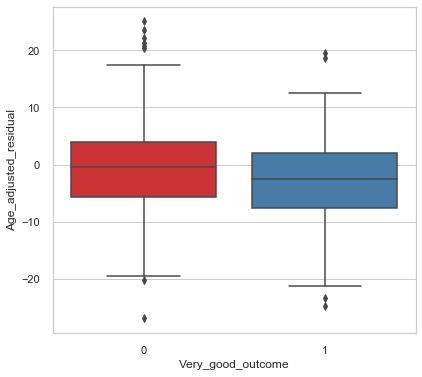

NIHSS<ou=27.0
864
-0.12914128070241968 0.00014099446893747956
Ttest_indResult(statistic=4.131844112525108, pvalue=3.9495326849192704e-05)
0.45564409869854555


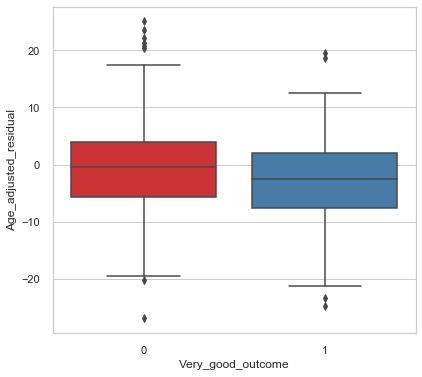

NIHSS<ou=28.0
865
-0.12714239192705096 0.00017740824746447357
Ttest_indResult(statistic=4.077298589042765, pvalue=4.97727190787881e-05)
0.45747724571262616


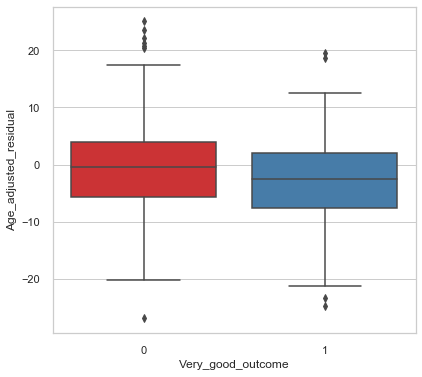

NIHSS<ou=30.0
867
-0.12459716672812764 0.00023525969973296697
Ttest_indResult(statistic=4.009235870316976, pvalue=6.617252855404957e-05)
0.45978861018059


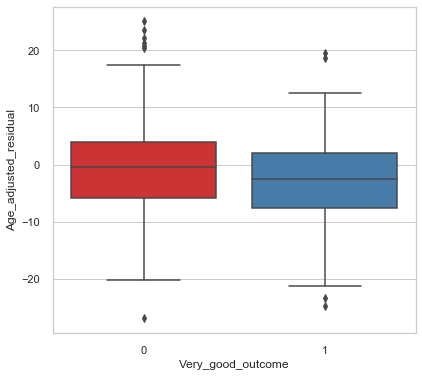

NIHSS<ou=31.0
868
-0.12242014107730871 0.00030019598731252916
Ttest_indResult(statistic=3.945796127244321, pvalue=8.597630743660913e-05)
0.46180063455439085


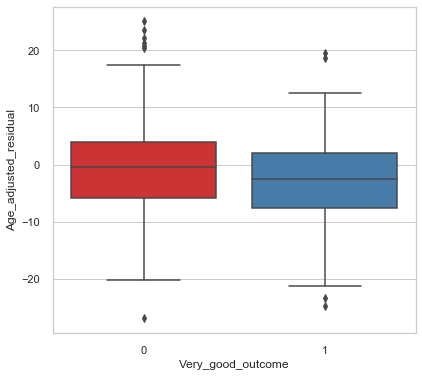

NIHSS<ou=34.0
869
-0.12286720607774183 0.0002828407299856402
Ttest_indResult(statistic=3.956031078599635, pvalue=8.243197839588414e-05)
0.46146067421698767


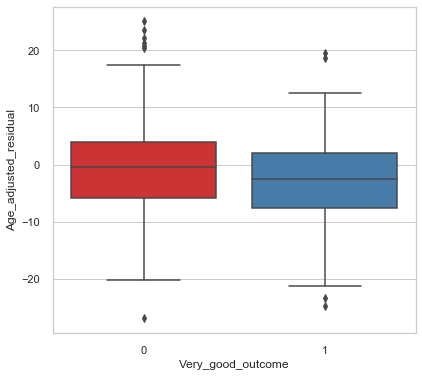

NIHSS<ou=36.0
870
-0.12215510110095046 0.00030453646440469943
Ttest_indResult(statistic=3.943008744697949, pvalue=8.694877679128309e-05)
0.46211380658890683


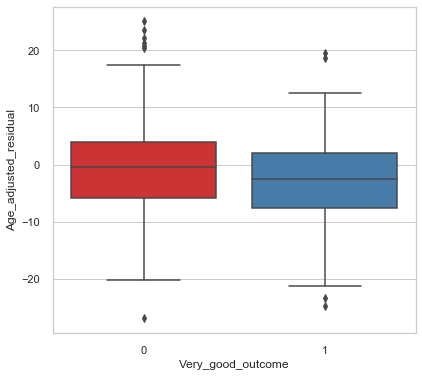

In [162]:
mrs_vGood_effect_size = mrs_vGood.filter(['NIHSS','Very_good_outcome','Age_adjusted_residual'],axis=1).dropna()
mrs_vGood_effect_size.sort_values(by='NIHSS')
NIHSS_list_vg=list()
effect_sizes_vg = list()
rho_NIHSS_list_vg=list()
cum_pop_size_vg = list()
for NIHSS_level in mrs_vGood_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    print('NIHSS<ou={}'.format(NIHSS_level))
    outcome_df_effect_size_infold = mrs_vGood_effect_size[mrs_vGood_effect_size['NIHSS']<=NIHSS_level].dropna()
    print(outcome_df_effect_size_infold.shape[0])
    cum_pop_size_vg.append(outcome_df_effect_size_infold.shape[0])
    rho_NIHSS, p_spear_NIHSS = stats.spearmanr(outcome_df_effect_size_infold.Very_good_outcome,outcome_df_effect_size_infold.Age_adjusted_residual)
    print(rho_NIHSS,p_spear_NIHSS)
    rho_NIHSS_list_vg.append(rho_NIHSS)
    print(stats.ttest_ind(outcome_df_effect_size_infold[outcome_df_effect_size_infold['Very_good_outcome']==0].Age_adjusted_residual,outcome_df_effect_size_infold[outcome_df_effect_size_infold['Very_good_outcome']==1].Age_adjusted_residual))

    outcome_infold=np.array(outcome_df_effect_size_infold.Very_good_outcome)
    age_adj_infold=np.array(outcome_df_effect_size_infold.Age_adjusted_residual)
    effect_size=cohend(outcome_infold,age_adj_infold)
    print(effect_size)
    effect_sizes_vg.append(effect_size)
    NIHSS_list_vg.append(NIHSS_level)
    sns.boxplot(data=outcome_df_effect_size_infold,x="Very_good_outcome",y='Age_adjusted_residual')
    plt.show()

Text(0.5, 1.0, 'Effect size RBA on very good outcome per NIHSS level')

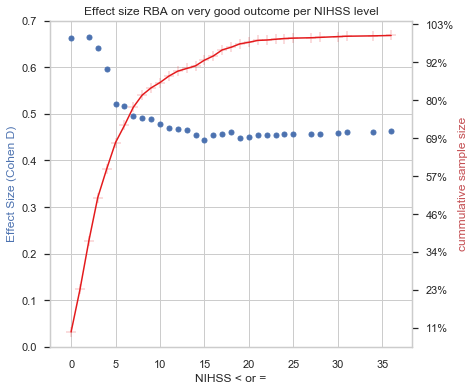

In [163]:

sns.set_palette('Set1')
sns.set_style('whitegrid')
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=NIHSS_list_vg,y=effect_sizes_vg, s=100, c='b', marker=".")
ax1.set_ylabel('Effect Size (Cohen D)',c='b')
ax1.set_ylim(top=0.7,bottom=0)

ax2 = ax1.twinx()
ax2.scatter(x=NIHSS_list_vg,y=cum_pop_size_vg,alpha=0.2,marker='+',s=100)
ax2.set_ylabel('cummulative sample size',c='r')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=871))
ax2.yaxis.grid(False)

a_BSpline = make_interp_spline(NIHSS_list_vg, cum_pop_size_vg)
y_new = a_BSpline(NIHSS_list_vg)
ax3 = plt.plot(NIHSS_list_vg,y_new)

#ax2.set_ylabel('Spearman',c='r')

#ax1.set_adjustable("datalim")
#ax2.set_adjustable("datalim")
#plt.axes().set_aspect('auto')


ax1.set_xlabel('NIHSS < or =')


plt.title('Effect size RBA on very good outcome per NIHSS level')

In [164]:
mrs_vGood['Perfect_outcome'] = mrs_vGood['mRS_60_190'].apply(lambda x: 0 if x>=1 else 1)

NIHSS<ou=0.0
89
-0.0786939151162503 0.46353411699364055
Ttest_indResult(statistic=0.7644491887729994, pvalue=0.4466680965510129)
0.5979821344785693


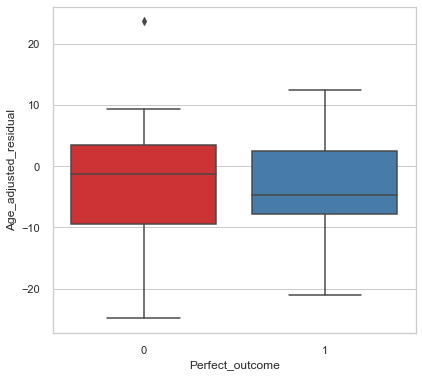

NIHSS<ou=1.0
201
-0.0906128244837425 0.20079856985575156
Ttest_indResult(statistic=1.3374519457053302, pvalue=0.18260177494929575)
0.693776822755411


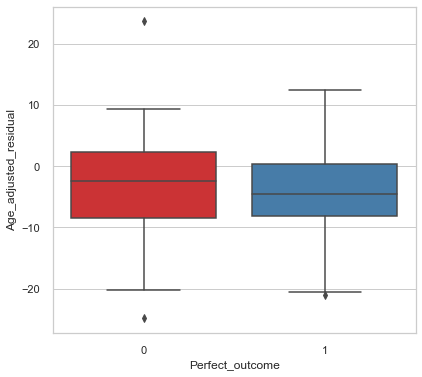

NIHSS<ou=2.0
329
-0.0647494577520953 0.24151511470425427
Ttest_indResult(statistic=1.4704280282629334, pvalue=0.14240740761868292)
0.5778498120070314


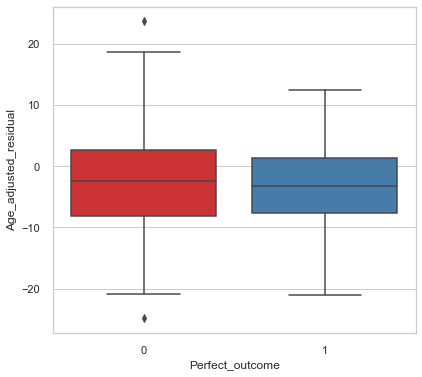

NIHSS<ou=3.0
443
-0.05947169655406771 0.2115539626283214
Ttest_indResult(statistic=1.4746547674009105, pvalue=0.14101889764943348)
0.5538920001450478


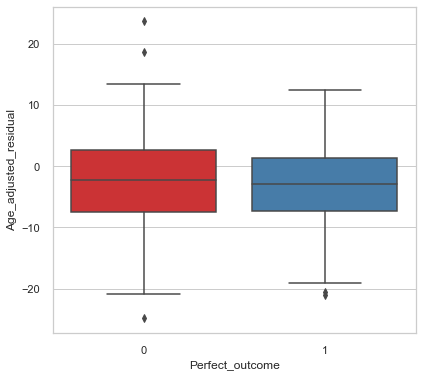

NIHSS<ou=4.0
518
-0.07364123058127264 0.09407739094995307
Ttest_indResult(statistic=1.851960958136464, pvalue=0.06460241435215434)
0.5127208737915471


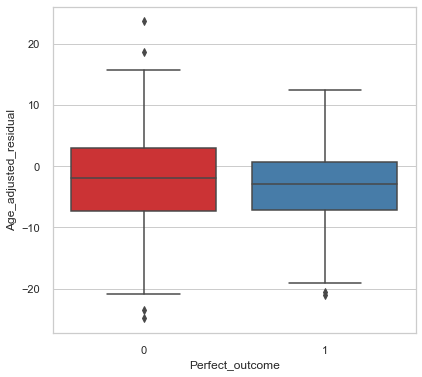

NIHSS<ou=5.0
588
-0.07747092344132554 0.0604639974393434
Ttest_indResult(statistic=1.9543975697638776, pvalue=0.05112939462044876)
0.44139696824599944


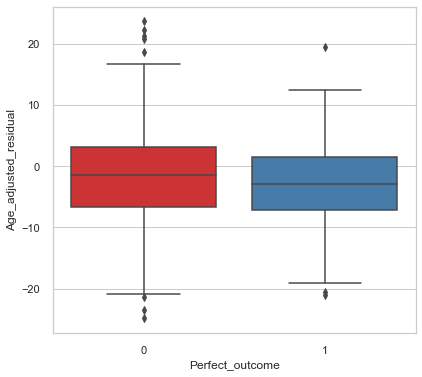

NIHSS<ou=6.0
633
-0.09482796345909811 0.017010182504297453
Ttest_indResult(statistic=2.4183595303192247, pvalue=0.015872732793249782)
0.43736951857520423


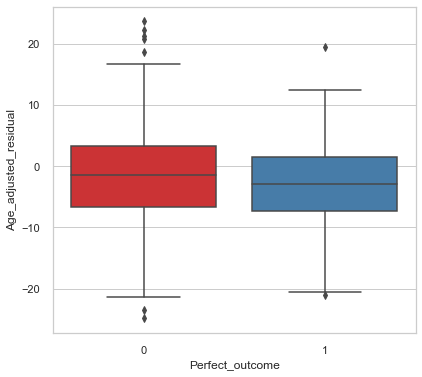

NIHSS<ou=7.0
681
-0.09940023854345785 0.009442268129655696
Ttest_indResult(statistic=2.619539683973739, pvalue=0.009001522548914783)
0.41883045316138023


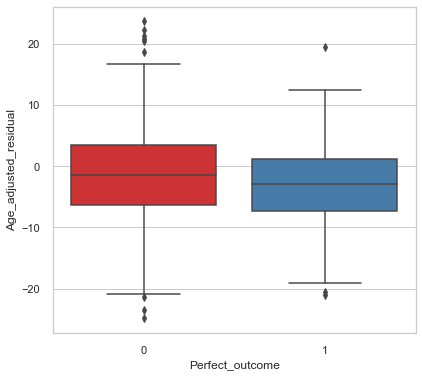

NIHSS<ou=8.0
713
-0.09517894641888579 0.010997145981122782
Ttest_indResult(statistic=2.576114300350734, pvalue=0.010192466785156026)
0.4159634333470433


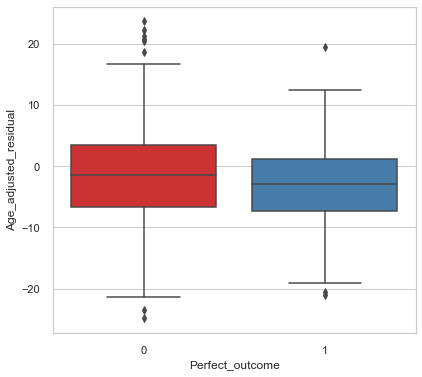

NIHSS<ou=9.0
732
-0.09819811401119968 0.00784458799175114
Ttest_indResult(statistic=2.6915658426893136, pvalue=0.007274598777617388)
0.4142674743671234


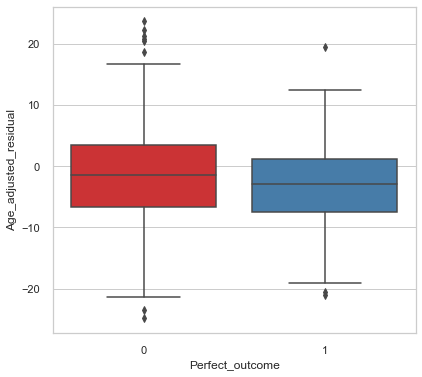

NIHSS<ou=10.0
746
-0.10039503670205466 0.006061643220984431
Ttest_indResult(statistic=2.78014904666069, pvalue=0.005570653106228341)
0.4038610228209477


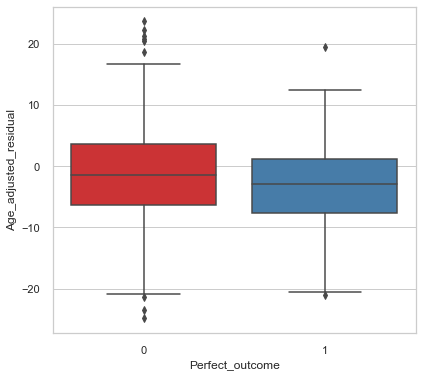

NIHSS<ou=11.0
763
-0.09838479402694128 0.006532636958335836
Ttest_indResult(statistic=2.7869123120218506, pvalue=0.005453858739367172)
0.39735309482931636


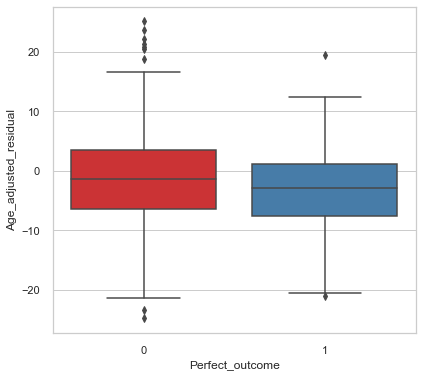

NIHSS<ou=12.0
776
-0.0976042987064711 0.006507343001578947
Ttest_indResult(statistic=2.7991638267470895, pvalue=0.00525101936218909)
0.3944289254463156


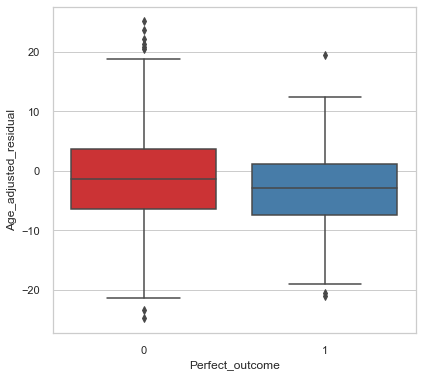

NIHSS<ou=13.0
783
-0.0970009517713257 0.006600298910043433
Ttest_indResult(statistic=2.794656210024771, pvalue=0.005322875842164885)
0.3926378283126868


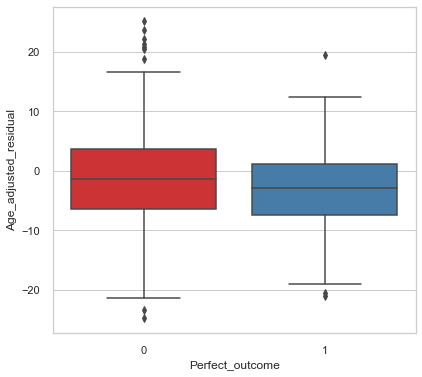

NIHSS<ou=14.0
790
-0.09817683845209273 0.005749152924239688
Ttest_indResult(statistic=2.8526002137867033, pvalue=0.00444986470380533)
0.3842898916187


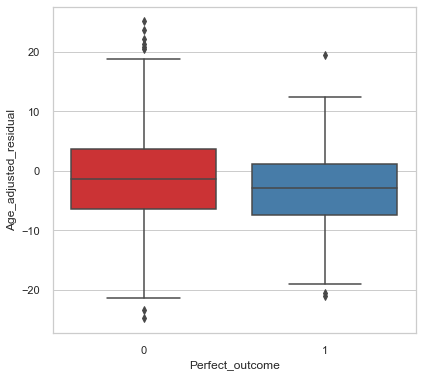

NIHSS<ou=15.0
805
-0.09934676018777455 0.004782640446408625
Ttest_indResult(statistic=2.9052687240745327, pvalue=0.0037701869607979638)
0.37347880512200404


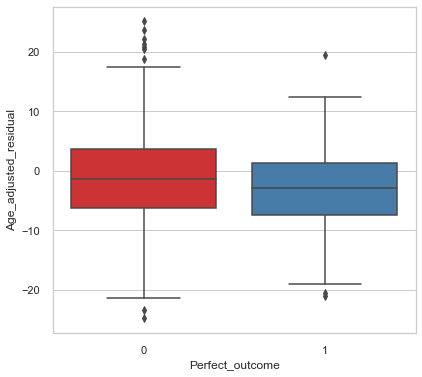

NIHSS<ou=16.0
816
-0.0951044960767092 0.006553351745433795
Ttest_indResult(statistic=2.789683477970197, pvalue=0.005399240762964447)
0.38332980800504834


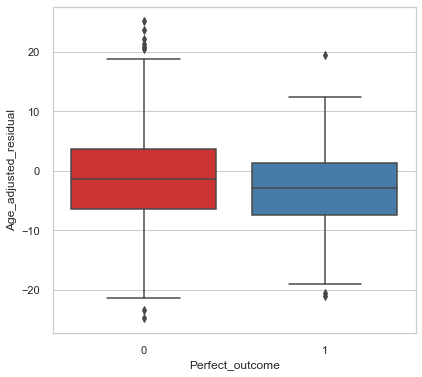

NIHSS<ou=17.0
832
-0.09683642850819271 0.005180946021273911
Ttest_indResult(statistic=2.7909990829984372, pvalue=0.005375170504626342)
0.38687528855052156


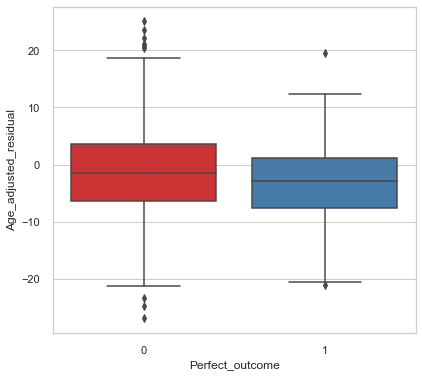

NIHSS<ou=18.0
839
-0.09459370044288223 0.006106278712537973
Ttest_indResult(statistic=2.74161694500929, pvalue=0.006244183934224613)
0.3909374384200417


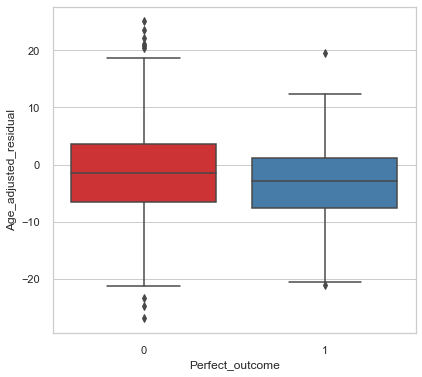

NIHSS<ou=19.0
848
-0.09219832529650114 0.007217909153522956
Ttest_indResult(statistic=2.712320987992606, pvalue=0.006817022983384843)
0.38030494830918826


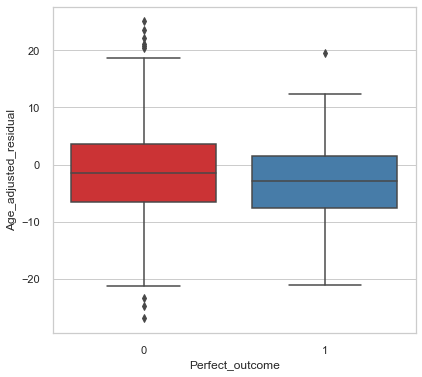

NIHSS<ou=20.0
852
-0.09150365514309473 0.007526792184086494
Ttest_indResult(statistic=2.7049121343931812, pvalue=0.006968933189349307)
0.38173711818416606


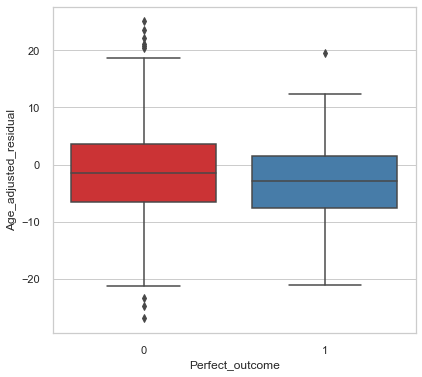

NIHSS<ou=21.0
857
-0.09005175416958086 0.008346084870620846
Ttest_indResult(statistic=2.6737352329036126, pvalue=0.0076442463186102904)
0.3851294542049779


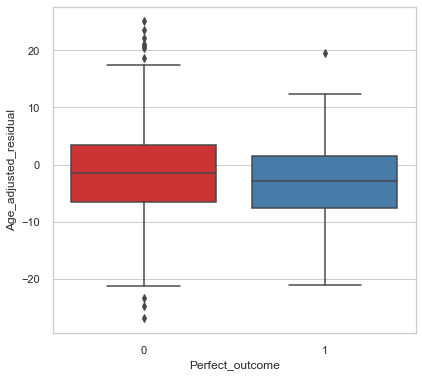

NIHSS<ou=22.0
858
-0.0897717520919916 0.008512352476268394
Ttest_indResult(statistic=2.6703250208039293, pvalue=0.0077214972438155735)
0.3857657009470391


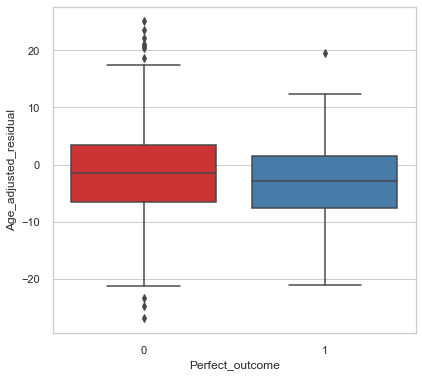

NIHSS<ou=23.0
860
-0.08910348764422264 0.008937686900868215
Ttest_indResult(statistic=2.6609397535094845, pvalue=0.007937867559233373)
0.3872658308917505


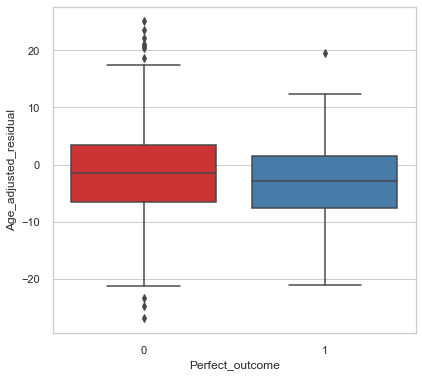

NIHSS<ou=24.0
862
-0.08888248065294699 0.009028910744123498
Ttest_indResult(statistic=2.65745142765794, pvalue=0.00801945229465254)
0.38767080756764927


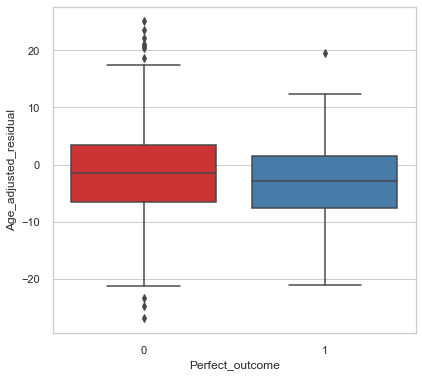

NIHSS<ou=25.0
863
-0.08831216315589994 0.009441303345131807
Ttest_indResult(statistic=2.648469876817049, pvalue=0.008233715745057593)
0.38877224610543587


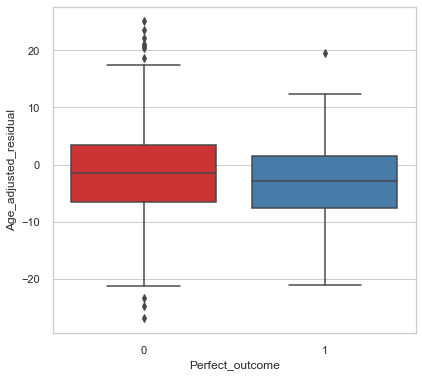

NIHSS<ou=27.0
864
-0.08879747584039817 0.009015030122871526
Ttest_indResult(statistic=2.6603157872433645, pvalue=0.00795178768810461)
0.38765575200555413


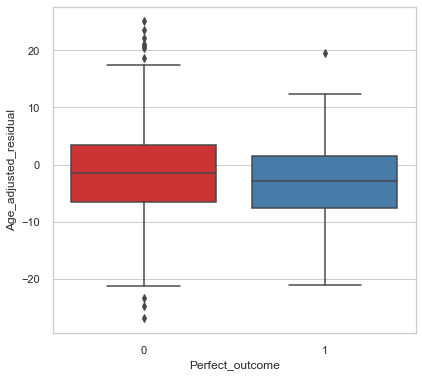

NIHSS<ou=28.0
865
-0.0879602015147046 0.009646090655089477
Ttest_indResult(statistic=2.638230707750315, pvalue=0.00848408355947156)
0.38959813110930036


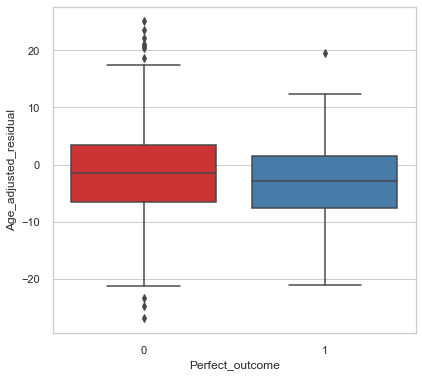

NIHSS<ou=30.0
867
-0.08692817950812011 0.010444816955447394
Ttest_indResult(statistic=2.6115338745810637, pvalue=0.009169867259948802)
0.39208453806041776


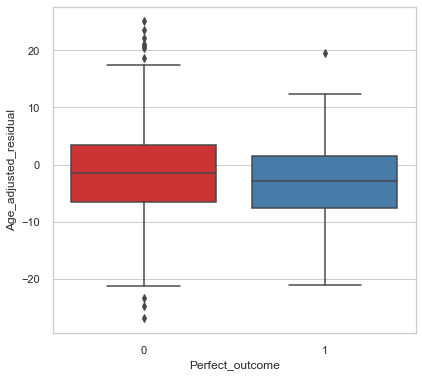

NIHSS<ou=31.0
868
-0.08601357376854538 0.011239406659348718
Ttest_indResult(statistic=2.585326031164798, pvalue=0.009891081179313236)
0.3942284207839212


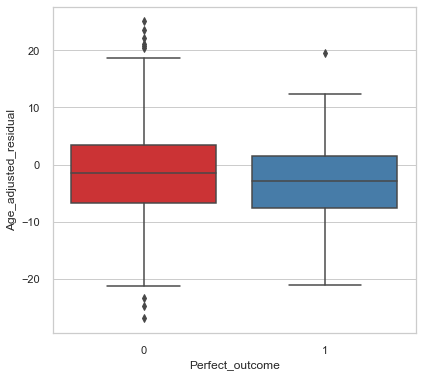

NIHSS<ou=34.0
869
-0.0862311170755615 0.010988332343868524
Ttest_indResult(statistic=2.5908941890338735, pvalue=0.009733521099682533)
0.3939316479316586


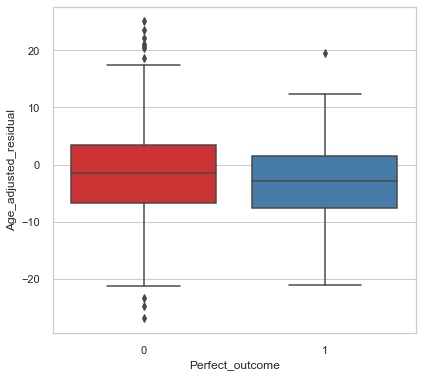

NIHSS<ou=36.0
870
-0.08591465785873914 0.011239477902520455
Ttest_indResult(statistic=2.5867829645815887, pvalue=0.009849311187036826)
0.39462973199434015


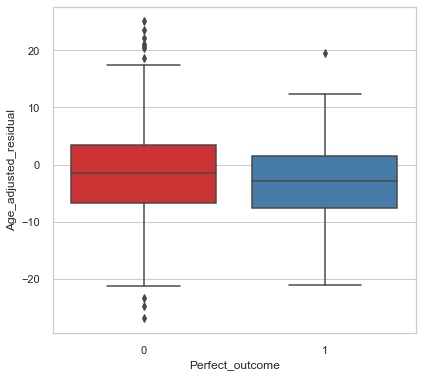

In [165]:
mrs_vGood_effect_size = mrs_vGood.filter(['NIHSS','Perfect_outcome','Age_adjusted_residual'],axis=1).dropna()
mrs_vGood_effect_size.sort_values(by='NIHSS')
NIHSS_list_vg=list()
effect_sizes_vg = list()
rho_NIHSS_list_vg=list()
cum_pop_size_vg = list()
for NIHSS_level in mrs_vGood_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    print('NIHSS<ou={}'.format(NIHSS_level))
    outcome_df_effect_size_infold = mrs_vGood_effect_size[mrs_vGood_effect_size['NIHSS']<=NIHSS_level].dropna()
    print(outcome_df_effect_size_infold.shape[0])
    cum_pop_size_vg.append(outcome_df_effect_size_infold.shape[0])
    rho_NIHSS, p_spear_NIHSS = stats.spearmanr(outcome_df_effect_size_infold.Perfect_outcome,outcome_df_effect_size_infold.Age_adjusted_residual)
    print(rho_NIHSS,p_spear_NIHSS)
    rho_NIHSS_list_vg.append(rho_NIHSS)
    print(stats.ttest_ind(outcome_df_effect_size_infold[outcome_df_effect_size_infold['Perfect_outcome']==0].Age_adjusted_residual,outcome_df_effect_size_infold[outcome_df_effect_size_infold['Perfect_outcome']==1].Age_adjusted_residual))

    outcome_infold=np.array(outcome_df_effect_size_infold.Perfect_outcome)
    age_adj_infold=np.array(outcome_df_effect_size_infold.Age_adjusted_residual)
    effect_size=cohend(outcome_infold,age_adj_infold)
    print(effect_size)
    effect_sizes_vg.append(effect_size)
    NIHSS_list_vg.append(NIHSS_level)
    sns.boxplot(data=outcome_df_effect_size_infold,x="Perfect_outcome",y='Age_adjusted_residual')
    plt.show()

Text(0.5, 1.0, 'Effect size RBA on very good outcome per NIHSS level')

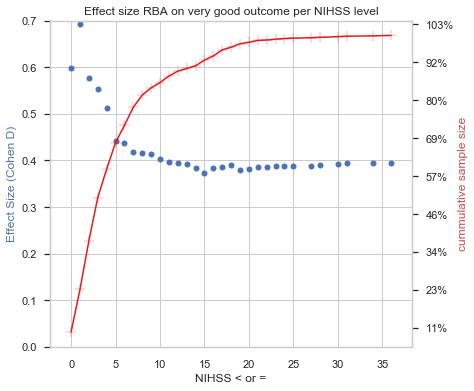

In [166]:

sns.set_palette('Set1')
sns.set_style('whitegrid')
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=NIHSS_list_vg,y=effect_sizes_vg, s=100, c='b', marker=".")
ax1.set_ylabel('Effect Size (Cohen D)',c='b')
ax1.set_ylim(top=0.7,bottom=0)

ax2 = ax1.twinx()
ax2.scatter(x=NIHSS_list_vg,y=cum_pop_size_vg,alpha=0.2,marker='+',s=100)
ax2.set_ylabel('cummulative sample size',c='r')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=871))
ax2.yaxis.grid(False)

a_BSpline = make_interp_spline(NIHSS_list_vg, cum_pop_size_vg)
y_new = a_BSpline(NIHSS_list_vg)
ax3 = plt.plot(NIHSS_list_vg,y_new)

#ax2.set_ylabel('Spearman',c='r')

#ax1.set_adjustable("datalim")
#ax2.set_adjustable("datalim")
#plt.axes().set_aspect('auto')


ax1.set_xlabel('NIHSS < or =')


plt.title('Effect size RBA on very good outcome per NIHSS level')

In [167]:
cohend(mrs_vGood.Perfect_outcome,mrs_vGood.Age_adjusted_residual)

0.39462973199434015

In [168]:
cohend(mrs_vGood.Very_good_outcome,mrs_vGood.Age_adjusted_residual)

0.46211380658890683

In [169]:
mrs_vGood['Good_outcome'] = mrs_vGood['mRS_60_190'].apply(lambda x: 0 if x>=3 else 1)
cohend(mrs_vGood.Good_outcome,mrs_vGood.Age_adjusted_residual)

0.49871126294742674

In [170]:
mrs_vGood

,mRS_60_190,NIHSS,Age_adjusted_residual,Very_good_outcome,Perfect_outcome,Good_outcome
uid,,,,,,
2300000722,0,1.0,-2.881210,1,1,1
2300000732,0,5.0,-0.612244,1,1,1
2300000516,0,2.0,9.365400,1,1,1
2300000743,0,0.0,-5.862946,1,1,1
2300000020,0,1.0,-10.499891,1,1,1
...,...,...,...,...,...,...
400001316,6,3.0,0.911200,0,0,0
400001859,6,23.0,-4.590489,0,0,0
2100008199,6,17.0,2.086537,0,0,0


In [171]:
mrs_vGood.Age_adjusted_residual.describe()

count    870.000000
mean      -1.958516
std        7.627139
min      -26.879324
25%       -6.931751
50%       -1.820644
75%        2.946054
max       25.069871
Name: Age_adjusted_residual, dtype: float64

/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/PHShome/mi362/anaconda3/envs/jupiler1/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


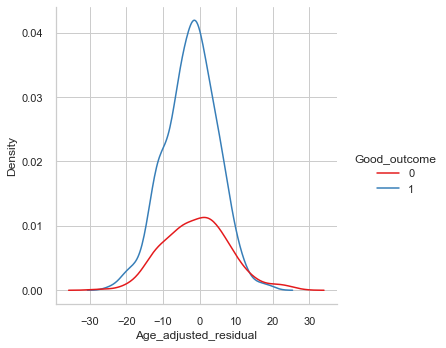

In [172]:
sns.displot(data=mrs_vGood, x= 'Age_adjusted_residual',hue='Good_outcome',kind="kde")

In [174]:
mrs_vGood.Age_adjusted_residual=Age_adjusted_residual.Age_adjusted_residual.astype('')

NameError: name 'Age_adjusted_residual' is not defined

In [175]:
# CCS

In [176]:
results_df_CCS=results_df.reset_index().merge(df_CCS.reset_index(),left_on='ID',right_on='ID')
results_df_std_CCS=results_df_std.reset_index().merge(df_CCS.reset_index(),left_on='ID',right_on='ID')

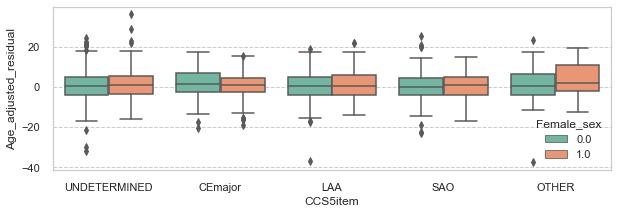

In [177]:
from matplotlib import pyplot
sns.set_palette('Set2')
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, ax = pyplot.subplots(figsize=(10, 3))
sns.boxplot(ax=ax,data=results_df_CCS,x='CCS5item', y='Age_adjusted_residual',hue="Female_sex")



In [178]:
for etio in results_df_CCS.CCS5item.unique():
    print(etio)
    print(results_df_CCS[(results_df_CCS['CCS5item']==etio) & (results_df_CCS['Female_sex']==0) ].Age_adjusted_residual.std())
    print(results_df_CCS[(results_df_CCS['CCS5item']==etio) & (results_df_CCS['Female_sex']==0) ].Age_adjusted_residual.std())

UNDETERMINED
7.563112512645504
7.563112512645504
CEmajor
7.13027668816436
7.13027668816436
LAA
7.281107812343555
7.281107812343555
SAO
7.5854390285139655
7.5854390285139655
OTHER
8.368291201855156
8.368291201855156


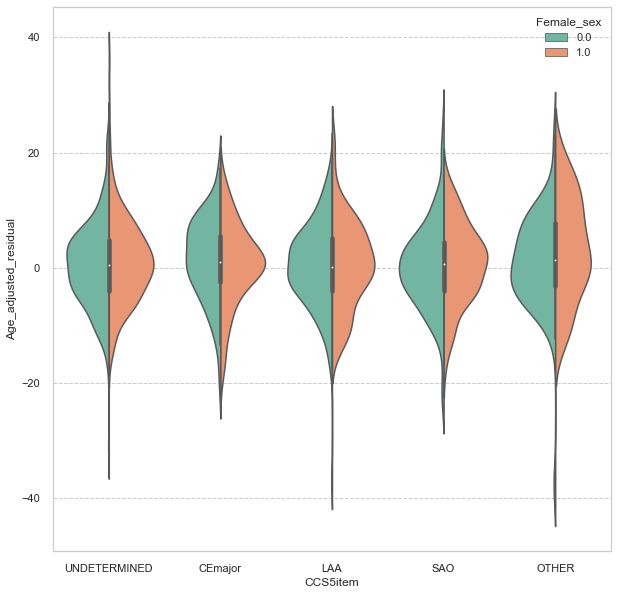

In [179]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, ax = pyplot.subplots(figsize=(10, 10))
sns.violinplot(ax=ax,data=results_df_CCS,x='CCS5item', y='Age_adjusted_residual',split=True,hue='Female_sex')



In [180]:
from sklearn.preprocessing import OneHotEncoder
df_test_CCS = np.array(results_df_CCS.CCS5item).reshape(-1, 1)
encoder = OneHotEncoder().fit(df_test_CCS)
df_CCS_oneHot = pd.DataFrame(encoder.transform(df_test_CCS).toarray(),columns=encoder.get_feature_names(),index=results_df_CCS.ID)

In [181]:
df_CCS_oneHot_merge = df_CCS_oneHot.merge(results_df_CCS.set_index("ID"),left_index=True,right_index=True)

In [ ]:
df_CCS_oneHot_merge

In [ ]:
df_CCS_oneHot_merge.columns

In [ ]:
stats.pearsonr(df_CCS_oneHot_merge.Age_adjusted_residual,df_CCS_oneHot_merge.Age)

In [ ]:
sns.regplot(data=df_CCS_oneHot_merge, x='WMH_Bvadj', y='Age_adjusted_residual').set(xscale="log")

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# again, invoke statsmodel's formula API using the below syntax
CCS_model = ols("""Age_adjusted_residual ~   C(CCS5item) + WMH_Bvadj 
                                            """, data=df_CCS_oneHot_merge).fit()
table = sm.stats.anova_lm(CCS_model, typ=2)
print(table)





In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df_CCS_oneHot_merge.WMH_Bvadj, df_CCS_oneHot_merge.CCS5item))

In [ ]:
from statsmodels.formula.api import ols
# again, invoke statsmodel's formula API using the below syntax
residual_model = ols("""Age_adjusted_residual ~   
                                            + Female_sex + HTN 
                                            + DM 
                                            + AF
                                            + CAD 
                                            + Smoking_ever
                                            + Prior_stroke
                                            
                                            """, data=results_df).fit()
# summarize our model
model_summary = residual_model.summary()
model_summary



In [ ]:
residual_model = ols("""Predicted ~ Age +  Female_sex + HTN 
                                            + DM 
                                            + AF
                                            + CAD 
                                            + Smoking_ever
                                            + Prior_stroke
                                            
                                            
                                            """, data=results_df).fit()
# summarize our model
model_summary = residual_model.summary()
model_summary



In [ ]:
results_df_std_CCS.columns

In [ ]:
sns.set_palette("twilight_shifted")
sns.lmplot(x="PredictedAge_adjusted", y="Age_adjusted_residual", hue="Prior_stroke",scatter_kws = {'alpha' : 0.8},
           col="CCS5item",
           #row='CCS5item',
           data=results_df_std_CCS);

In [ ]:
sns.residplot(x="PredictedAge_adjusted", y="Age_adjusted_residual", 
           data=results_df_std_CCS);

In [ ]:
results_df.columns

In [ ]:
# test with only brain volume regressed out age

#regression dilution bias correction as in : Association of relative brain age with tobacco smoking, alcohol consumption, and genetic variants
#Kaida Ning, Lu Zhao, Will Matloff, Fengzhu Sun & Arthur W. Toga https://www.nature.com/articles/s41598-019-56089-4



X_reg_BV=np.array(results_df[['No_csf_brain_vol']])
y_reg_BV=np.array(results_df.Age)
linreg = LinearRegression()
linreg.fit(X_reg_BV,y_reg_BV)
BV_PredictedAge = linreg.predict(X_reg_BV)
results_df['BV_PredictedAge']=BV_PredictedAge

X_reg_BV2 = np.array(results_df.Age).reshape(-1, 1)
y_reg_BV2 = np.array(results_df.BV_PredictedAge).reshape(-1, 1)
linreg.fit(X_reg_BV2,y_reg_BV2) 
results_df['BV_adjusted_PredictedAge'] = linreg.predict(X_reg_BV2)

results_df['BV_Age_residual_ajusted'] = results_df.BV_PredictedAge - results_df.BV_adjusted_PredictedAge
outcome_df = results_df.join(df_prognosis,how='inner')

## method from 

In [ ]:

sns.scatterplot(x='Age',y='BV_Age_residual_ajusted',data=results_df)

In [ ]:

sns.residplot(x='Age',y='Age_adjusted_residual',data=results_df)

In [ ]:
sns.scatterplot(x='Age',y='BV_Age_residual_ajusted',hue='Good_outcome',data=outcome_df,palette="rocket_r")

In [ ]:
results_df.columns

In [ ]:
results_df['BV_Age_residual']= results_df['BV_PredictedAge'] - results_df.Age
print(results_df.BV_Age_residual.std())
print(results_df.residual.std())

In [ ]:
results_df['AE_BV_Age_pred']=abs(results_df.BV_Age_residual)
print(results_df.AE_BV_Age_pred.mean())
print(results_df.absolute_error.mean())

In [ ]:

print(cohend(outcome_df.Good_outcome,outcome_df.BV_Age_residual_ajusted))
print(cohend(outcome_df.Good_outcome,outcome_df.Age_adjusted_residual))


In [ ]:
stats.ttest_ind(outcome_df[outcome_df['Good_outcome']==0].Age_adjusted_residual,outcome_df[outcome_df['Good_outcome']==1].Age_adjusted_residual,)


In [ ]:
stats.ttest_ind(outcome_df[outcome_df['Good_outcome']==0].BV_Age_residual_ajusted,outcome_df[outcome_df['Good_outcome']==1].BV_Age_residual_ajusted,)

In [ ]:
outcome_df.Age

In [ ]:
outcome_df = results_df.join(df_prognosis,how='inner')
sns.boxplot(data=outcome_df,y='Age_adjusted_residual',x='Good_outcome').set(ylabel='Relative Brain Age',xlabel='Good outcome')

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = outcome_df['Age_adjusted_residual'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h,"p<0.001", ha='center', va='bottom', color=col,fontsize ='x-large')


In [ ]:
outcome_df_effect_size = outcome_df.filter(['NIHSS','Good_outcome','BV_Age_residual_ajusted'],axis=1).dropna()
outcome_df_effect_size.sort_values(by='NIHSS')
NIHSS_list=list()
effect_sizes = list()
rho_NIHSS_list=list()
cum_pop_size = list()
for NIHSS_level in outcome_df_effect_size.sort_values(by='NIHSS').NIHSS.unique():
    print('NIHSS<ou={}'.format(NIHSS_level))
    outcome_df_effect_size_infold = outcome_df_effect_size[outcome_df_effect_size['NIHSS']<=NIHSS_level].dropna()
    print(outcome_df_effect_size_infold.shape[0])
    cum_pop_size.append(outcome_df_effect_size_infold.shape[0])
    rho_NIHSS, p_spear_NIHSS = stats.spearmanr(outcome_df_effect_size_infold.Good_outcome,outcome_df_effect_size_infold.BV_Age_residual_ajusted)
    print(rho_NIHSS,p_spear_NIHSS)
    rho_NIHSS_list.append(rho_NIHSS)
    print(stats.ttest_ind(outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==0].BV_Age_residual_ajusted,outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==1].BV_Age_residual_ajusted))

    outcome_infold=np.array(outcome_df_effect_size_infold.Good_outcome)
    age_adj_infold=np.array(outcome_df_effect_size_infold.BV_Age_residual_ajusted)
    effect_size=cohend(outcome_infold,age_adj_infold)
    print(effect_size)
    effect_sizes.append(effect_size)
    NIHSS_list.append(NIHSS_level)

In [ ]:
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mtick

sns.set_palette('Set1')
sns.set_style('whitegrid')
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=NIHSS_list,y=effect_sizes, s=100, c='b', marker=".")
ax1.set_ylabel('Effect Size (Cohen D)',c='b')
ax1.set_ylim(top=0.5,bottom=0)

ax2 = ax1.twinx()
ax2.scatter(x=NIHSS_list,y=cum_pop_size,alpha=0.2,marker='+',s=100)
ax2.set_ylabel('cummulative sample size',c='r')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1871))
ax2.yaxis.grid(False)

a_BSpline = make_interp_spline(NIHSS_list, cum_pop_size)
y_new = a_BSpline(NIHSS_list)
ax3 = plt.plot(NIHSS_list,y_new)

#ax2.set_ylabel('Spearman',c='r')

#ax1.set_adjustable("datalim")
#ax2.set_adjustable("datalim")
#plt.axes().set_aspect('auto')


ax1.set_xlabel('NIHSS < or =')


plt.title('Effect size volumes predicted Age on good outcome per NIHSS level')

In [ ]:
DWIman_test_df = df_akg_num[['DWIv_man']].join(outcome_df.BV_Age_residual_ajusted).dropna()
sns.scatterplot(data=DWIman_test_df,x='DWIv_man',y='BV_Age_residual_ajusted').set(xscale="log")
print(stats.pearsonr(DWIman_test_df.DWIv_man,DWIman_test_df.BV_Age_residual_ajusted))

In [ ]:
mrs_test_df = df_akg_num[['mRS_60_190']].join(outcome_df.BV_Age_residual_ajusted).dropna().sort_values(by='mRS_60_190')
mrs_list = list()
effect_sizes_mrs = list()
cum_pop_mrs = list()
for mrs in mrs_test_df.mRS_60_190.unique():
    print(mrs)
    mrs_list.append(mrs)
    infold_mrs_df = mrs_test_df[mrs_test_df['mRS_60_190'].isin(mrs_list)]
    effect_size_mrs=cohend(infold_mrs_df[['mRS_60_190']],infold_mrs_df.BV_Age_residual_ajusted)
    effect_sizes_mrs.append(effect_size_mrs)
    print(effect_size_mrs)
    print(infold_mrs_df.shape)
    cum_pop_mrs.append(infold_mrs_df.shape[0])

In [ ]:
# Ancillary analysis with size mask

In [ ]:
X=df_radiomics
y=df_clinical.Age

X = X.drop(X.filter(regex='wavelet2').columns, axis=1)
X = X.drop(X.filter(regex='wavelet3').columns, axis=1)
X = X.drop(X.filter(regex='wavelet1').columns, axis=1)

X = X.drop(X.filter(regex='lbp').columns, axis=1)
X = X.drop(X.filter(regex='gradient').columns, axis=1)
X = X.drop(X.filter(regex='exponential').columns, axis=1)
X = X.drop(X.filter(regex='logarithm').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)
X = X.drop(X.filter(regex='square').columns, axis=1)
X = X.drop(X.filter(regex='log-sigma-1-0-mm-3D').columns, axis=1)
X = X.drop(X.filter(regex='log-sigma-2-0-mm-3D').columns, axis=1)
X = X.drop(X.filter(regex='log-sigma-3-0-mm-3D').columns, axis=1)
X = X.drop(X.filter(regex='log-sigma').columns, axis=1)
X = X.drop(X.filter(regex='squareroot').columns, axis=1)

X = X.drop(X.filter(regex='firstorder').columns, axis=1)
X = X.drop(X.filter(regex='glcm').columns, axis=1)
X = X.drop(X.filter(regex='ngtdm').columns, axis=1)
X = X.drop(X.filter(regex='glrlm').columns, axis=1)
X = X.drop(X.filter(regex='glszm').columns, axis=1)
X = X.drop(X.filter(regex='gldm').columns, axis=1)
X = X.drop(X.filter(regex='ngtdm').columns, axis=1)

In [ ]:
for var in X:
    print(var)

In [ ]:
X_features=X.columns
X_index = X.index


X_np = X.to_numpy()
y_np=y.to_numpy()
df_clinical_np = df_clinical.to_numpy()

inner_CV = KFold(n_splits=3, shuffle=True, random_state=0)
outer_CV = KFold(n_splits=5, shuffle=True, random_state=0)

Age_pred_shape = list()
True_age_shape = list()
test_index_list_shape= list()
R2_list_shape = list()
features_list_shape = list()
folds_c_shape = 0
all_clinical_test_df_shape = pd.DataFrame()

regressor = ElasticNetCV(l1_ratio=0.5, 
                         eps=0.001, 
                         n_alphas=100, 
                         alphas=None,
                         fit_intercept=True, 
                         normalize=False, 
                         precompute='auto', 
                         max_iter=10000, 
                         tol=0.0001, 
                         cv=inner_CV, 
                         copy_X=True, 
                         verbose=1, 
                         n_jobs=64, 
                         positive=False,
                         random_state=0,
                         selection='cyclic')

selector = LassoCV(eps=0.001,
                               n_alphas=100,
                               alphas=None,
                               fit_intercept=True,
                               normalize=False, 
                               precompute='auto', 
                               max_iter=100000,
                               tol=0.0001,
                               copy_X=True, 
                               cv=inner_CV, 
                               verbose=0, 
                               n_jobs=64, 
                               positive=False, 
                               random_state=0, 
                               selection='cyclic')

for train_ix, test_ix in outer_CV.split(X_np,y_np):
    # split data
    X_train, X_test, X_train_index, X_test_index = X_np[train_ix, :], X_np[test_ix, :],X_index[train_ix], X_index[test_ix]
    y_train, y_test = y_np[train_ix], y_np[test_ix]
    test_index_list_shape.append(X_test_index)
    infold_train_clinical, infold_test_clinical = df_clinical_np[train_ix, :], df_clinical_np[test_ix, :]
    infold_test_clinical=pd.DataFrame(infold_test_clinical,columns=df_clinical.columns)
    all_clinical_test_df_shape=all_clinical_test_df.append(infold_test_clinical)

    print('fold {}'.format(folds_c))
    print('fitting feature selector')
    pipe = make_pipeline(StandardScaler(),SelectFromModel(regressor)).fit(X_train,y_train)
                         
    X_train = pd.DataFrame(pipe.transform(X_train),columns=X_features[pipe.named_steps.selectfrommodel.get_support()],index=X_train_index)
    X_test = pd.DataFrame(pipe.transform(X_test),columns=X_features[pipe.named_steps.selectfrommodel.get_support()],index=X_test_index)
    
    features_list_shape.append(X_train.columns)
    print('fitting ElasticNet regressor')
    regressor_fitted = regressor.fit(X_train,y_train)
    
    Age_pred_infold = regressor_fitted.predict(X_test)
    Age_pred_shape.append(Age_pred_infold)
    True_age_shape.append(y_test)
    R2_infold = regressor_fitted.score(X_test,y_test)
    R2_list_shape.append(R2_infold)
    
    print('in fold R2: {}'.format(R2_infold))
    folds_c_shape=folds_c+1



In [ ]:
Age_pred_shape

In [ ]:
True_age_copy_shape = True_age_shape
Age_pred_copy_shape=Age_pred_shape
test_index_list_copy_shape = test_index_list_shape

True_age_copy_shape = pd.DataFrame([item for items in True_age_copy_shape for item in items],columns=['True'])
Age_pred_copy_shape = pd.DataFrame([item for items in Age_pred_copy_shape for item in items],columns=['Predicted'])
Test_index_list_ID_shape = pd.DataFrame([item for items in test_index_list_copy_shape for item in items],columns=['ID'])
c_names = ["True_age",'Age_pred']
results_df_shape = pd.concat([Age_pred_copy_shape, True_age_copy_shape,all_clinical_test_df.reset_index().drop('index',axis=1),Test_index_list_ID], axis=1)
results_df_shape['residual']=(results_df_shape['Predicted']-results_df_shape['True'])
results_df_shape=results_df_shape.sort_values(by='ID').set_index('ID')

In [ ]:
results_df_shape

In [ ]:
stats.pearsonr(results_df_shape.Predicted, results_df_shape.Age)

In [ ]:
R2_list_np_shape = np.array(R2_list_shape)
print('predictions : {}+/-{}'.format(round(R2_list_np_shape.mean(),2),round(R2_list_np_shape.std(),2)))

In [ ]:

results_df_shape['absolute_error']=abs(results_df_shape.residual)
print(results_df_shape.absolute_error.mean())

In [ ]:
results_df_shape.Predicted.mean()

In [ ]:
#regression dilution bias correction as in : Association of relative brain age with tobacco smoking, alcohol consumption, and genetic variants
#Kaida Ning, Lu Zhao, Will Matloff, Fengzhu Sun & Arthur W. Toga https://www.nature.com/articles/s41598-019-56089-4



X_reg=np.array(results_df_shape[['Age']])
y_reg=np.array(results_df_shape.Predicted)
linreg = LinearRegression()
linreg.fit(X_reg,y_reg)
PredictedAge_adjusted = linreg.predict(X_reg)
results_df_shape['PredictedAge_adjusted']=PredictedAge_adjusted
results_df_shape['Age_adjusted_residual'] = results_df_shape.Predicted - results_df_shape.PredictedAge_adjusted
## method from 

In [ ]:
for var in clinical_var:
    pos_df = results_df_shape[results_df_shape[var]==1]['Age_adjusted_residual']
    neg_df = results_df_shape[results_df_shape[var]==0]['Age_adjusted_residual']
    print('mean relative brain age if {}=0 :{}+/-{} // if {}=1 :{}+/-{}'.format(var,round(neg_df.mean(),2),round(neg_df.std(),2),var,round(pos_df.mean(),2),round(pos_df.std(),2)))
    statistic,p = stats.ttest_ind(pos_df,neg_df)
    print('ttest = {},p={}'.format(round(statistic,3),round(p,4)))
    pos_df = results_df_shape[results_df[var]==1]
    neg_df = results_df_shape[results_df[var]==0]
    pos_rho,pos_p = stats.pearsonr(pos_df.Predicted,pos_df.Age)
    neg_rho,neg_p = stats.pearsonr(neg_df.Predicted,neg_df.Age)
    print('Person correlation predited age/age rho in {}=1: rho={},p-value={}'.format(var,round(pos_rho,2),round(pos_p,6)))
    print('Person correlation predited age/age rho in {}=0: rho={},p-value={}'.format(var,round(neg_rho,2),round(neg_p,6)))

    print('-'*50)
    

In [ ]:
good_df = outcome_df[outcome_df_shape['Good_outcome']==1]
bad_df = outcome_df[outcome_df_shape['Good_outcome']==0]
stats.ttest_ind(good_df.Age_adjusted_residual,bad_df.Age_adjusted_residual)


In [ ]:
outcome_df_shape = results_df_shape.join(df_prognosis,how='inner')
sns.boxplot(data=outcome_df_shape,y='Age_adjusted_residual',x='Good_outcome').set(ylabel='Relative Brain Age',xlabel='Good outcome')

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = outcome_df['Age_adjusted_residual'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*0.5, y+h,"p<0.001", ha='center', va='bottom', color=col,fontsize ='x-large')


In [ ]:

 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [ ]:
outcome_df_effect_size_shape = outcome_df_shape.filter(['NIHSS','Good_outcome','Age_adjusted_residual'],axis=1).dropna()
outcome_df_effect_size_shape.sort_values(by='NIHSS')
NIHSS_list=list()
effect_sizes_shape = list()
rho_NIHSS_list_shape=list()
cum_pop_size_shape = list()
for NIHSS_level in outcome_df_effect_size_shape.sort_values(by='NIHSS').NIHSS.unique():
    print('NIHSS<ou={}'.format(NIHSS_level))
    outcome_df_effect_size_infold = outcome_df_effect_size_shape[outcome_df_effect_size_shape['NIHSS']<=NIHSS_level].dropna()
    print(outcome_df_effect_size_infold.shape[0])
    cum_pop_size_shape.append(outcome_df_effect_size_infold.shape[0])
    rho_NIHSS, p_spear_NIHSS = stats.spearmanr(outcome_df_effect_size_infold.Good_outcome,outcome_df_effect_size_infold.Age_adjusted_residual)
    print(rho_NIHSS,p_spear_NIHSS)
    rho_NIHSS_list_shape.append(rho_NIHSS)
    print(stats.ttest_ind(outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==0].Age_adjusted_residual,outcome_df_effect_size_infold[outcome_df_effect_size_infold['Good_outcome']==1].Age_adjusted_residual))

    outcome_infold=np.array(outcome_df_effect_size_infold.Good_outcome)
    age_adj_infold=np.array(outcome_df_effect_size_infold.Age_adjusted_residual)
    effect_size=cohend(outcome_infold,age_adj_infold)
    print(effect_size)
    effect_sizes_shape.append(effect_size)
    NIHSS_list.append(NIHSS_level)
    sns.boxplot(data=outcome_df_effect_size_infold,x="Good_outcome",y='Age_adjusted_residual')
    plt.show()

In [ ]:
cohend(outcome_df.Good_outcome,outcome_df.Age_adjusted_residual)

In [ ]:
cohend(outcome_df_shape.Good_outcome,outcome_df_shape.Age_adjusted_residual)

In [ ]:
sns.set_palette('Set1')
sns.set_style('whitegrid')
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(x=NIHSS_list,y=effect_sizes_shape, s=100, c='b', marker=".")
ax1.set_ylabel('Effect Size (Cohen D)',c='b')
ax1.set_ylim(top=0.4,bottom=0)

ax2 = ax1.twinx()
ax2.scatter(x=NIHSS_list,y=cum_pop_size_shape,alpha=0.2,marker='+',s=100)
ax2.set_ylabel('cummulative sample size',c='r')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1871))
ax2.yaxis.grid(False)

a_BSpline = make_interp_spline(NIHSS_list, cum_pop_size_shape)
y_new = a_BSpline(NIHSS_list)
ax3 = plt.plot(NIHSS_list,y_new)

#ax2.set_ylabel('Spearman',c='r')

#ax1.set_adjustable("datalim")
#ax2.set_adjustable("datalim")
#plt.axes().set_aspect('auto')


ax1.set_xlabel('NIHSS < or =')


plt.title('Effect size RBA on good outcome per NIHSS level')

In [ ]:

x = outcome_df_shape.drop('Good_outcome',axis=1)
y= outcome_df_shape.Good_outcome

x_sub = x.filter(['Age', 'Female_sex', 'HTN', 'DM', 'AF', 'CAD',
       'Smoking_ever', 'Prior_stroke', "Brain_volume",'WMH_volume',
       'Age_adjusted_residual', 'NIHSS',
                  #'BV_Age_adjusted_residual'
                 ])

scaler = StandardScaler()


x_sub_std = scaler.fit_transform(x_sub)
clf = LogisticRegression()

selector = RFECV(clf, step=1, cv=5)
pipe = make_pipeline(scaler,selector,clf)

selector = selector.fit(x_sub_std, y)

In [ ]:
x_selected=pd.DataFrame(selector.transform(x_sub),columns=x_sub.columns[selector.get_support()])
x_selected

In [ ]:
from statsmodels.formula.api import logit
# again, invoke statsmodel's formula API using the below syntax
residual_model = logit("""Good_outcome ~   Age + Age_adjusted_residual
                                            + Prior_stroke
                                            + HTN
                                            + DM
                                            + AF
                                            + CAD
                                            + Smoking_ever
                                            + WMH_volume
                                            + Female_sex
                                            + NIHSS

                                            
                                            
                                            """, data=outcome_df).fit()
# summarize our model
model_summary = residual_model.summary()
model_summary

#Good_outcome ~   Age + Age_adjusted_residual
#                                            + Female_sex
##                                            + Prior_stroke
 #                                           + NIHSS
 #                                           + DM
 #                                           + HTN
 #                                           + DM
 #                                           + CAD
 #                                           + WMH_volume
 #                                           + Brain_volume

In [ ]:
params = residual_model.params
conf = residual_model.conf_int(alpha=0.05)
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))
np.exp(conf).to_csv('Odds_ratio_RFECV_logreg.csv')

In [ ]:
sns.set_palette('Set2')
sns.histplot(results_df.Age)

In [ ]:
#Import data correspond to brain mask atrophic without ventricles
input_site = "ID_site_name.csv"
df_site = pd.read_csv(input_site)
df_site.columns=['ID','Site']
df_site=df_site.set_index('ID')
print("Number of rows in data =",df_site.shape[0])
print("Number of columns in data =",df_site.shape[1])
print("\n")
print("**Sample data:**")
df_site.head()

In [ ]:
df_site=df_site.join(results_df)
df_site=df_site.loc[df_site.Predicted.dropna().index]

In [ ]:
site_list=list(df_site.Site.unique())

for site in site_list:
    site_list=list(df_site.Site.unique())
    site_list.remove(site)
    with_site = df_site.loc[df_site['Site']==site]
    sns.histplot(with_site.Age)
    plt.plot()

In [ ]:
g = sns.FacetGrid(df_site, row="Site")
g.map_dataframe(sns.histplot, x="Age", binwidth=2)
g.set_axis_labels("Age", "Count")

In [ ]:
g = sns.FacetGrid(df_site, row="Site")
g.map_dataframe(sns.histplot, x="WMH_volume", binwidth=2)
g.set_axis_labels("Age", "Count")

In [ ]:
sns.color_palette("tab10")
plt.figure(figsize=(15,8))
sns.histplot(df_site, x='Age',
             multiple='stack',
             hue="Site",
            #element="step",
            )

In [ ]:
sns.color_palette("tab10")
plt.figure(figsize=(15,8))
sns.histplot(df_site, x='WMH_volume',
             multiple='stack',
             hue="Site",
            #element="step",
            )

In [ ]:
df_site.columns
